Notebook for EDA and Dense Neural Network for Analysis of red wine quality



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/CS4824_Final/winequality-red.csv'

Mounted at /content/drive


In [139]:
data = pd.read_csv(file_path)

# Data Dictionary

***Response variable:*** `quality`
*   Description: Sensory score given by wine experts.
*   Impact: Target variable; represents overall acceptance.

**Explantory variables**

`fixed acidity`:
*   Description: Non-volatile acids that do not evaporate during fermentation.
*   Impact: Contributes to the overall acidity and taste profile of the wine.

`volatile acidity`:
*   Description: Volatile acids that can evaporate; primarily acetic acid.
*   Impact: High levels may lead to an unpleasant vinegar taste.


`citric acid`:
*   Description: A natural component of grapes; adds freshness and flavor.
*   Impact: Enhances the sensory profile when in balanced amounts.

`residual sugar`:
* Description: Sugar remaining after fermentation; not converted to alcohol.
* Impact: Influences sweetness; higher levels make the wine sweeter.


`chlorides`:
* Description: Salt content in the wine.
* Impact: Excessive chlorides can result in a salty taste.

`free sulfur dioxide`:
* Description: SO₂ in the free form; acts as an antioxidant and antimicrobial agent.
* Impact: Protects wine from spoilage; too much can affect taste.


`total sulfur dioxide`:
* Description: Sum of free and bound sulfur dioxide.
* Impact: High levels can cause sensory defects and health concerns.


`density`:
* Description: Mass per unit volume; correlates with alcohol and sugar content.
* Impact: Used to monitor fermentation and quality control.

`pH`:
* Description: Scale of acidity (lower pH = more acidic).
* Impact: Affects color, stability, and taste.


`sulphates`:

* Description: Additive used to increase shelf life by preventing oxidation.
* Impact: Enhances flavor and longevity; excessive amounts can be detrimental.

`alcohol`:
* Description: Ethanol content in the wine.
* Impact: Affects the body, warmth, and caloric content.



  



# **Work planned for Oct 21st to Oct 31st:**
focus on **exploratory data analysis (EDA)** using
Python visualization libraries such as Matplotlib and Seaborn to examine the dataset through histograms,
scatter plots, box plots, pair plots, and heatmaps.

###**Goal**:
uncover key patterns, detect outliers,
identify potential predictors, and gain initial insights into how the chemical properties of the wines relate
to their quality ratings
[link text](https://) .

We will proceed once varaibles fit the assumptions of our model.



## EDA - Process of examining distributions and preparing data for modeling

## Examining individual distributions

Head of dataframe

In [140]:
data[:20]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   
15            8.9             0.620         0.19             3.9      0.170   
16            8.5             0.280         0.56             1.8      0.092   
17            8.1             0.560         0.28             1.7      0.368   
18            7.4             0.590         0.08             4.4      0.086   
19            7.9             0.320         0.51             1.8      0.341   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   
16                 35.0                 103.0   0.9969  3.30       0.75   
17                 16.0                  56.0   0.9968  3.11       1.28   
18                  6.0                  29.0   0.9974  3.38       0.50   
19                 17.0                  56.0   0.9969  3.04       1.08   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5  
15      9.2        5  
16     10.5        7  
17      9.3        5  
18      9.0        4  
19      9.2        6

####Scatterplot matrix for all variables

array([<Axes: xlabel='fixed acidity', ylabel='quality'>,
       <Axes: xlabel='volatile acidity', ylabel='quality'>,
       <Axes: xlabel='citric acid', ylabel='quality'>,
       <Axes: xlabel='residual sugar', ylabel='quality'>,
       <Axes: xlabel='chlorides', ylabel='quality'>,
       <Axes: xlabel='free sulfur dioxide', ylabel='quality'>,
       <Axes: xlabel='total sulfur dioxide', ylabel='quality'>,
       <Axes: xlabel='density', ylabel='quality'>,
       <Axes: xlabel='pH', ylabel='quality'>,
       <Axes: xlabel='sulphates', ylabel='quality'>,
       <Axes: xlabel='alcohol', ylabel='quality'>,
       <Axes: xlabel='quality', ylabel='quality'>], dtype=object)

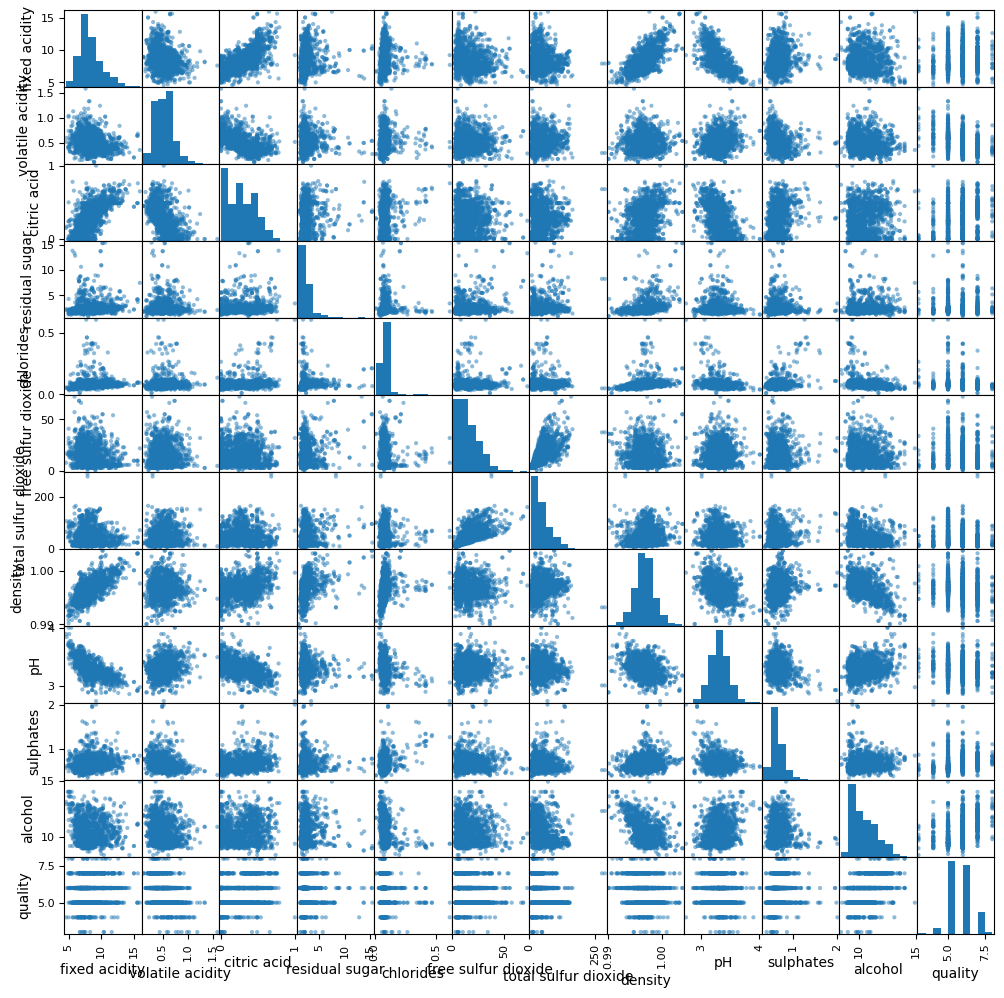

In [141]:


pd.plotting.scatter_matrix(data, figsize=(12,12))[-1]

### Individual distributions

We can use a normality test from the *sci.py* package to determine if any of our data are normally distributed





In [142]:
for item in data:
  print(str(item), stats.normaltest(data[item]))

fixed acidity NormaltestResult(statistic=224.53087840457746, pvalue=1.7528277735470436e-49)
volatile acidity NormaltestResult(statistic=143.41934355982863, pvalue=7.192589039756591e-32)
citric acid NormaltestResult(statistic=152.039214793795, pvalue=9.662822259281018e-34)
residual sugar NormaltestResult(statistic=1520.3239698236891, pvalue=0.0)
chlorides NormaltestResult(statistic=1783.1059225626427, pvalue=0.0)
free sulfur dioxide NormaltestResult(statistic=342.2591484251237, pvalue=4.779365332171615e-75)
total sulfur dioxide NormaltestResult(statistic=487.42725648953456, pvalue=1.4338908343436201e-106)
density NormaltestResult(statistic=30.70774994095191, pvalue=2.1473202738102222e-07)
pH NormaltestResult(statistic=33.684697471483915, pvalue=4.8468645347727716e-08)
sulphates NormaltestResult(statistic=906.8944479227036, pvalue=1.1759065222978855e-197)
alcohol NormaltestResult(statistic=154.17806951912513, pvalue=3.316328847318596e-34)
quality NormaltestResult(statistic=17.26240081635

p-values are all very small, meaning that none of our variables are normally distributed, the variable closest to a normal distribtion according to our test is quality, with $p = 0.00018$



We can also use Q-Q plots to get a visual representation for normality

In [143]:
#draws a QQ-plot and perfromes shapiro normality test. Data is a list, title is a string
def test_normality(data, title):
  from scipy.stats import shapiro
  stats.probplot(x = data, dist='norm', plot = plt)
  plt.title('QQ Plot of ' + str(title))
  plt.show()
  stat, p = shapiro(data)
  print(f"Shapiro-Wilk Test Statistic for {title}: {stat}, p-value: {p}")

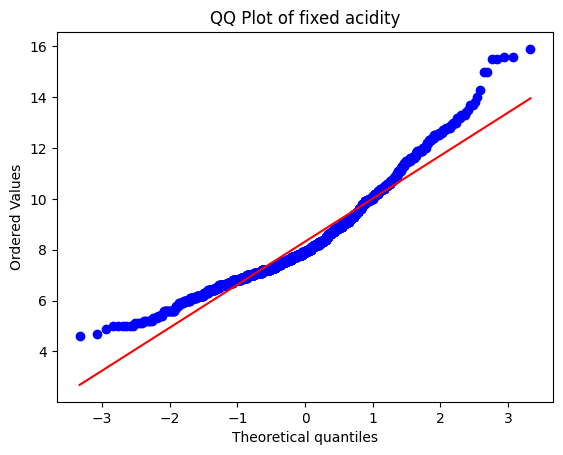

Shapiro-Wilk Test Statistic for fixed acidity: 0.9420297903867135, p-value: 1.525011710791387e-24


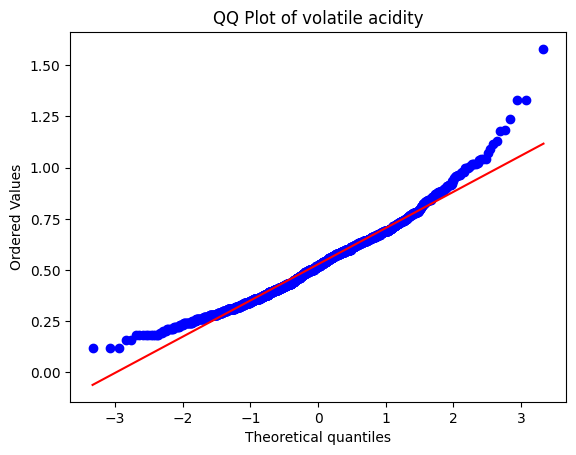

Shapiro-Wilk Test Statistic for volatile acidity: 0.9743368805536368, p-value: 2.692934735712727e-16


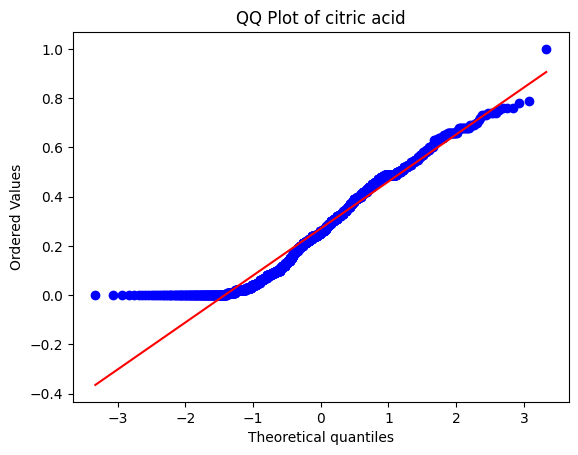

Shapiro-Wilk Test Statistic for citric acid: 0.9552919890668837, p-value: 1.0219317829705018e-21


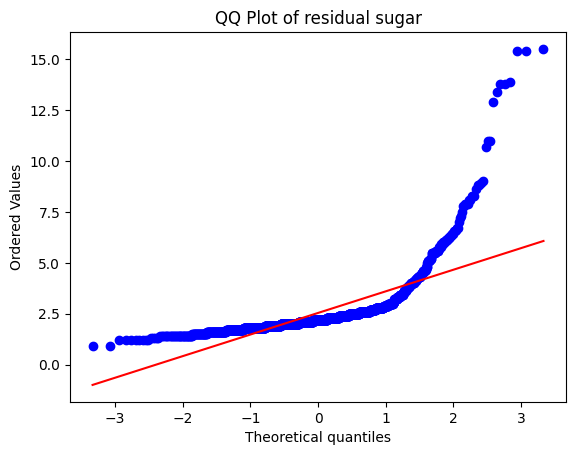

Shapiro-Wilk Test Statistic for residual sugar: 0.5660771057163958, p-value: 1.0201616453237868e-52


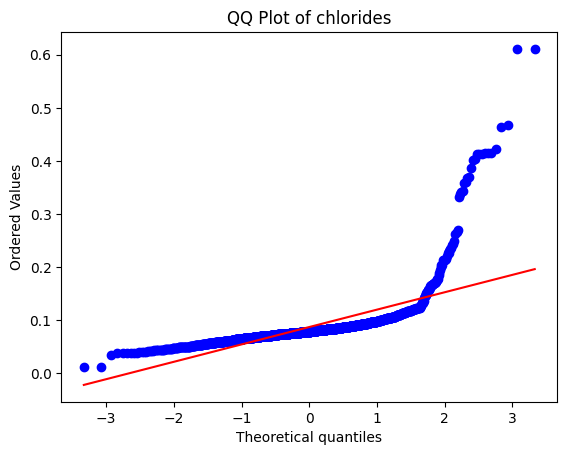

Shapiro-Wilk Test Statistic for chlorides: 0.48424655122518334, p-value: 1.1790556953147118e-55


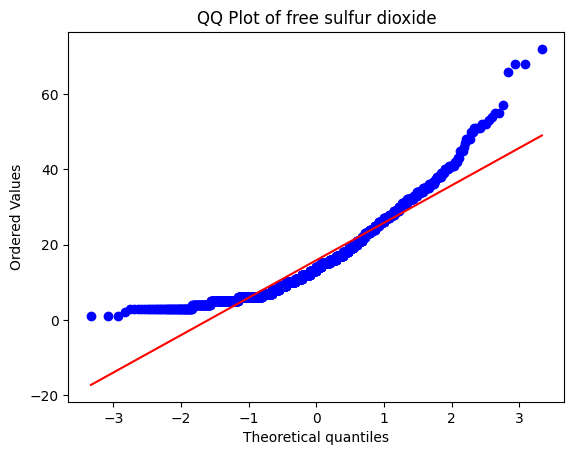

Shapiro-Wilk Test Statistic for free sulfur dioxide: 0.9018394916138583, p-value: 7.694596687816645e-31


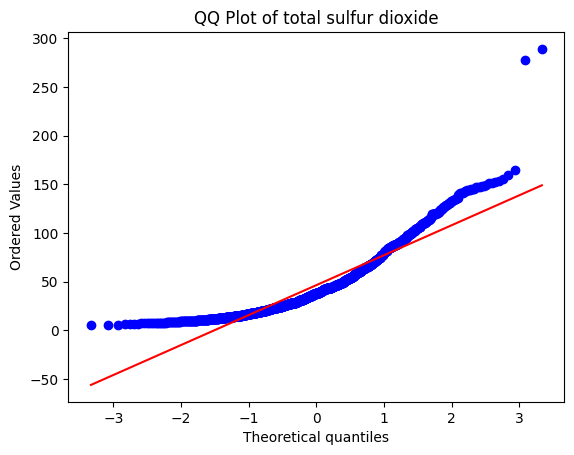

Shapiro-Wilk Test Statistic for total sulfur dioxide: 0.8732245604736051, p-value: 3.5734514102654424e-34


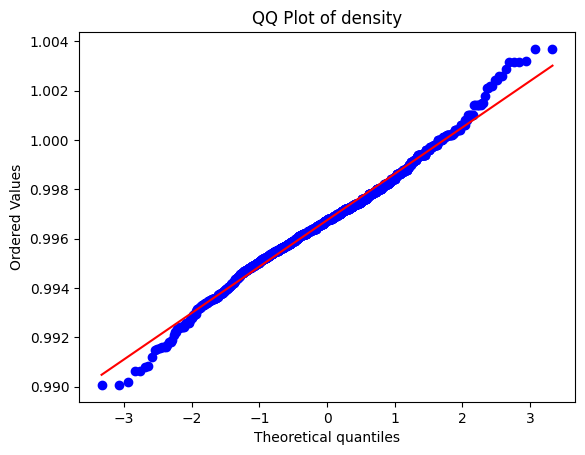

Shapiro-Wilk Test Statistic for density: 0.9908655166510911, p-value: 1.936052131352189e-08


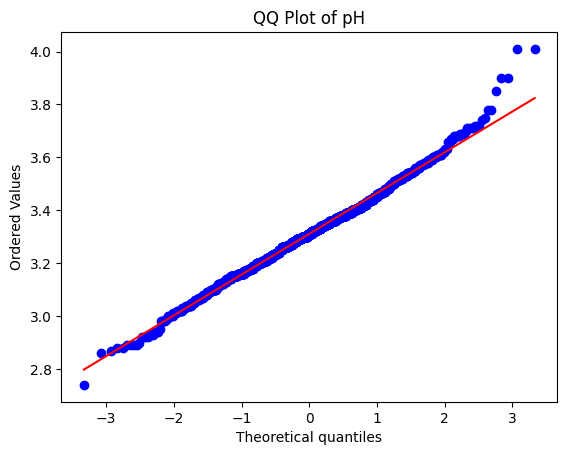

Shapiro-Wilk Test Statistic for pH: 0.9934862934498192, p-value: 1.7122367757609613e-06


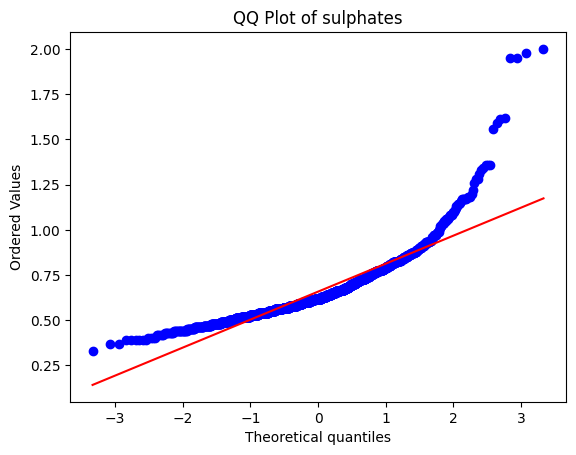

Shapiro-Wilk Test Statistic for sulphates: 0.8330437683911954, p-value: 5.823139712583187e-38


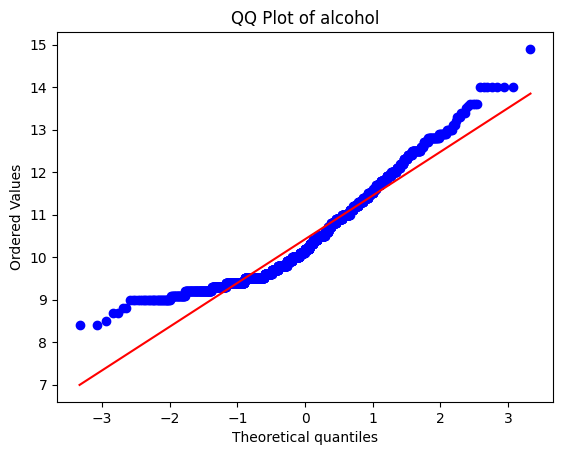

Shapiro-Wilk Test Statistic for alcohol: 0.9288390813054377, p-value: 6.644056905730039e-27


In [144]:
for item in data:
  if item != 'quality':
    test_normality(data[item], item)

This gives us a better sense of how normally distributed our data is. It looks like most of the data are normal, and just deviate towards the tails. However, there are some variables, namely **`residual sugar`, `chlorides`, `free sulfur dioxide`,  `total sulfur dioxide`, `sulfates`, `alcohol`** that should be modified to fit a normal distribution.

### Boxplots - examining outliers

We can create boxplots for each variable that effects our response to look for outliers, done so below

In [145]:
def draw_boxplot(df, item):
  sns.boxplot(x = df['quality'], y = df[item])
  plt.title('Boxplot grouped by quality for ' + str(item))
  plt.show()

def draw_scatterplot(df, item):
  sns.scatterplot(x = df['quality'], y = df[item])
  plt.title('Scatterplot grouped by quality for ' + str(item))
  plt.show()

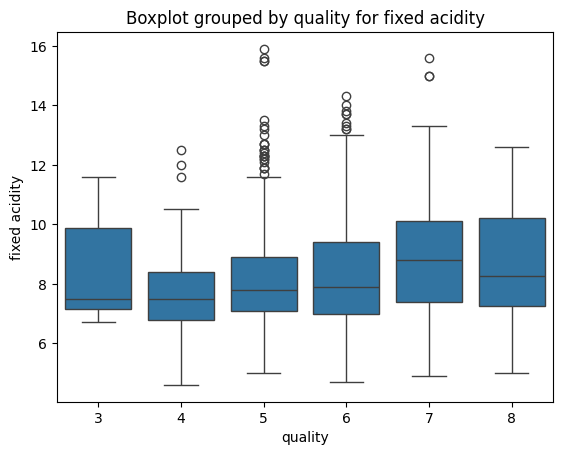

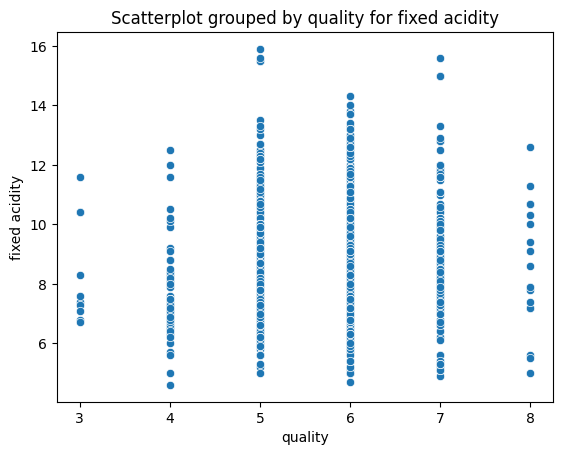

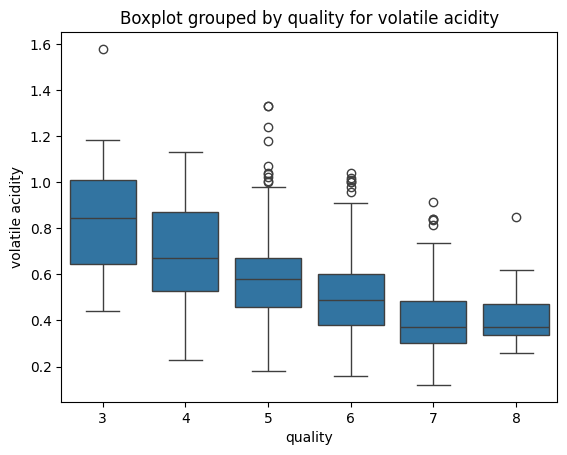

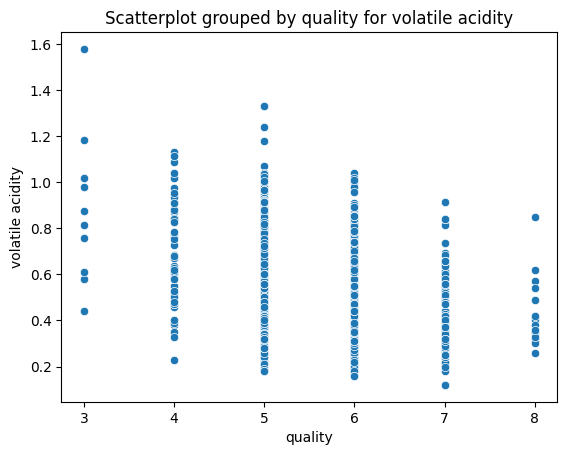

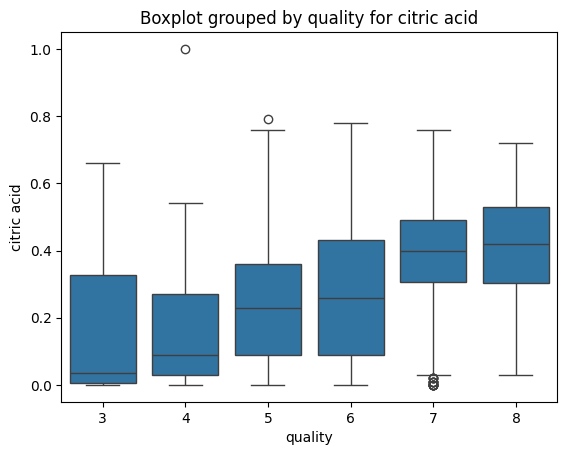

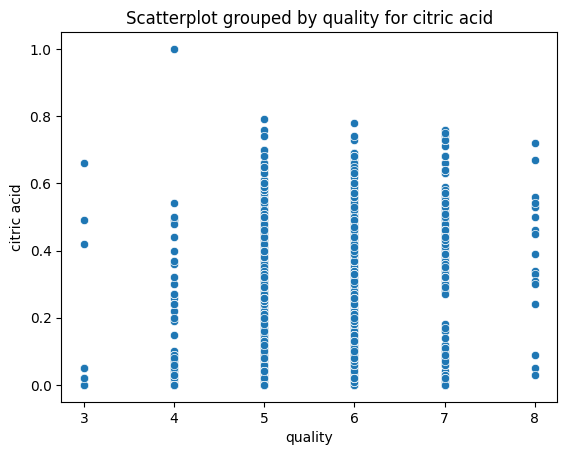

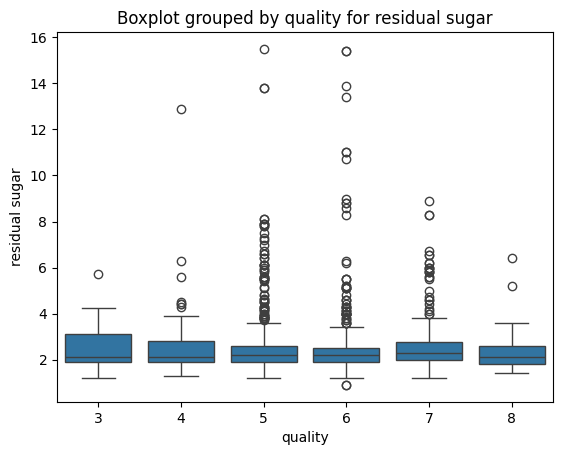

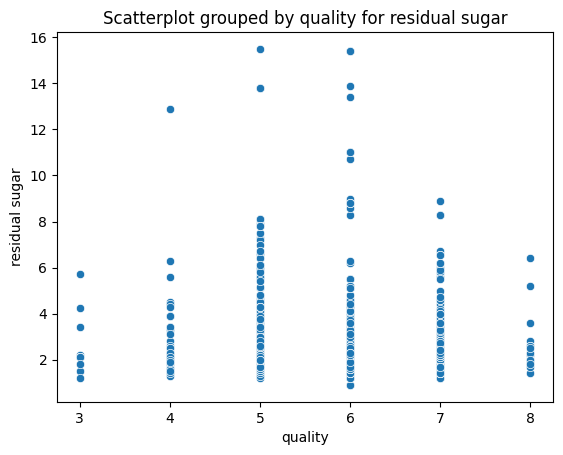

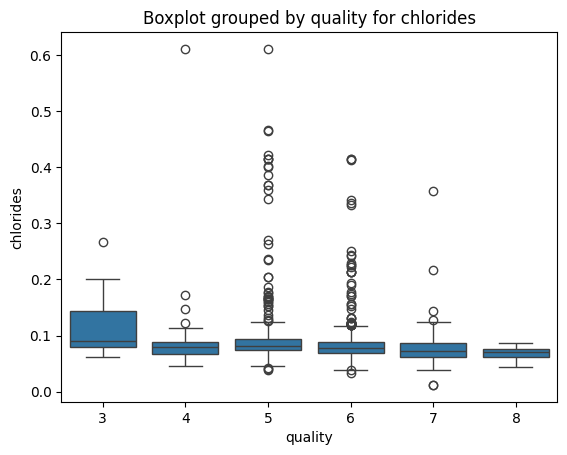

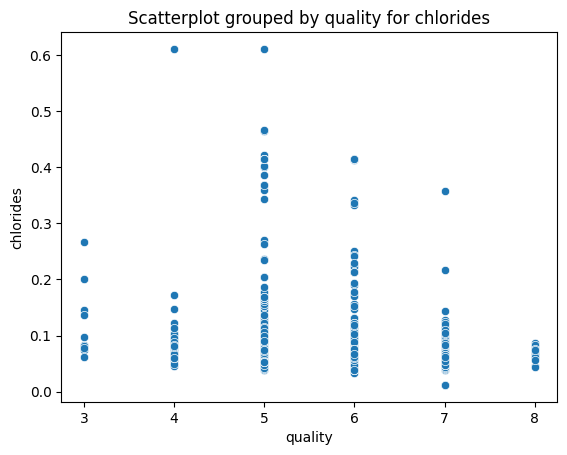

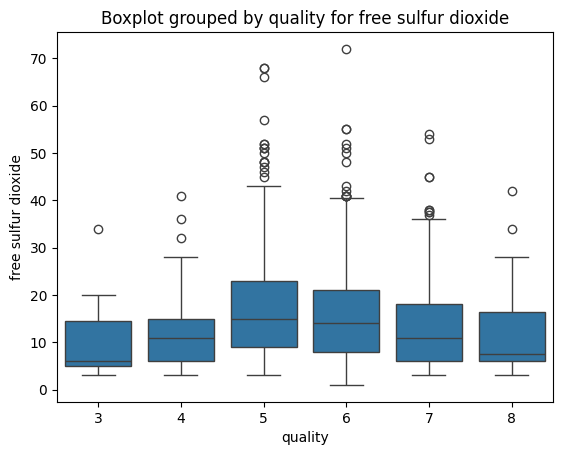

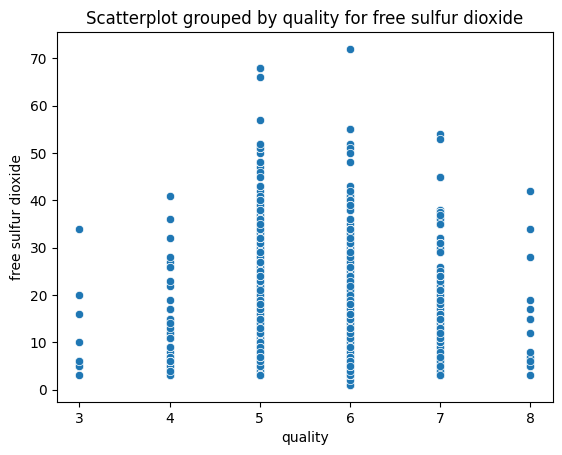

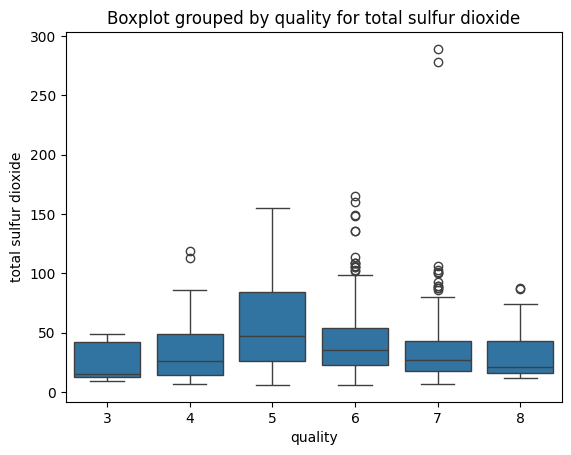

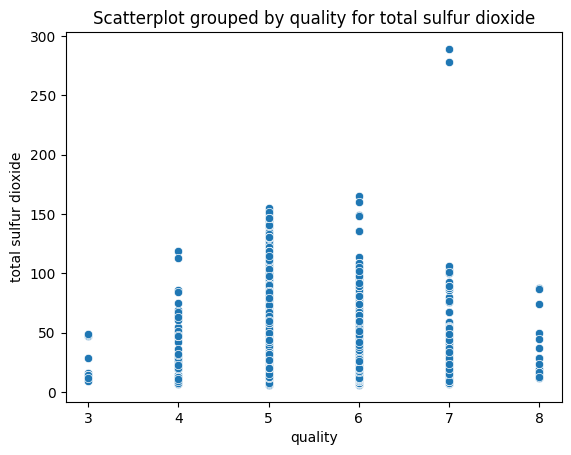

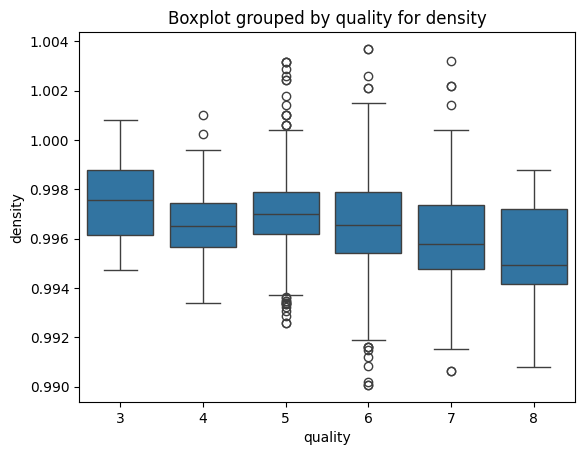

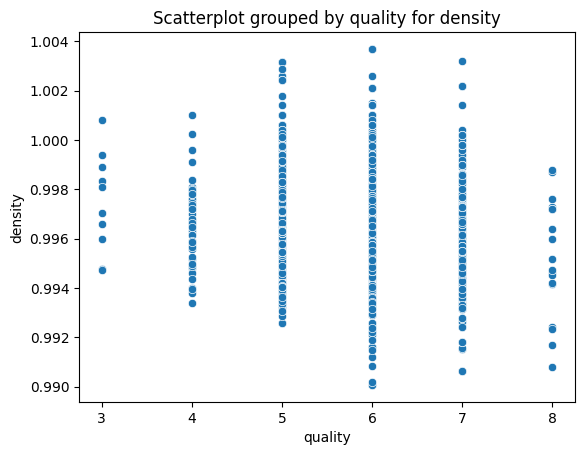

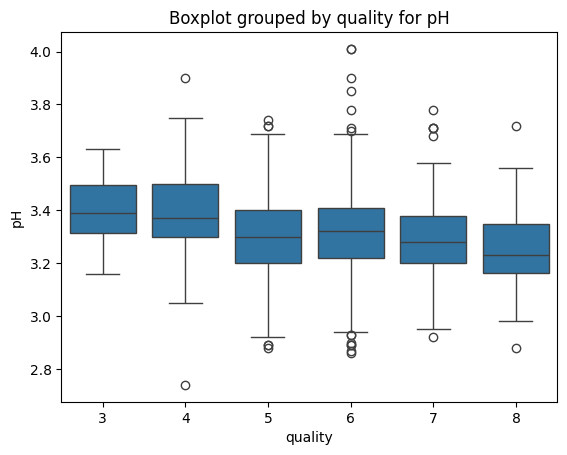

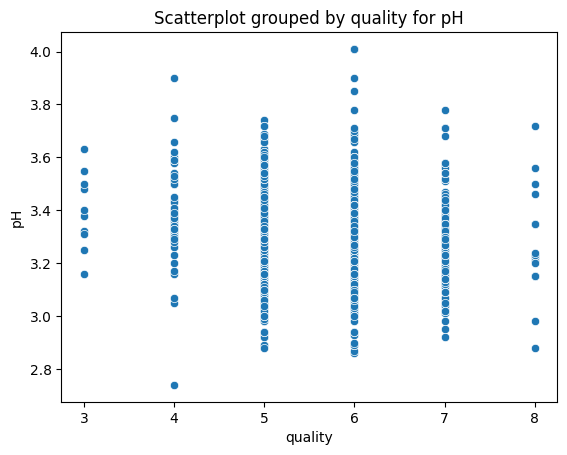

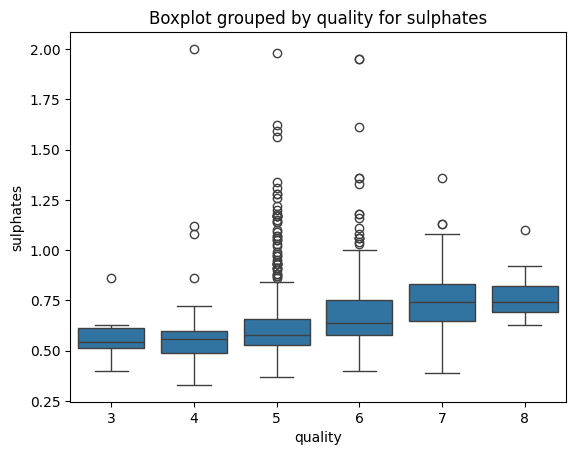

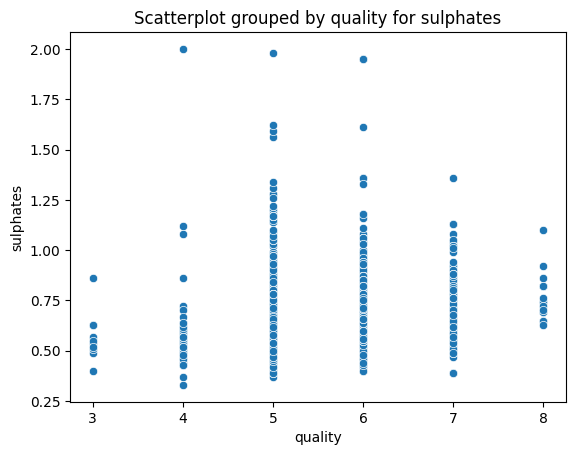

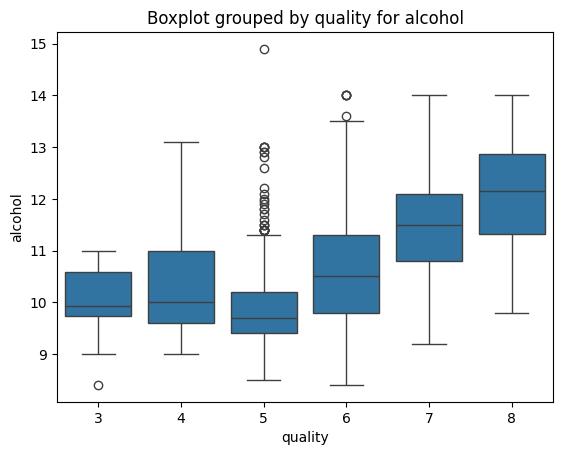

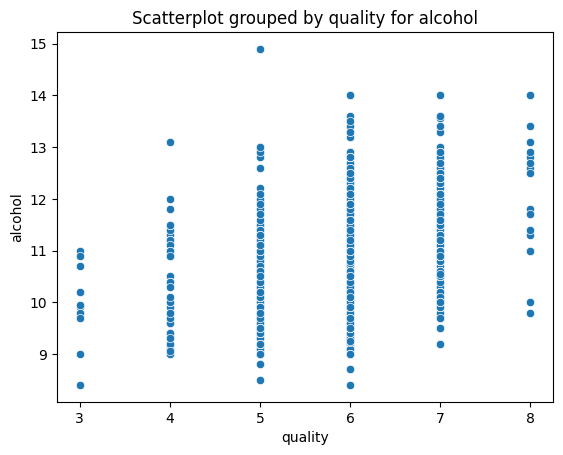

In [146]:
for item in data:
  if item != 'quality':
    draw_boxplot(data, item)
    draw_scatterplot(data, item)



##Data Transformation

Imideately, we can tell that we need to modify variables with a heavy right skew without looking at other visualizations. These variables are `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, and `alcohol`, which lines up pretty closely for what we determined should be changed when we created the Q-Q plots

### `Residual Sugar`
Below is what the distribution of `residual sugar` looks like, and a violin plot for how it relates to quality.

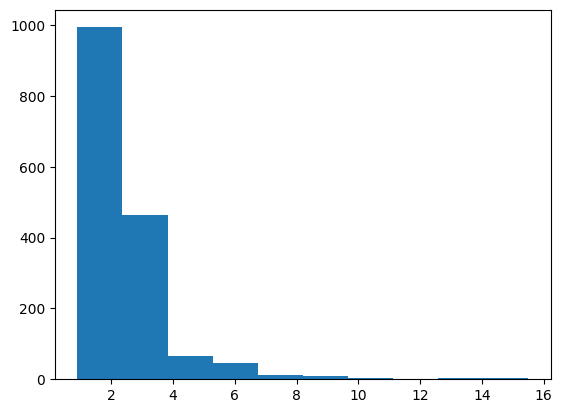

Text(0, 0.5, 'Quality')

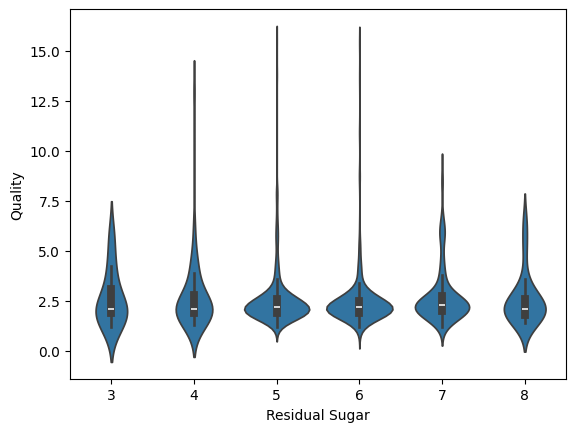

In [147]:
plt.hist(data['residual sugar'])
plt.show()

sns.violinplot(y = data['residual sugar'], x = 'quality', data = data)
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')

Since our data is right-skew, a log-sqrt transformation will help us shift this to a normal distribution. We can visualize the change by plotting the QQ-Plots for the original and modified data, side-by-side, where we can see we were able to wrangle in some of the right-skew-ness

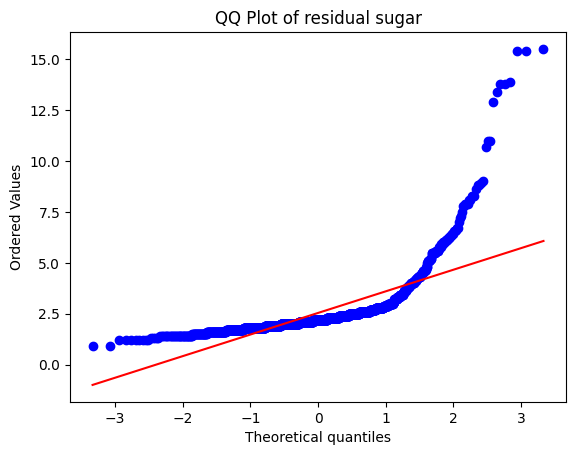

Shapiro-Wilk Test Statistic for residual sugar: 0.5660771057163958, p-value: 1.0201616453237868e-52


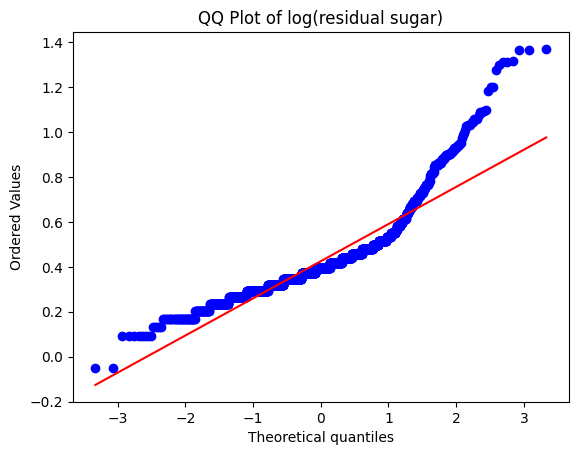

Shapiro-Wilk Test Statistic for log(residual sugar): 0.8550735645340175, p-value: 5.4710630073218684e-36


In [148]:
item = 'residual sugar'

vals = np.log(np.sqrt(data[item]))


test_normality(data[item], item)
test_normality(np.log(np.sqrt(data['residual sugar'])), 'log(residual sugar)')


because we exhibit a positive change for our data's distribution with this change, we will apply the following transformation to our code in-order to train our model.

Given $\vec{S}$ is the `residual sugar` for all samples, we will take

$$\vec{S} \leftarrow \log{(\vec{S})}$$



In [149]:
residual_sugar_data = data['residual sugar']
data['residual sugar'] = np.log(residual_sugar_data)


### `chlorides`
Below is what the distribution of `chlorides` looks like, and a violin plot for how it relates to quality.

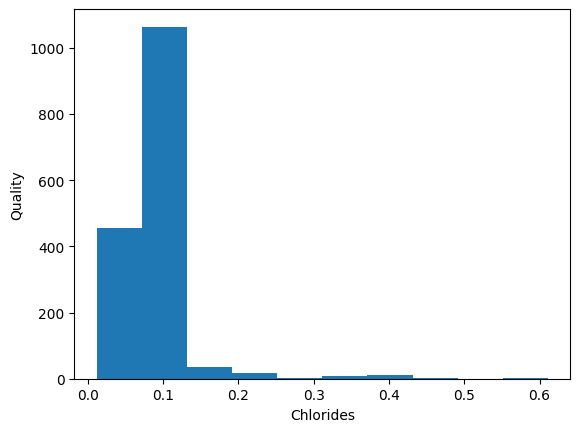

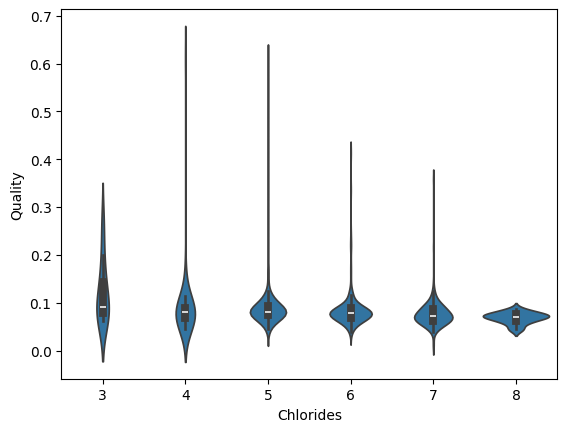

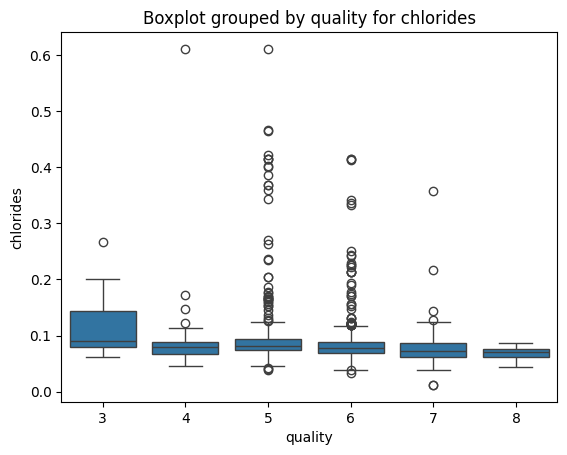

In [150]:
plt.hist(data['chlorides'])
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.show()

sns.violinplot(y = data['chlorides'], x = 'quality', data = data)
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.show()

draw_boxplot(data, 'chlorides')



Fixed Acidity is relatively normal, with a slight right skew. Lets see how using log, sqrt, and boxcox (for observations with fixed acidity> 0) transformations change the shape of the QQ-plot and results of normality test.

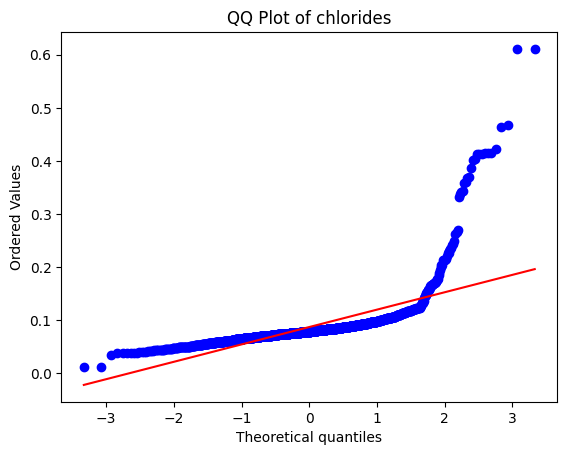

Shapiro-Wilk Test Statistic for chlorides: 0.48424655122518334, p-value: 1.1790556953147118e-55


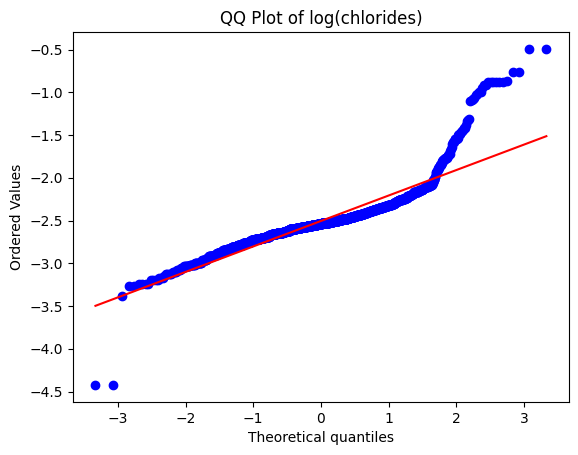

Shapiro-Wilk Test Statistic for log(chlorides): 0.8283642549328323, p-value: 2.3622721512330157e-38


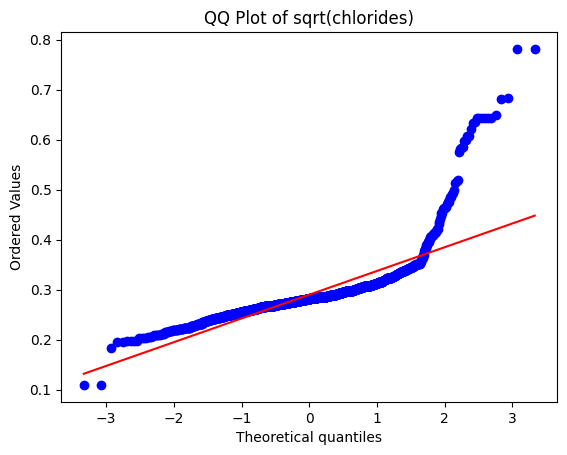

Shapiro-Wilk Test Statistic for sqrt(chlorides): 0.6723604020744909, p-value: 4.071545937322437e-48


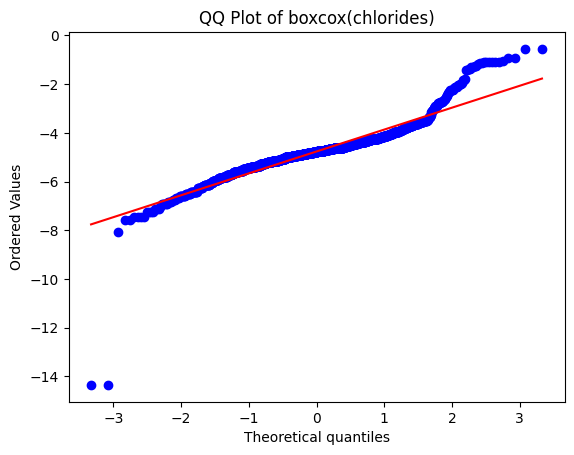

Shapiro-Wilk Test Statistic for boxcox(chlorides): 0.8716791986679291, p-value: 2.459048953286268e-34


In [151]:
from scipy.stats import boxcox

#draws a QQ-plot and perfromes shapiro normality test. Data is a list, title is a string
def test_normality(data, title):
  from scipy.stats import boxcox
  from scipy.stats import shapiro
  stats.probplot(x = data, dist='norm', plot = plt)
  plt.title('QQ Plot of ' + str(title))
  plt.show()
  stat, p = shapiro(data)
  print(f"Shapiro-Wilk Test Statistic for {title}: {stat}, p-value: {p}")


chlorides_boxcox, chlorides_lambda = boxcox(data['chlorides'])


test_normality(data['chlorides'], 'chlorides')
test_normality(np.log(data['chlorides']), 'log(chlorides)')
test_normality(np.sqrt(data['chlorides']), 'sqrt(chlorides)')
test_normality(chlorides_boxcox, 'boxcox(chlorides)')





Based on the results of our testing , it seems that boxcox did the best job of normalizing our data. We will change chlorides to boxcox(chlorides), which takes the following formula:

$$
y_i^{(\lambda)} =
\begin{cases}
\displaystyle \frac{y_i^\lambda - 1}{\lambda}, & \text{if } \lambda \ne 0 \\\\
\displaystyle \ln(y_i), & \text{if } \lambda = 0
\end{cases}
$$

We make this change in the next cell, along with storing the original value for `data['chlorides]` in `chlorides_data` for reference.

We can also observe two extreme outliers from the QQ-plot, with values around $-14$, while the rest of our values fall between $(-8, 0)$. We will also remove these.



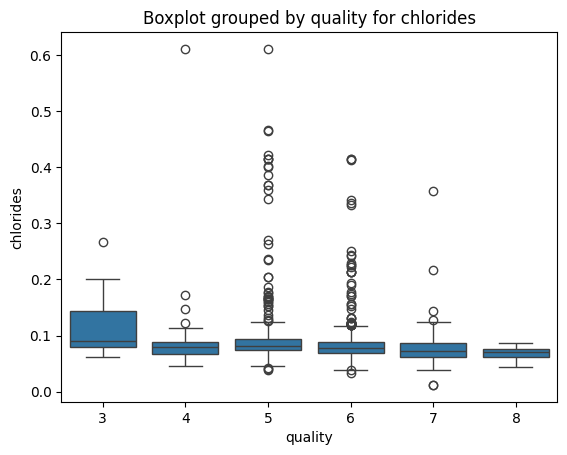

In [152]:
chlorides_data = data['chlorides']
#data['chlorides'] = chlorides_boxcox

data[(data['chlorides'] < -10)]


draw_boxplot(data, 'chlorides')

In [153]:
data = data[(data['chlorides'] > -10)]

Finally, `chlorides` has the following shape, presented by a histogram, boxplot, and violin plot.

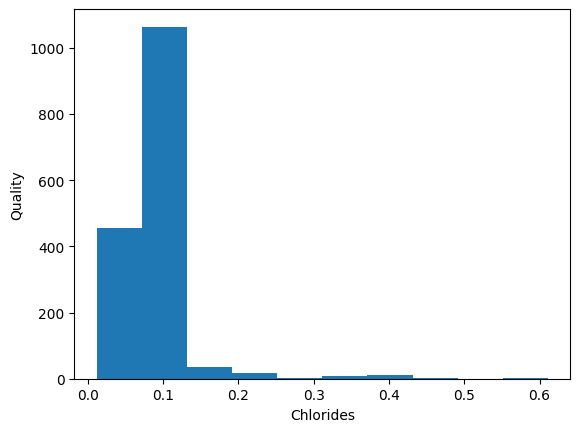

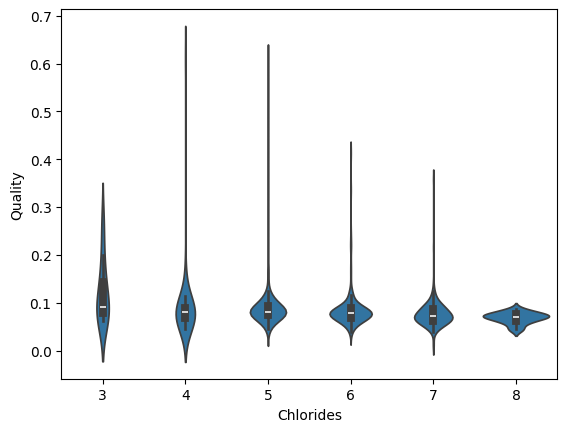

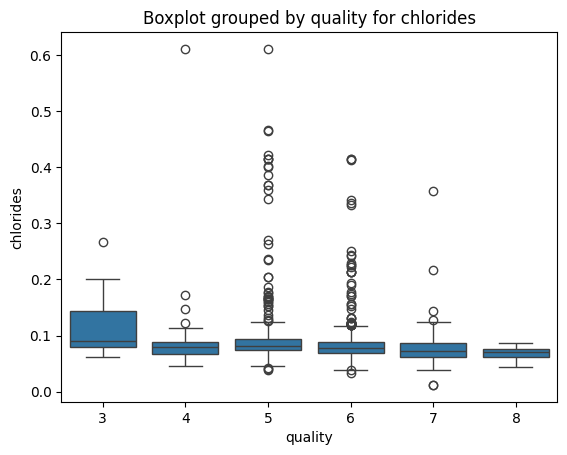

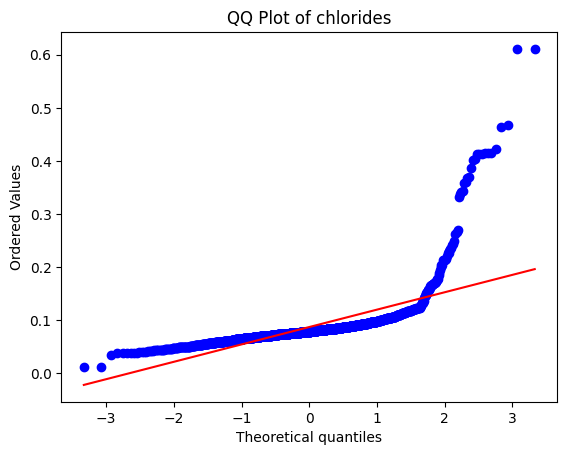

Shapiro-Wilk Test Statistic for chlorides: 0.48424655122518334, p-value: 1.1790556953147118e-55


In [154]:
plt.hist(data['chlorides'])
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.show()

sns.violinplot(y = data['chlorides'], x = 'quality', data = data)
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.show()

draw_boxplot(data, 'chlorides')

test_normality(data['chlorides'], 'chlorides')

### `free sulfur dioxide`

Below is the distribution of `free sulfur dioxide`, shown with a histogram, violin, and boxplot.

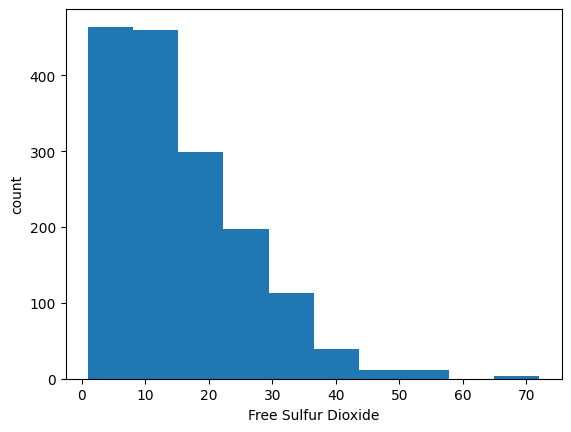

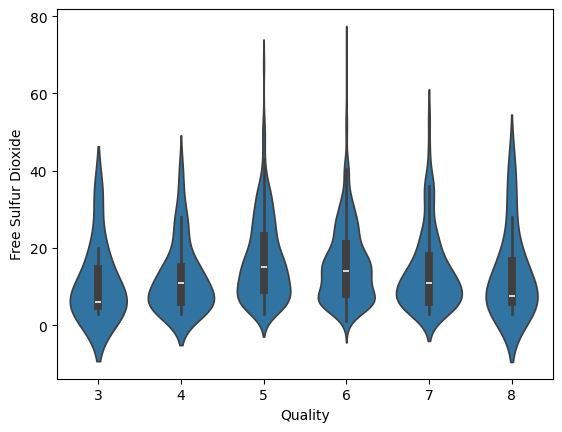

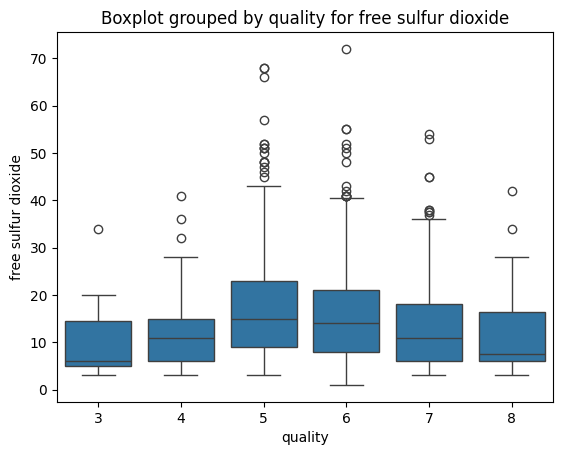

In [155]:
plt.hist(data['free sulfur dioxide'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('count')
plt.show()

sns.violinplot(y = data['free sulfur dioxide'], x = 'quality', data = data)
plt.ylabel('Free Sulfur Dioxide')
plt.xlabel('Quality')
plt.show()

draw_boxplot(data, 'free sulfur dioxide')


We have right skew data. We will look at the same transformations we made on `chlorides` to see if they help fix the skewness of our data. These are namely boxcox, sqrt, and log transformations.

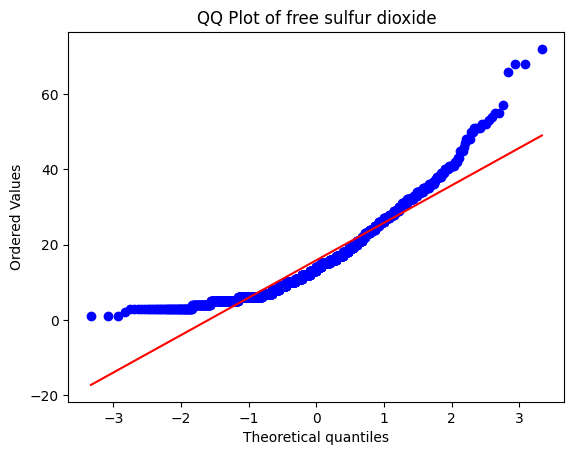

Shapiro-Wilk Test Statistic for free sulfur dioxide: 0.9018394916138583, p-value: 7.694596687816645e-31


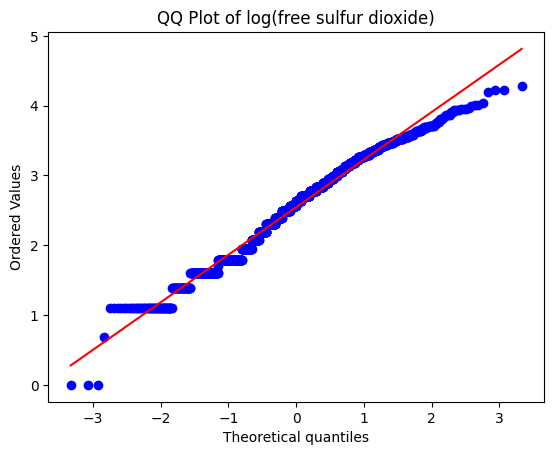

Shapiro-Wilk Test Statistic for log(free sulfur dioxide): 0.9833984364966966, p-value: 1.2463722155133395e-12


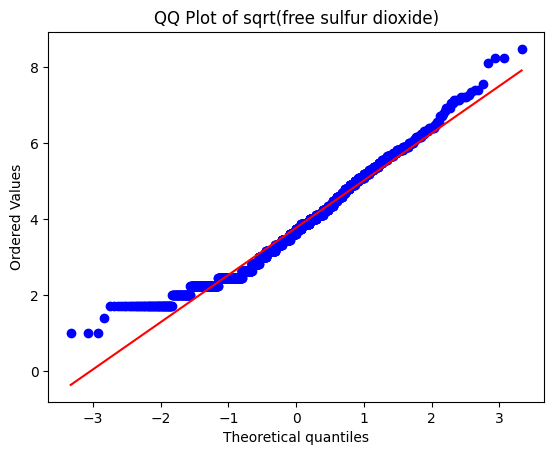

Shapiro-Wilk Test Statistic for sqrt(free sulfur dioxide): 0.9725749638438167, p-value: 6.699830655540897e-17


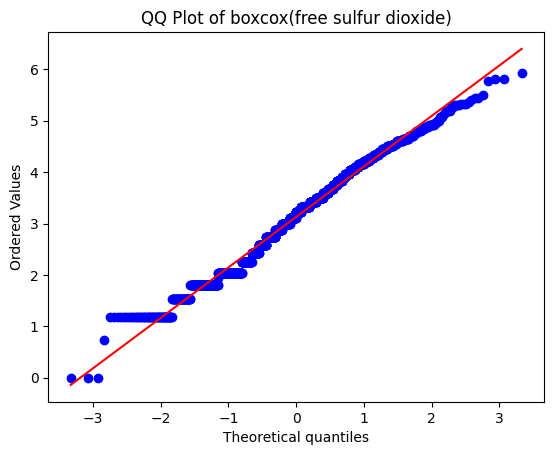

Shapiro-Wilk Test Statistic for boxcox(free sulfur dioxide): 0.9874715597874553, p-value: 1.550940154035844e-10


In [156]:
free_sulfur_boxcox, free_sulfur_lambda = boxcox(data['free sulfur dioxide'])


test_normality(data['free sulfur dioxide'], 'free sulfur dioxide')
test_normality(np.log(data['free sulfur dioxide']), 'log(free sulfur dioxide)')
test_normality(np.sqrt(data['free sulfur dioxide']), 'sqrt(free sulfur dioxide)')
test_normality(free_sulfur_boxcox, 'boxcox(free sulfur dioxide)')

Since both the log and boxcox transformations give a similar Shapiro test statistic ($.98 < t < .99$), we will opt for a log transformation as it is slightly easier to interpret.

This means if `free sulfur dioxide` $= \vec{S}$, then our model with use

$$\vec{S} \leftarrow \log{(\vec{S})}$$

as the input for `free sulfur dioxide`. We make the change in the next cell

In [157]:
data['free sulfur dioxide'] = np.log(data['free sulfur dioxide'])

The last thing to do is re-assess for outliers, lets see how our normality and boxplots change when we remove the values that have `free sulfur dioxide` = 0.

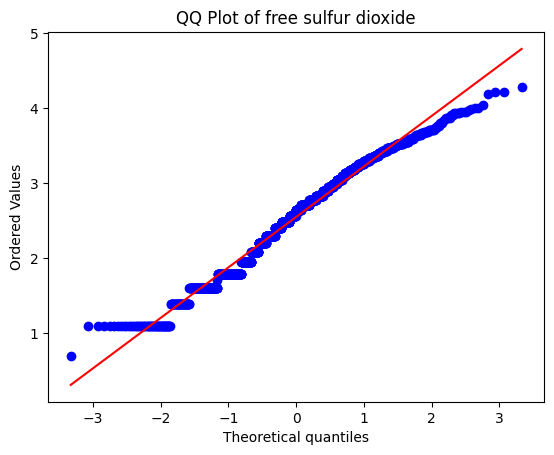

Shapiro-Wilk Test Statistic for free sulfur dioxide: 0.9822908798309025, p-value: 3.9812244852226943e-13


In [158]:
test_normality(data[(data['free sulfur dioxide']) > 0.1]['free sulfur dioxide'], 'free sulfur dioxide')

This acutally makes our data less normal, so we will leave our data as is for now.

### `total sulfur dioxide`



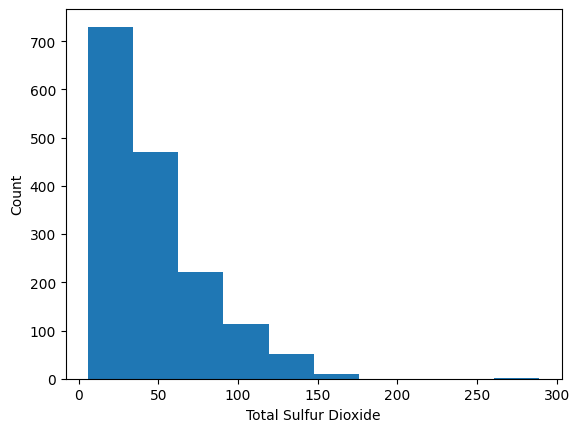

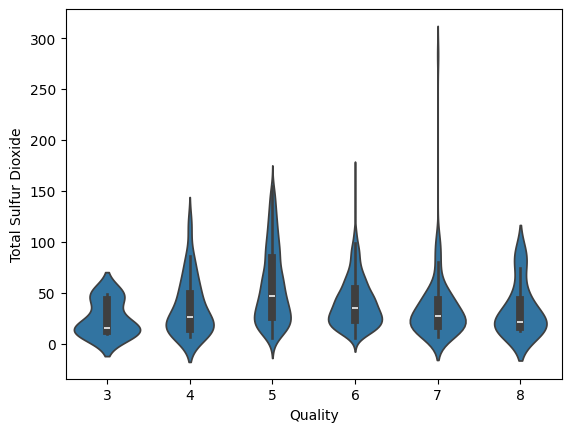

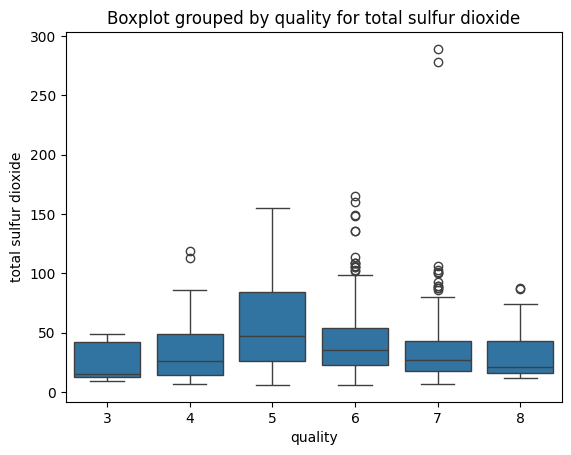

In [159]:
plt.hist(data['total sulfur dioxide'])
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Count')
plt.show()

sns.violinplot(y = data['total sulfur dioxide'], x = 'quality', data = data)
plt.ylabel('Total Sulfur Dioxide')
plt.xlabel('Quality')
plt.show()

draw_boxplot(data, 'total sulfur dioxide')


Before assessing normaility, we can see that there are two extreme outliers for total sulfur dioxide. We will define these outliers as the cases where `total sulfur dioxide` is greater than 200. We will remove these.

In [160]:
data = data[(data['total sulfur dioxide']) < 200] #only include values < 200

Let's see how this has changed the plots from earlier, and if we should still try to normalize the skew of our data.

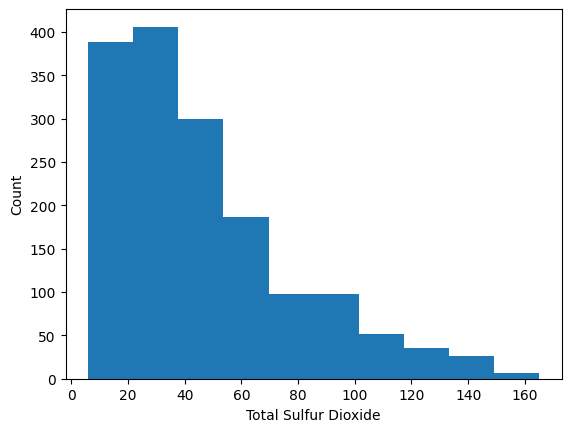

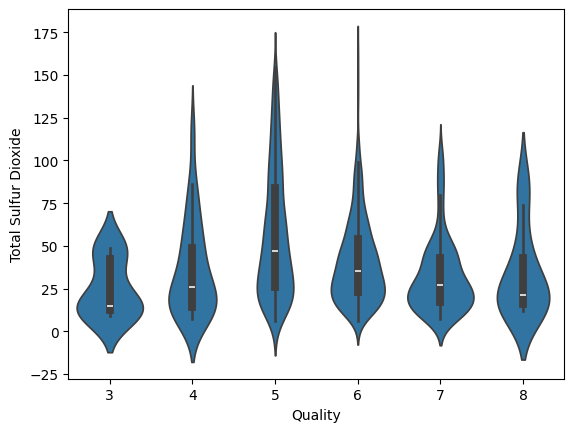

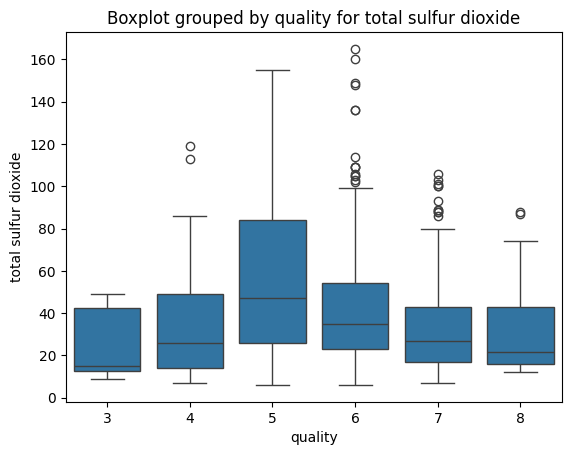

In [161]:
#same code from above
plt.hist(data['total sulfur dioxide'])
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Count')
plt.show()

sns.violinplot(y = data['total sulfur dioxide'], x = 'quality', data = data)
plt.ylabel('Total Sulfur Dioxide')
plt.xlabel('Quality')
plt.show()

draw_boxplot(data, 'total sulfur dioxide')

Removing the outliers this way helped the skew become less drastic, but there is still an obvious right skew. We will look at boxcox, sqrt, and log transformations to see how they effect our normaility.

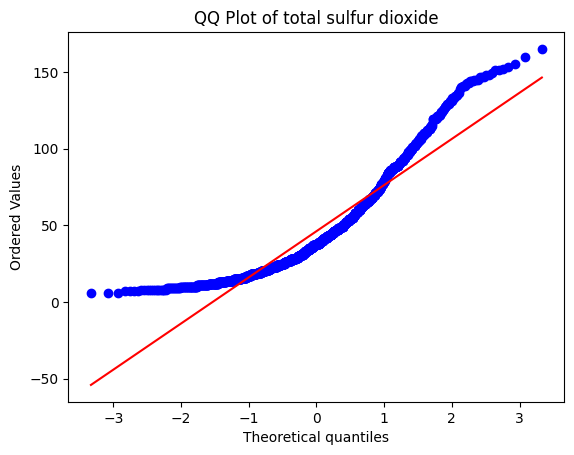

Shapiro-Wilk Test Statistic for total sulfur dioxide: 0.8901005442661531, p-value: 2.845716503915968e-32


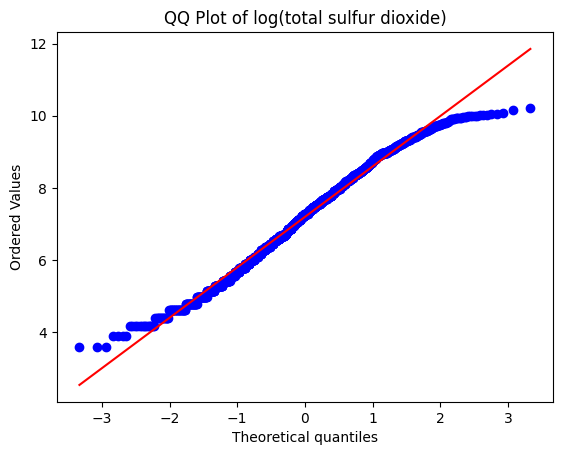

Shapiro-Wilk Test Statistic for log(total sulfur dioxide): 0.987955192091651, p-value: 2.986940444373711e-10


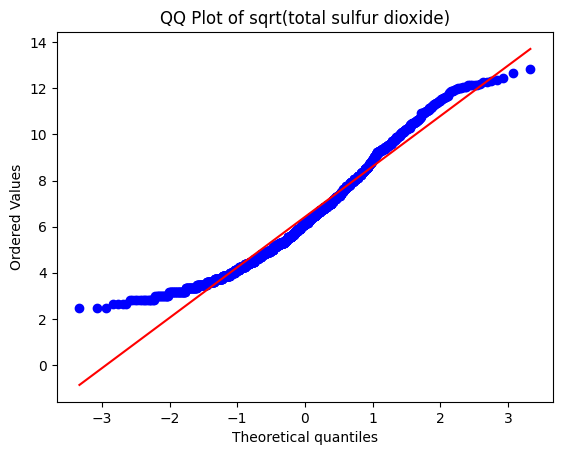

Shapiro-Wilk Test Statistic for sqrt(total sulfur dioxide): 0.9643677622789827, p-value: 2.1870819867468594e-19


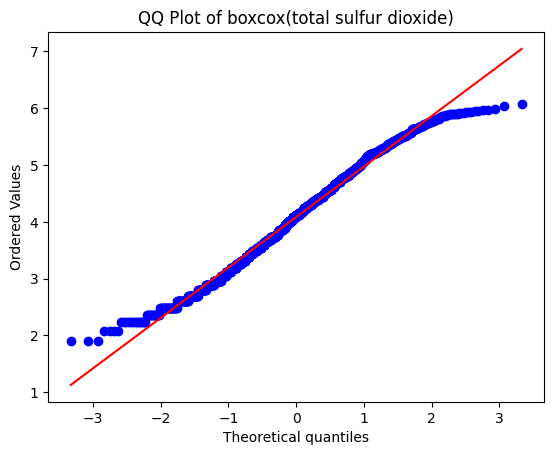

Shapiro-Wilk Test Statistic for boxcox(total sulfur dioxide): 0.9885075208251186, p-value: 6.288487548570056e-10


In [162]:
total_sulfur_boxcox, total_sulfur_lambda = boxcox(data['total sulfur dioxide'])


test_normality(data['total sulfur dioxide'], 'total sulfur dioxide')
test_normality(np.log(data['total sulfur dioxide']**2), 'log(total sulfur dioxide)')
test_normality(np.sqrt(data['total sulfur dioxide']), 'sqrt(total sulfur dioxide)')
test_normality(total_sulfur_boxcox, 'boxcox(total sulfur dioxide)')

We will choose to use a log transformation for our data, as it does nearly as well as boxcox while being more easily interpretable.

Given $\vec{S}$ is the `total sulfur dioxide` for our samples, we will take

$$\vec{S} \leftarrow \log{(\vec{S})}$$

In [163]:
data['total sulfur dioxide'] = np.log(data['total sulfur dioxide'])

### `alcohol`

The last variable we will look at to change the distribution, based on our initial glace, will be `alcohol`.

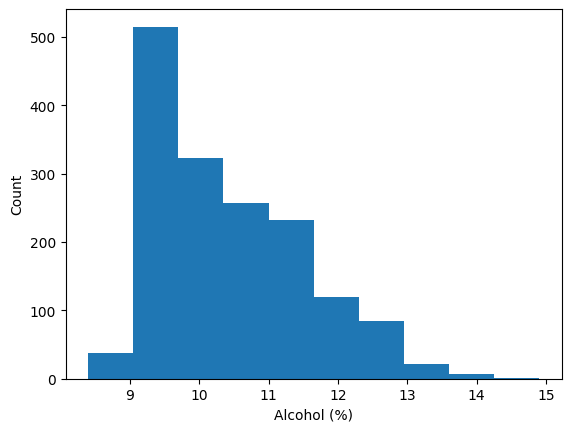

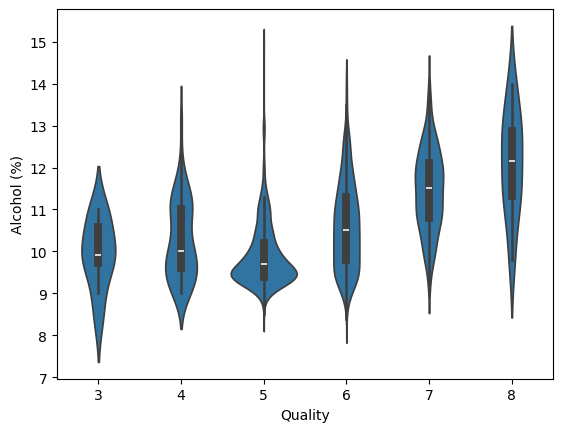

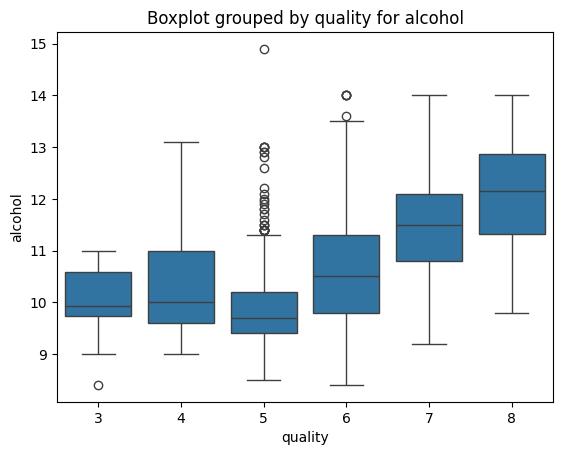

In [164]:
#same code from above
plt.hist(data['alcohol'])
plt.xlabel('Alcohol (%)')
plt.ylabel('Count')
plt.show()

sns.violinplot(y = data['alcohol'], x = 'quality', data = data)
plt.ylabel('Alcohol (%)')
plt.xlabel('Quality')
plt.show()

draw_boxplot(data, 'alcohol')

Check how boxcox, log, and sqrt transformations effect outliers and normality.

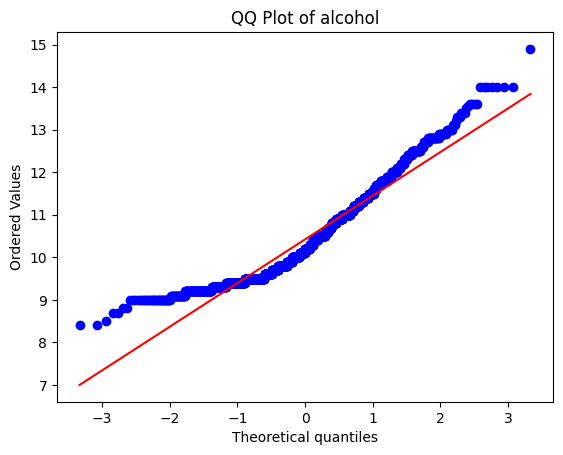

Shapiro-Wilk Test Statistic for alcohol: 0.9286791253859746, p-value: 6.482928724457048e-27


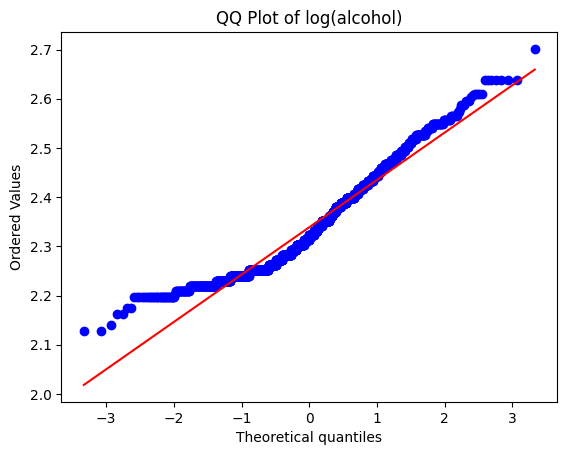

Shapiro-Wilk Test Statistic for log(alcohol): 0.9463831504798743, p-value: 1.1657602285248229e-23


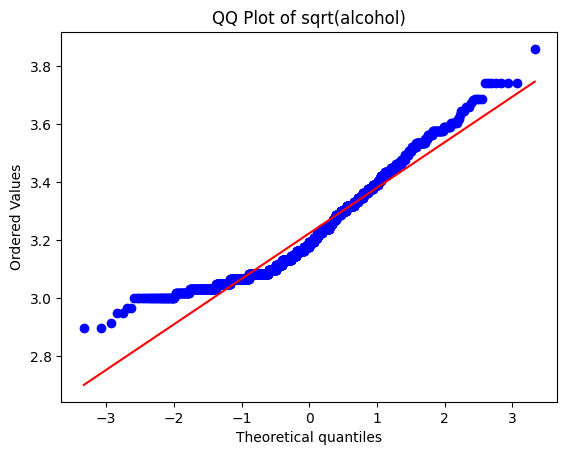

Shapiro-Wilk Test Statistic for sqrt(alcohol): 0.938173968431395, p-value: 2.946880346198002e-25


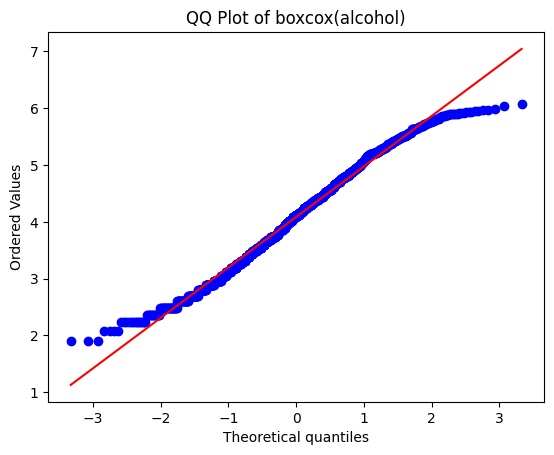

Shapiro-Wilk Test Statistic for boxcox(alcohol): 0.9885075208251186, p-value: 6.288487548570056e-10


In [165]:
alcohol_boxcox, alcohol_lambda = boxcox(data['alcohol'])


test_normality(data['alcohol'], 'alcohol')

test_normality(np.log(data['alcohol']), 'log(alcohol)')


test_normality(np.sqrt(data['alcohol']), 'sqrt(alcohol)')


test_normality(total_sulfur_boxcox, 'boxcox(alcohol)')

Based on the results of our testing , it seems that boxcox did the best job of normalizing our data. We will change `alcohol` to `boxcox(alcohol)`, which takes the following formula:

$$
y_i^{(\lambda)} =
\begin{cases}
\displaystyle \frac{y_i^\lambda - 1}{\lambda}, & \text{if } \lambda \ne 0 \\\\
\displaystyle \ln(y_i), & \text{if } \lambda = 0
\end{cases}
$$

We make this change in the next cell, along with storing the original value for `data['alcohol']` in `alcohol_data` for reference.

In [166]:
alcohol_data = data['alcohol']
data['alcohol'] = alcohol_boxcox

###`sulfates`

lets look at the shape of sulfates to see what changes should be made.

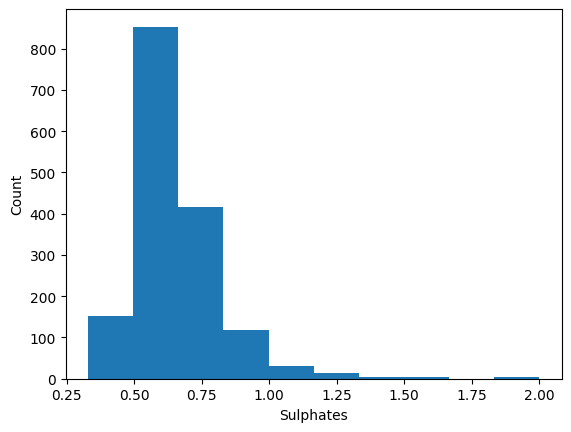

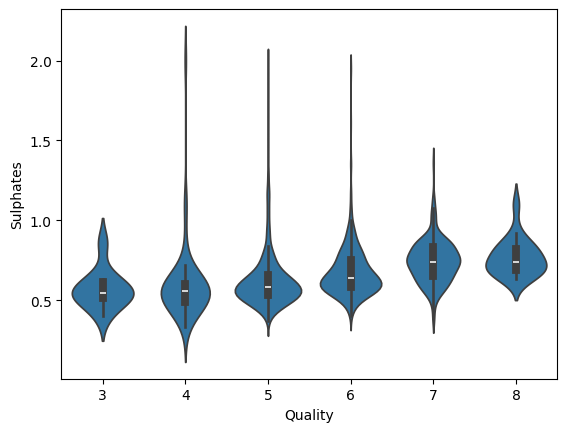

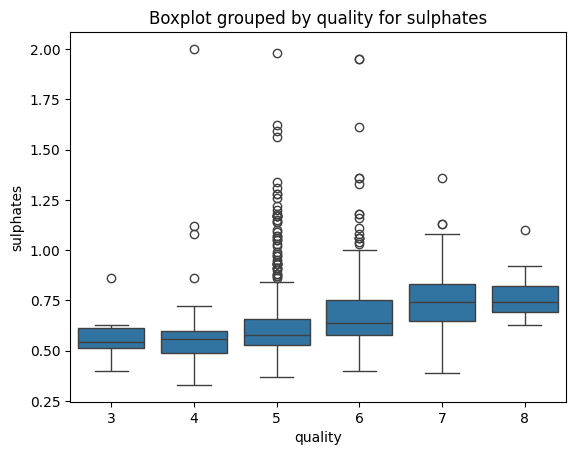

In [167]:
#same code from above
plt.hist(data['sulphates'])
plt.xlabel('Sulphates')
plt.ylabel('Count')
plt.show()

sns.violinplot(y = data['sulphates'], x = 'quality', data = data)
plt.ylabel('Sulphates')
plt.xlabel('Quality')
plt.show()

draw_boxplot(data, 'sulphates')

We will try our typical transformations, along with an inverse transformation to try and normalize the distribution of our data.

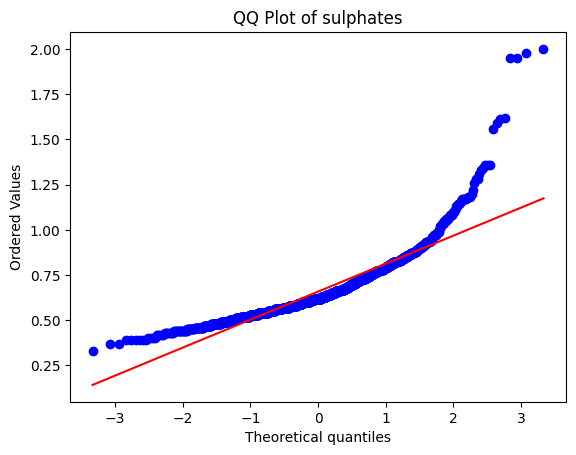

Shapiro-Wilk Test Statistic for sulphates: 0.8331331995132054, p-value: 6.198155100264859e-38


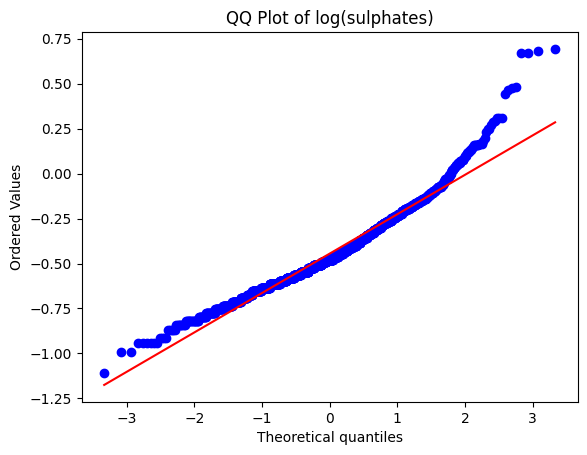

Shapiro-Wilk Test Statistic for log(sulphates): 0.9589699699532543, p-value: 8.247531812929651e-21


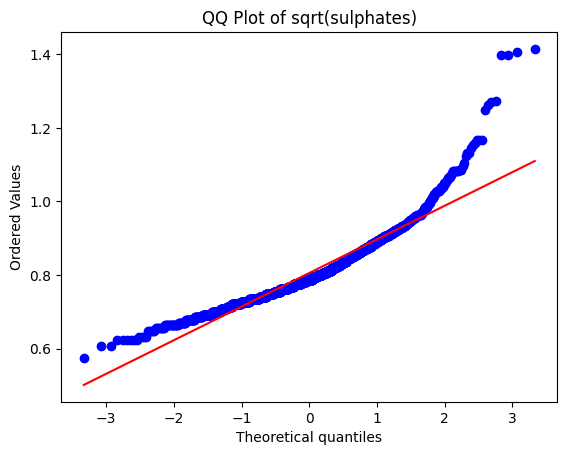

Shapiro-Wilk Test Statistic for sqrt(sulphates): 0.9087192223058499, p-value: 6.562777046500386e-30


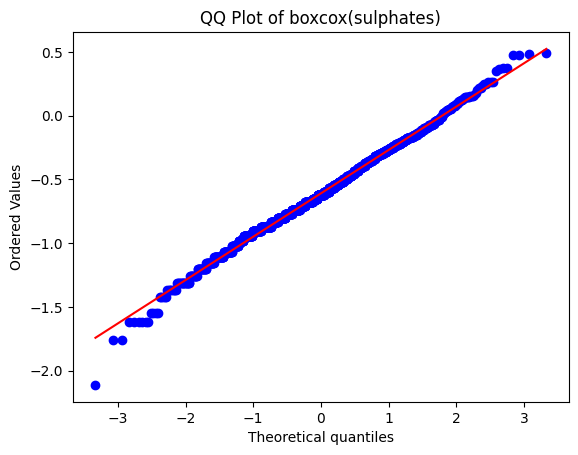

Shapiro-Wilk Test Statistic for boxcox(sulphates): 0.9964508719419674, p-value: 0.0009392978353782306


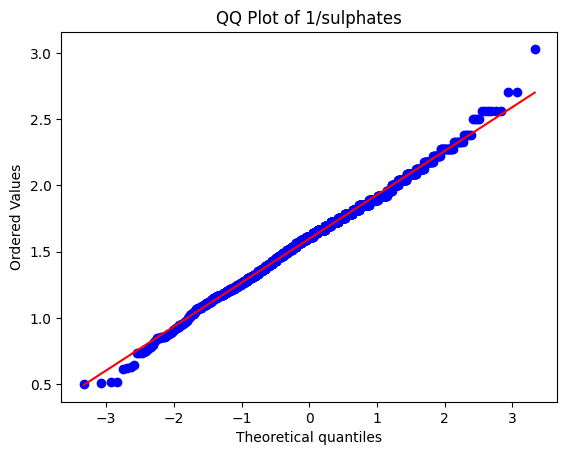

Shapiro-Wilk Test Statistic for 1/sulphates: 0.9963963086800092, p-value: 0.0008240181117632388


In [168]:
def test_varied_normality(data, title): #uses test_normality with boxcox, log, and sqrt transformations and the base case
  test_normality(data, title)
  test_normality(np.log(data), 'log(' + title + ')')
  test_normality(np.sqrt(data), 'sqrt(' + title + ')')
  test_normality(boxcox(data)[0], 'boxcox(' + title + ')')

test_varied_normality(data['sulphates'], 'sulphates')
test_normality(1/data['sulphates'], '1/sulphates')

Boxcox and Inverse perform similarly, so we will opt for the inverse transformation. Where if $\vec{S}$ is `sulphates`, then our updated value becomes
$$\vec{S} = \frac{1}{\vec{S}}$$

In [169]:
data['sulphates'] = 1/data['sulphates']

## Verfiying data transformation

lets re-assess the scatter matrix and see if we have done enough with modifying distributions

###Scatterplot Matrix

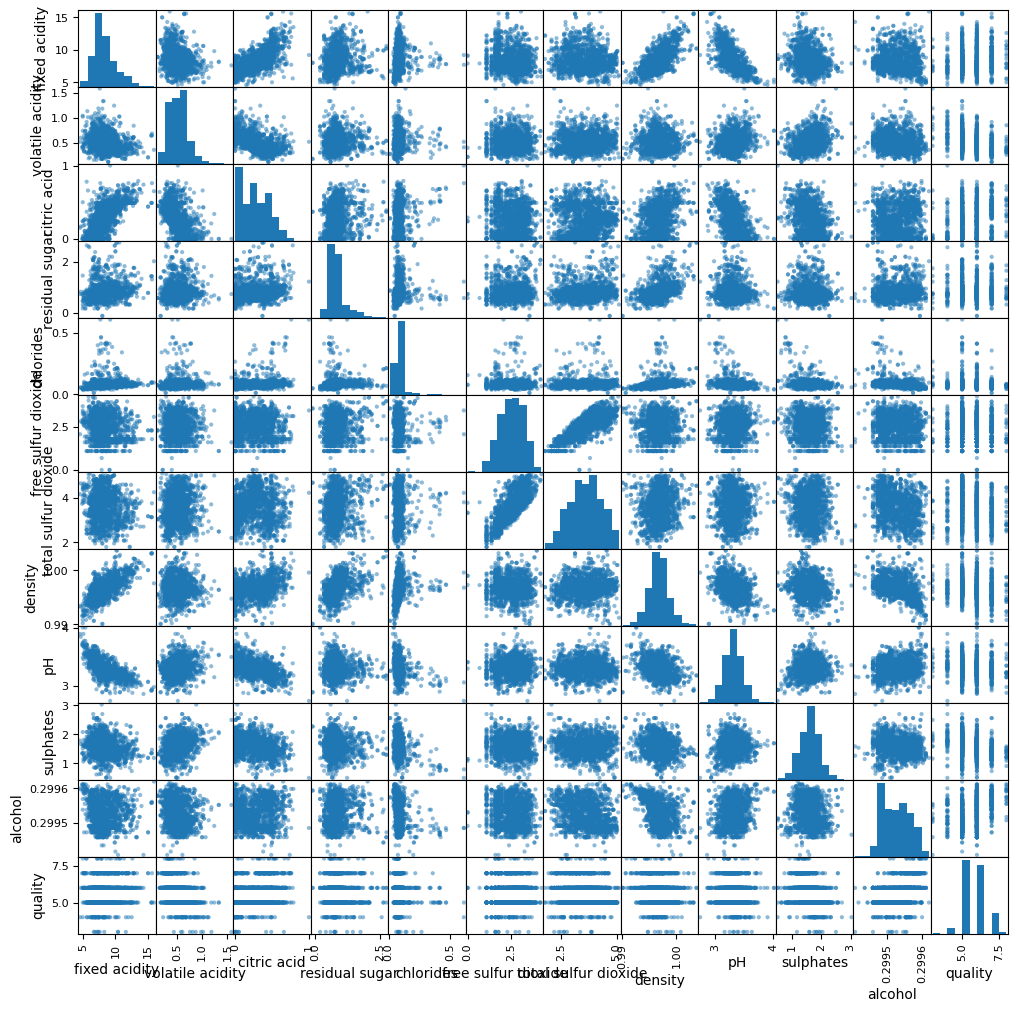

In [170]:
pd.plotting.scatter_matrix(data, figsize=(12,12))[-1]
plt.show()

### Boxplots for Outliers

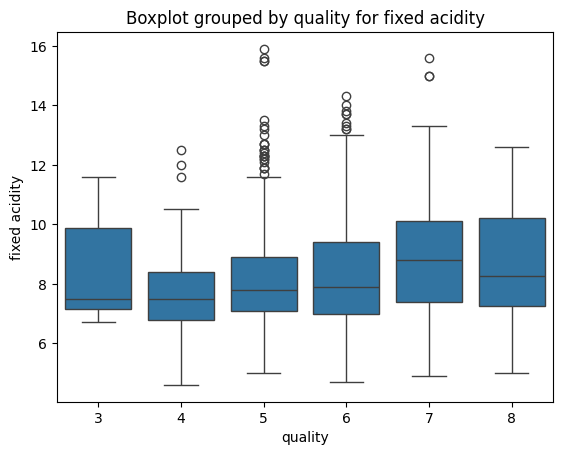

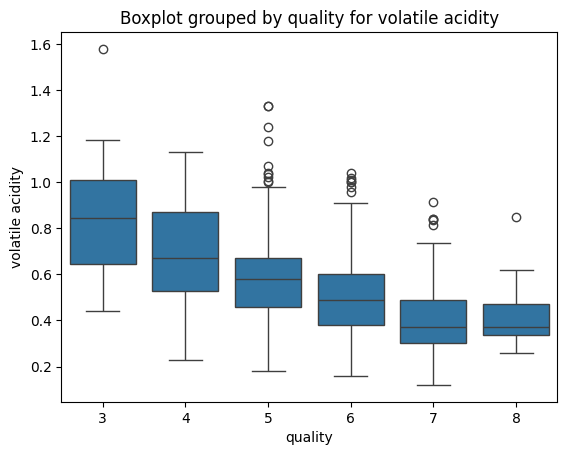

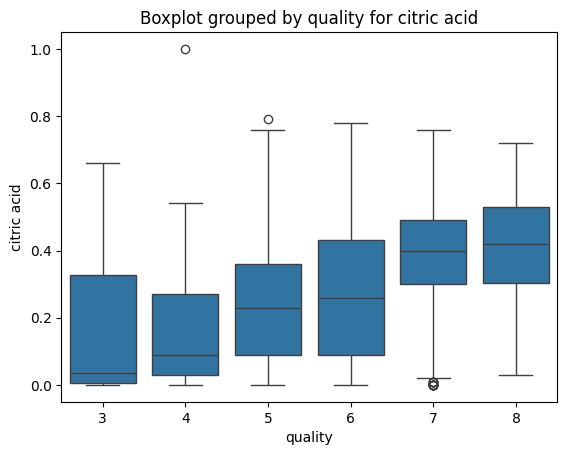

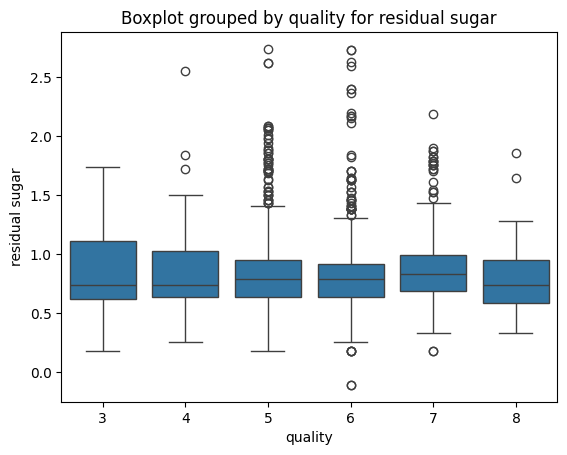

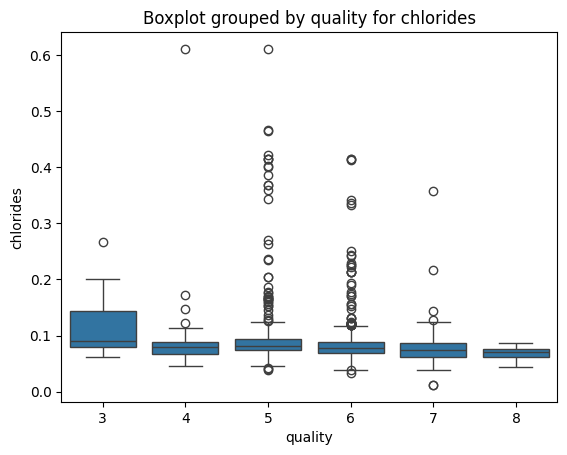

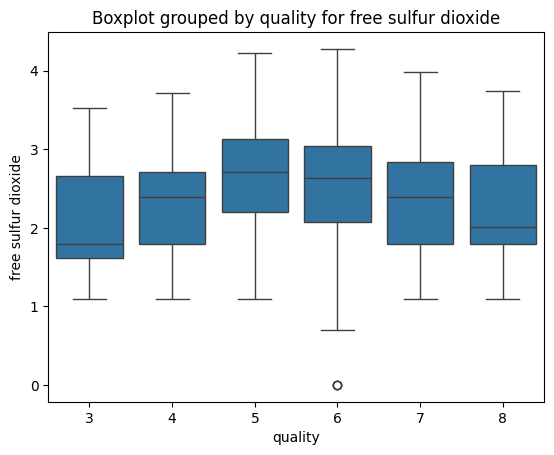

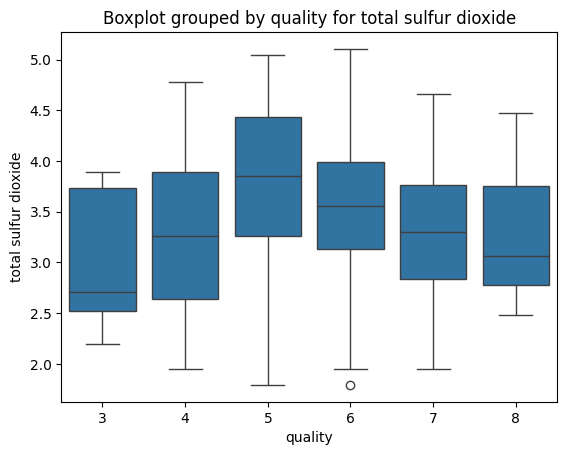

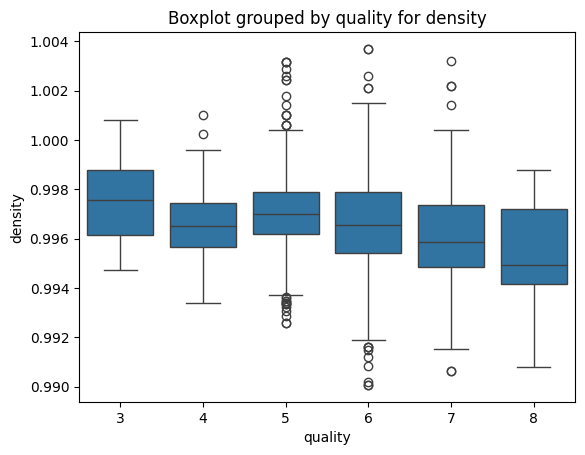

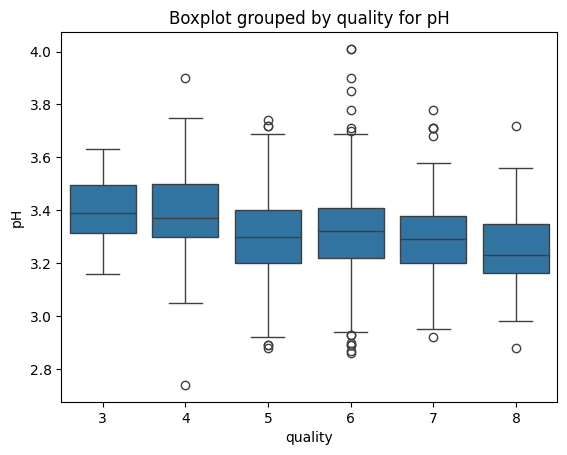

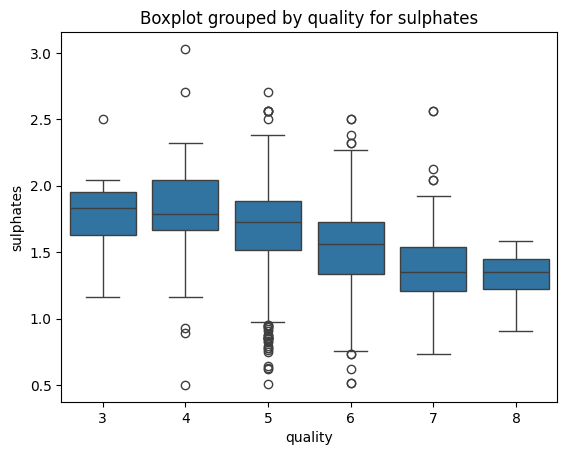

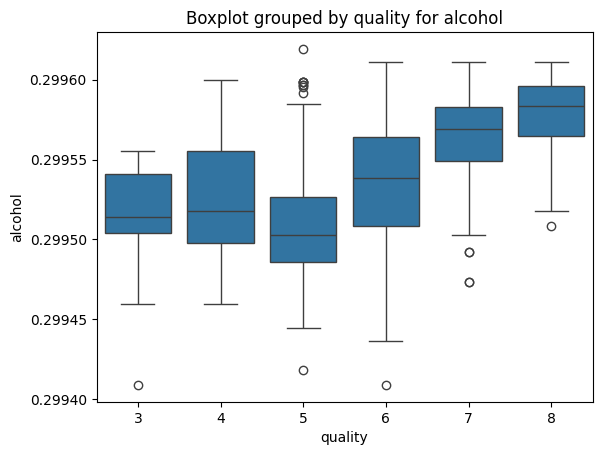

In [171]:
for item in data:
  if item != 'quality':
    draw_boxplot(data, item)

Based on the boxplots, there are only two glaring outliers. There is one case where volitile acicity is ~$1.6$, where the rest of the values fall between $(0.1, 1.4)$. Similarly, `citric acid` falls between $(0, 0.8)$, and there is an obersvation with `citric acid` $ = 1$. These are the last changes that will be made before we apply standard scaler.

In [172]:
data = data[(data['volatile acidity'] < 1.5)] # removing outliers for volatile acidity
data = data[(data['citric acid'] < 0.95)]

# **Work Planned for November 1st to November 7th**
Project will proceed with data processing. We will **apply the
StandardScaler** function from TensorFlow to normalize the features and carry out feature engineering to
create new variables that may enhance the model’s ability to predict wine quality. This step is *essential for
preparing the data* for neural network training by ensuring all features are appropriately scaled and engineered.

### Correlation Matrix

It's important to check the covariance matrix for confounding variables. If two vars are highly corellated, it might be wise to only include one of them in the model, or create a new feature all together.

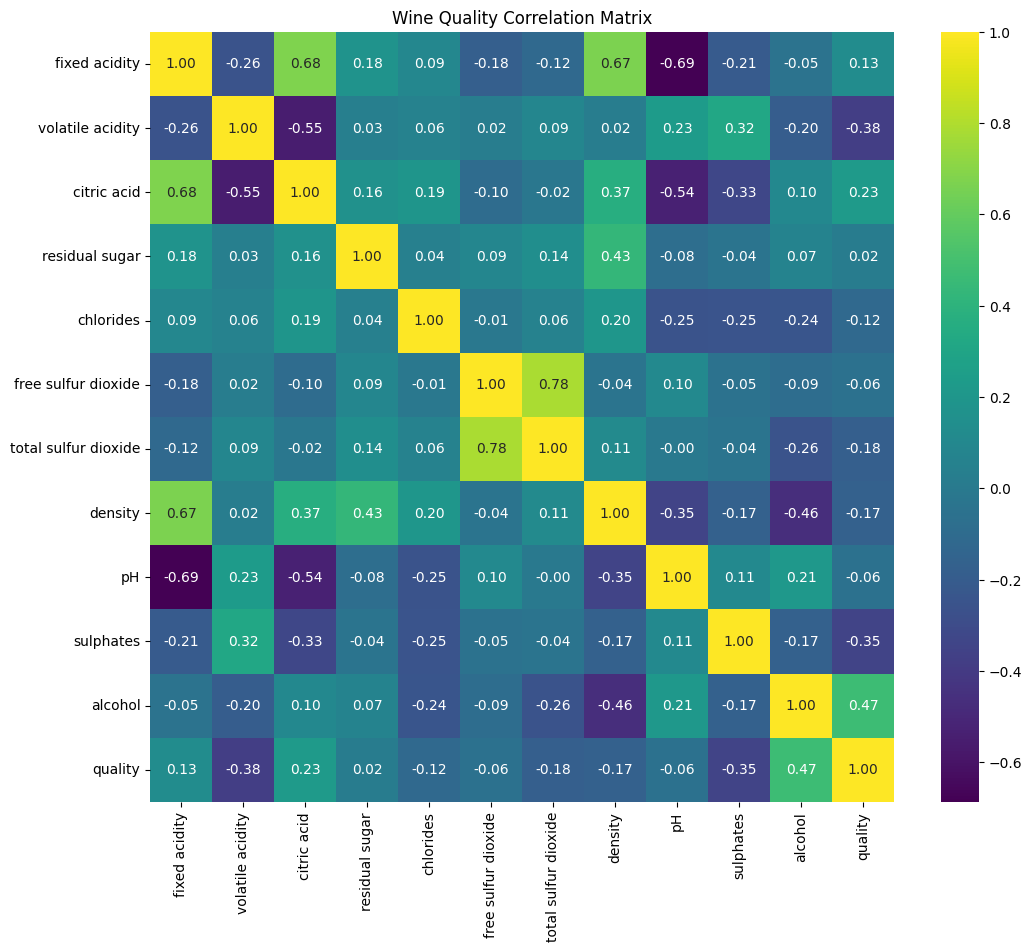

In [181]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Wine Quality Correlation Matrix')
plt.show()

Since $corr($ `free sulfur dioxide`, `total sulfur dioxide`$) = 0.78$, we will remove free sulfur dioxide from the dataset for traing the model, since it will be partly included with `total sulfur dioxide`.

###Train-Test split

In [182]:
from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Below is duplicated code with unqiue naming, that will be used at the end for validation

In [183]:
X = data.drop('quality', axis=1)
y = data['quality']
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=1)

### Applying StandardScaler

In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.270467         -0.662167     1.877624       -0.187404   0.107817   
1       1.982070         -0.831797     1.419809       -0.315140  -0.354194   
2       1.582696         -0.605624     1.012862        0.323600  -0.060187   
3      -1.555242          0.072895    -1.174477       -0.895358  -0.816205   
4       0.441627         -1.284143     0.351574       -0.449109  -0.501197   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.517499              0.196093  0.974621  1.465310  -0.226912   
1            -1.386497             -0.943020  0.974621 -1.286937   0.070212   
2            -0.517499             -0.107356  0.324679 -0.454862  -0.884830   
3            -1.386497             -1.487984 -1.331624  2.617414   0.408319   
4            -0.092183             -0.548917 -0.828443 -0.326851  -1.213789   

    alcohol  
0  0.264711  
1  0.537108  
2  1.409417  
3  0.993326  
4  1.184903

### Updated Covariance Matrix

Since our values are now scaled, our covariance matrix will tell us more about the data and look much closer to the correlation matrix on the non-scaled data

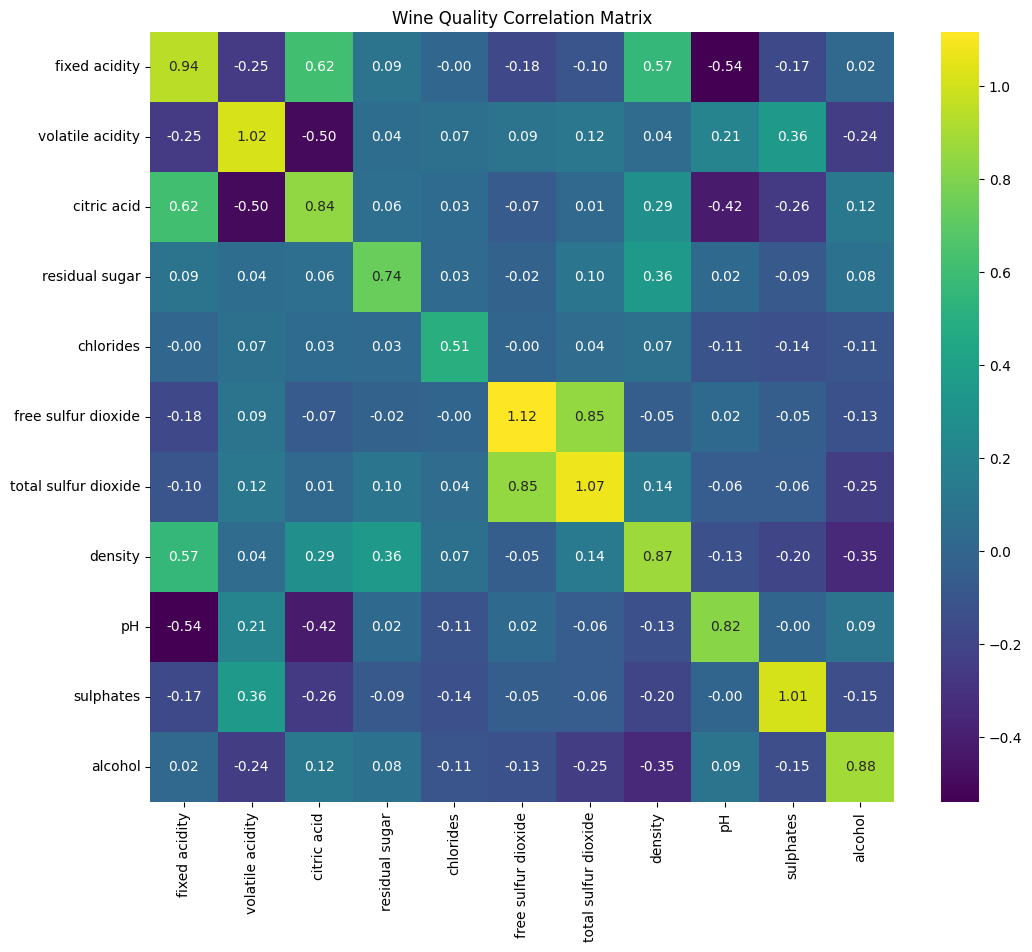

In [185]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_test_scaled.cov(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Wine Quality Correlation Matrix')
plt.show()

### Random Forest for feature importance

                 feature  importance
10               alcohol    0.279491
9              sulphates    0.142195
1       volatile acidity    0.118382
6   total sulfur dioxide    0.081100
4              chlorides    0.064307
8                     pH    0.059135
3         residual sugar    0.056924
7                density    0.053345
5    free sulfur dioxide    0.049042
0          fixed acidity    0.048168
2            citric acid    0.047911


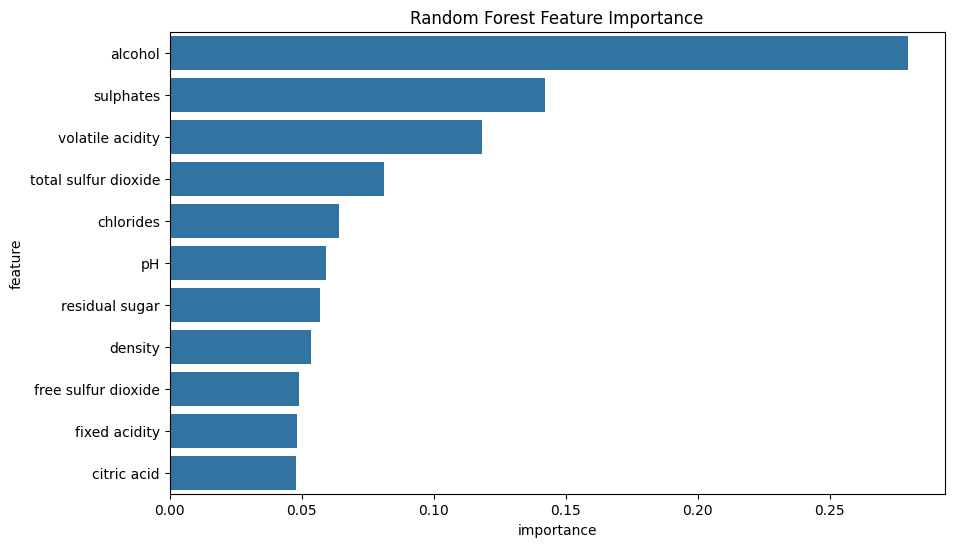

In [186]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
model = RandomForestRegressor(n_estimators=100, random_state=1)
# If classification, use:
# model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feature_importance_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

All of our features seem to be at least somewhat important to predicting `quality`, so we will leave our features as is for now, and focus on feature engineering more later on.


# **Work Planned for November 8th to November 15th**
The project focus will shift to model selection and preliminary testing,
where we will develop an initial deep neural network model using TensorFlow's Keras API. This stage
will involve defining the network architecture, selecting activation functions, and running early tests to
evaluate the model's initial performance on the dataset. We will validate the dataset for compatibility with
the neural network and assess any core issues or necessary adjustments.



We also need to perform one-hot encoding on our `quality` classes, since they go from 3 to 8, instead of starting at zero.

### Initial Model selection, compilation, training, and sharing accuracy
We will begin with a simple DNN model trained on one layer, and potentially add as we go. We will use ReLU activation at first, but we will experiment with different activation functions.

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#n_classes = y_train.shape[1] #currently not used
n_features = X_train.shape[1]

#initializing the model design
model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    # Hidden Layer
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression (linear by default), n_classes, activation = 'softmax' for classification
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = 'adam'
model.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])

### Initial Model Training

Before training the model, we need to partition our training data in validation and training.

In [45]:
# partition training set into training and validation set
X_validate = X_train[1000:]
X_train = X_train[:1000]
y_validate = y_train[1000:]
y_train = y_train[:1000]

print(f"X_train has shape {X_train.shape}")
print(f"y_train has shape {y_train.shape}")
print(f"X_validate has shape {X_validate.shape}")
print(f"y_validate has shape {y_validate.shape}")




X_train has shape (1000, 11)
y_train has shape (1000,)
X_validate has shape (276, 11)
y_validate has shape (276,)


In [46]:
#change the values from going

Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 12.8512 - mae: 3.3354 - val_loss: 1.0198 - val_mae: 0.8070
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1617 - mae: 0.8653 - val_loss: 0.9545 - val_mae: 0.7814
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0596 - mae: 0.8267 - val_loss: 0.9000 - val_mae: 0.7603
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9662 - mae: 0.7943 - val_loss: 0.8797 - val_mae: 0.7520
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9722 - mae: 0.8025 - val_loss: 0.8793 - val_mae: 0.7523
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9597 - mae: 0.7913 - val_loss: 0.8427 - val_mae: 0.7373
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9449 - mae: 0.7887 - val_loss: 0.8222 - val_mae: 0.7296
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8980 - mae: 0.7706 - val_loss: 0.8055 - val_mae: 0.7240
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8965 - mae

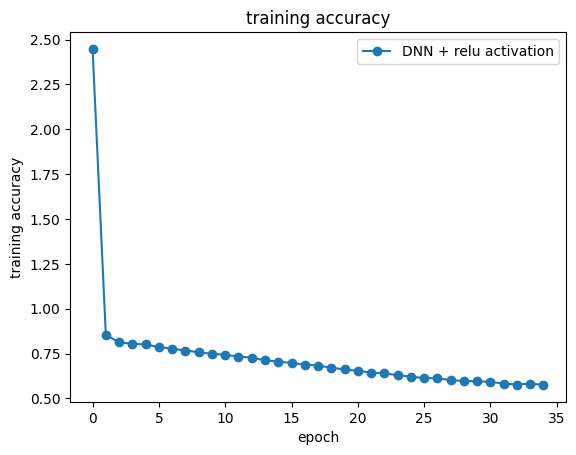

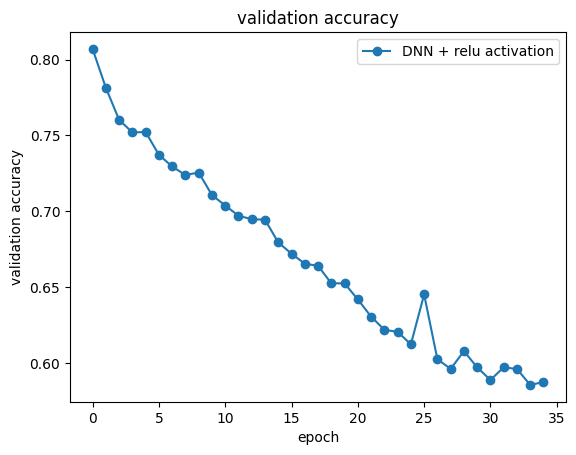

In [47]:
history_init_model = model.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy
plt.plot(history_init_model.history['mae'], 'o-', label='DNN + {} activation'.format('relu'))
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_init_model.history['val_mae'], 'o-', label='DNN + {} activation'.format('relu'))
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

Checking the $R^2$ of the model

In [48]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R²:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
R²: 0.1368967890739441


These are the results of the first model. They aren't spectacular. Lets see how the model's accuracy changes by adding a second hidden layer.

### Training model complied with two hidden layers

We will try adding a layer to improve accuracy. This is one way we can try and improve the fit of our model. Below is code for model selection and compilation.

Below is code for training our model on two hidden layers, along with graphs of training and testing accuracy compared to the model with one hidden layer

Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 12.5902 - mae: 3.0473 - val_loss: 1.4073 - val_mae: 0.9384
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4740 - mae: 0.9378 - val_loss: 0.9952 - val_mae: 0.8081
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0390 - mae: 0.8107 - val_loss: 0.9199 - val_mae: 0.7726
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0423 - mae: 0.8160 - val_loss: 0.8815 - val_mae: 0.7541
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9470 - mae: 0.7998 - val_loss: 0.8526 - val_mae: 0.7425
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9325 - mae: 0.7807 - val_loss: 0.8504 - val_mae: 0.7436
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9130 - mae: 0.7849 - val_loss: 0.8075 - val_mae: 0.7286
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8677 - mae: 0.7613 - val_loss: 0.7623 - val_mae: 0.7119
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8034 - mae

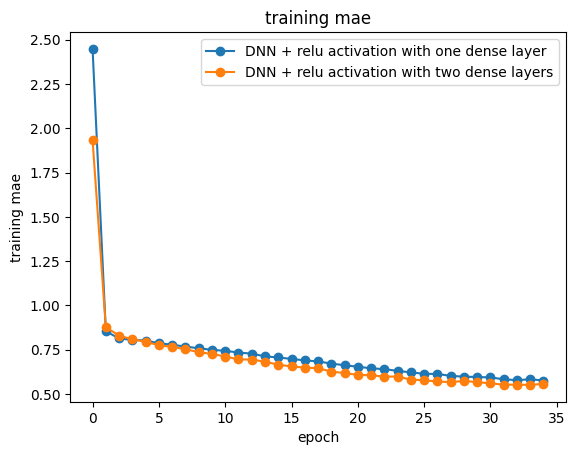

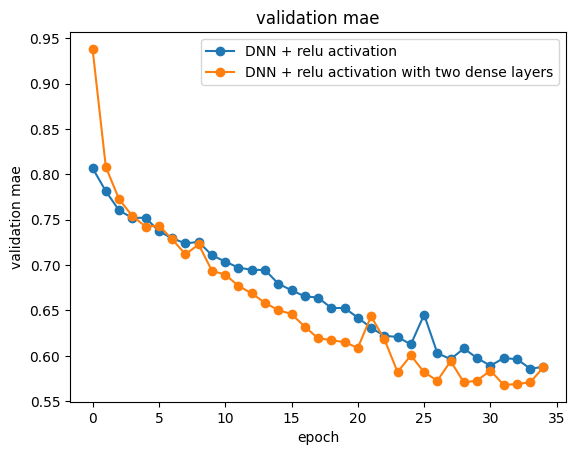

In [49]:
#same code from the initial model selection, with a second layer
model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    #hiddden layers
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),

    layers.Dense(1)  # Output layer for regression (linear by default)
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = 'adam'
model.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])


#We will opt for the naming convention - NN type (dense in this case), activation function (relu), number of layers (two)
history_DNN_relu_two = model.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy
plt.plot(history_init_model.history['mae'], 'o-', label='DNN + {} activation with one dense layer'.format('relu'))
plt.plot(history_DNN_relu_two.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('relu'))
plt.title('training mae')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_init_model.history['val_mae'], 'o-', label='DNN + {} activation'.format('relu'))
plt.plot(history_DNN_relu_two.history['val_mae'], 'o-', label='DNN + {} activation with two dense layers'.format('relu'))
plt.title('validation mae')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

Checking the $R^2$ of the model

In [50]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R²:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
R²: 0.12038350105285645


This somehow performs worse. Lets quickly add some dropout into our model, and re-run and compare again with our one layer model to see if we are now left with a better accuracy.

Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 18.3660 - mae: 3.8423 - val_loss: 1.7276 - val_mae: 1.0646
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1232 - mae: 0.8566 - val_loss: 0.8645 - val_mae: 0.7518
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9918 - mae: 0.7973 - val_loss: 0.8029 - val_mae: 0.7247
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8666 - mae: 0.7414 - val_loss: 0.7656 - val_mae: 0.7062
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8737 - mae: 0.7515 - val_loss: 0.7425 - val_mae: 0.7028
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7464 - mae: 0.7024 - val_loss: 0.7101 - val_mae: 0.6855
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7263 - mae: 0.6802 - val_loss: 0.7003 - val_mae: 0.6731
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7222 - mae: 0.6869 - val_loss: 0.6808 - val_mae: 0.6729
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6325 - mae

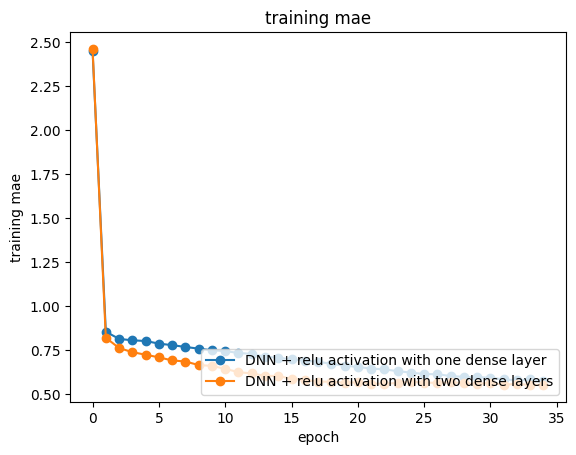

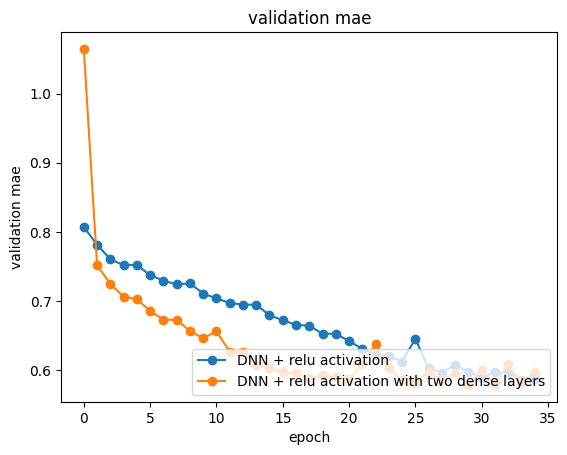

In [51]:
model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.25), #added droput to reduce overfitting
    layers.Dense(64, activation='relu'),

    layers.Dense(1)  # Output layer for regression (linear by default)
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = 'adam'
model.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])


#training model
history_DNN_relu_two = model.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy
plt.plot(history_init_model.history['mae'], 'o-', label='DNN + {} activation with one dense layer'.format('relu'))
plt.plot(history_DNN_relu_two.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('relu'))
plt.title('training mae')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

#plot validation accuracy
plt.plot(history_init_model.history['val_mae'], 'o-', label='DNN + {} activation'.format('relu'))
plt.plot(history_DNN_relu_two.history['val_mae'], 'o-', label='DNN + {} activation with two dense layers'.format('relu'))
plt.title('validation mae')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

In [52]:
y_pred = model.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R²:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R²: 0.10980367660522461


### Using a sigmoid activation function and tanh activation function

In [53]:
model_sigmoid = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='sigmoid'),

    layers.Dense(64, activation='sigmoid'),

    layers.Dense(1)  # Output layer for regression (linear by default)
])

model_tanh = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='tanh'),

    layers.Dense(64, activation='tanh'),

    layers.Dense(1)  # Output layer for regression (linear by default)
])

'''
Compile the model for training. Since this is a multi-class classification
problem, we use the 'categorical_crossentropy' loss function and 'accuracy' as
the desired performance metric.
'''
opt = keras.optimizers.Adam(learning_rate=0.001)
model_sigmoid.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])

opt = keras.optimizers.Adam(learning_rate=0.001)
model_tanh.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])

Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 43.2823 - mae: 6.4935 - val_loss: 18.3242 - val_mae: 4.2056
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0197 - mae: 3.7522 - val_loss: 5.6767 - val_mae: 2.2492
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5701 - mae: 1.9862 - val_loss: 2.0465 - val_mae: 1.2375
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8724 - mae: 1.1412 - val_loss: 0.9840 - val_mae: 0.6985
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8857 - mae: 0.6807 - val_loss: 0.7005 - val_mae: 0.6834
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7058 - mae: 0.6947 - val_loss: 0.6409 - val_mae: 0.6790
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6284 - mae: 0.6819 - val_loss: 0.6387 - val_mae: 0.6773
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6996 - mae: 0.7037 - val_loss: 0.6421 - val_mae: 0.6763
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6725 - m

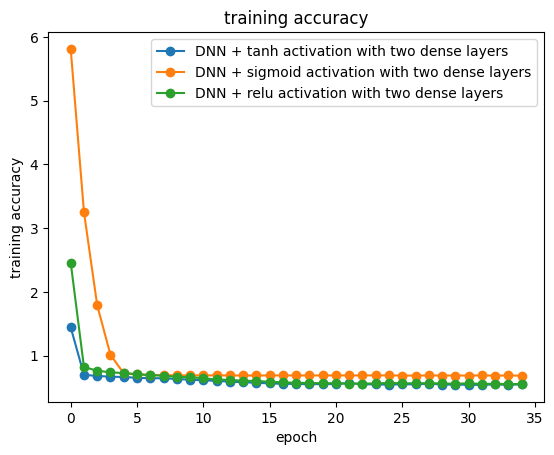

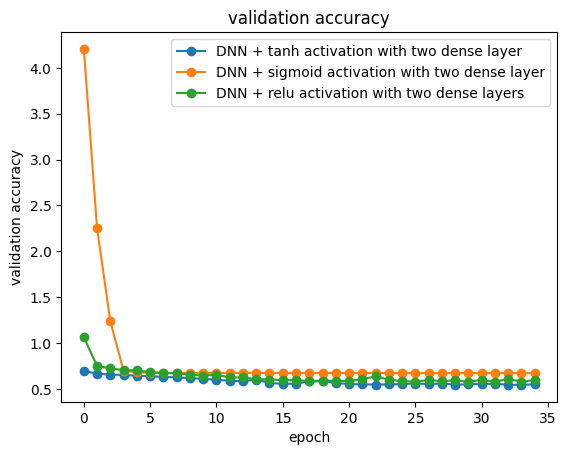

In [54]:
history_DNN_sigmoid_two = model_sigmoid.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

history_tanh = model_tanh.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy

plt.plot(history_tanh.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('tanh'))
plt.plot(history_DNN_sigmoid_two.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('sigmoid'))
plt.plot(history_DNN_relu_two.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('relu'))
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_tanh.history['val_mae'], 'o-', label='DNN + {} activation with two dense layer'.format('tanh'))
plt.plot(history_DNN_sigmoid_two.history['val_mae'], 'o-', label='DNN + {} activation with two dense layer'.format('sigmoid'))
plt.plot(history_DNN_relu_two.history['val_mae'], 'o-', label='DNN + {} activation with two dense layers'.format('relu'))
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

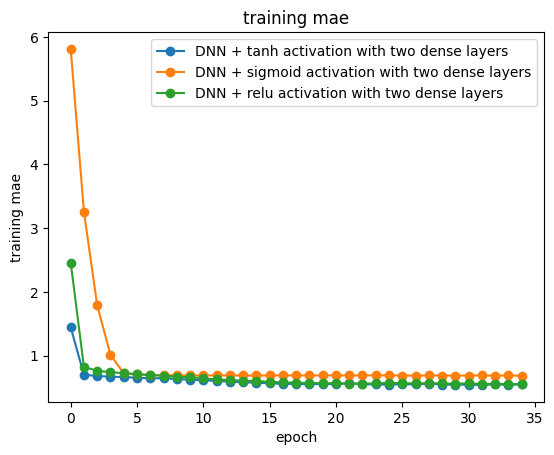

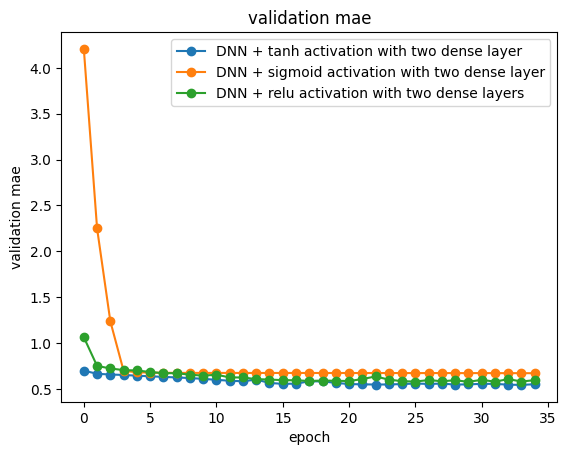

In [55]:
plt.plot(history_tanh.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('tanh'))
plt.plot(history_DNN_sigmoid_two.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('sigmoid'))
plt.plot(history_DNN_relu_two.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('relu'))
plt.title('training mae')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_tanh.history['val_mae'], 'o-', label='DNN + {} activation with two dense layer'.format('tanh'))
plt.plot(history_DNN_sigmoid_two.history['val_mae'], 'o-', label='DNN + {} activation with two dense layer'.format('sigmoid'))
plt.plot(history_DNN_relu_two.history['val_mae'], 'o-', label='DNN + {} activation with two dense layers'.format('relu'))
plt.title('validation mae')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

Checking $R^2$

In [56]:
from sklearn.metrics import r2_score

y_pred = model_sigmoid.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R² for the sigmoid model is :", r2)

y_pred = model_tanh.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R² for the tanh model is:", r2)

y_pred = model.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R² for the relu model is:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
R² for the sigmoid model is : -0.009106874465942383
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
R² for the tanh model is: 0.2113550901412964
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R² for the relu model is: 0.10980367660522461


Relu seems to perform better at first, and over time. Lets stick with ReLU, knowing what we know now.

###Trying with varied amounts of layers (2 - 5)

In [57]:
def DNN_tanh_nlayers(n):
  n_features = X_train.shape[1]
  model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128, activation='tanh'),
  ])
  for i in range(2, n):
    print(f"layer number {i} has been added")

    model.add(layers.Dense(64, activation='tanh'))

  model.add(layers.Dense(32, activation='tanh'))


  model.add(layers.Dense(1)) #final layer for regression
  return model

#### Model with three layers

layer number 2 has been added
Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 10.2436 - mae: 2.5489 - val_loss: 0.7689 - val_mae: 0.6659
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6736 - mae: 0.6631 - val_loss: 0.6289 - val_mae: 0.6711
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6401 - mae: 0.6799 - val_loss: 0.6322 - val_mae: 0.6655
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6481 - mae: 0.6766 - val_loss: 0.6293 - val_mae: 0.6612
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6799 - mae: 0.6879 - val_loss: 0.6166 - val_mae: 0.6588
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6493 - mae: 0.6862 - val_loss: 0.6136 - val_mae: 0.6548
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6271 - mae: 0.6666 - val_loss: 0.6154 - val_mae: 0.6502
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6761 - mae: 0.6838 - val_loss: 0.6040 - val_mae: 0.6480
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

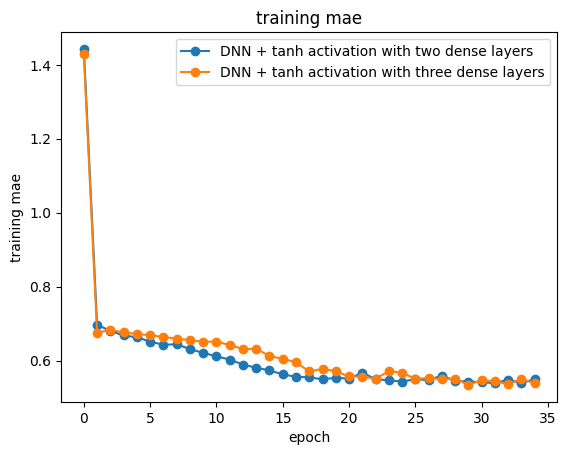

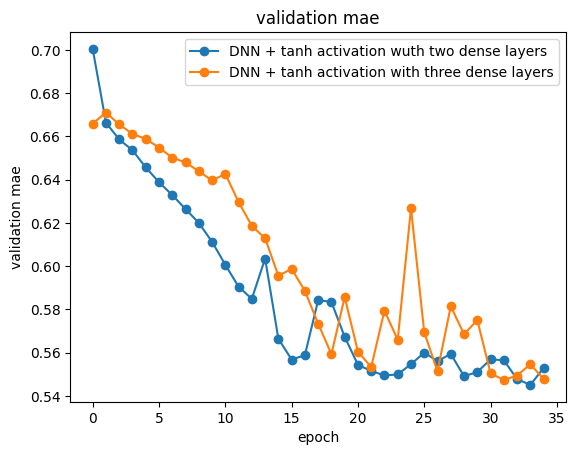

In [58]:
model_DNN_tanh_three = DNN_tanh_nlayers(3)

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay=3e-6)
model_DNN_tanh_three.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])


#training model
history_DNN_tanh_three = model_DNN_tanh_three.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy
plt.plot(history_tanh.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['mae'], 'o-', label='DNN + {} activation with three dense layers'.format('tanh'))
plt.title('training mae')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_tanh.history['val_mae'], 'o-', label='DNN + {} activation wuth two dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['val_mae'], 'o-', label='DNN + {} activation with three dense layers'.format('tanh'))
plt.title('validation mae')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

R^2 for tanh with three layers

In [59]:
y_pred = model_DNN_tanh_three.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R² for the model with three hidden layers is:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
R² for the model with three hidden layers is: 0.22467315196990967


#### model with four layers

layer number 2 has been added
layer number 3 has been added
Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 10.7994 - mae: 2.7839 - val_loss: 0.7310 - val_mae: 0.6686
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6637 - mae: 0.6501 - val_loss: 0.6291 - val_mae: 0.6701
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6566 - mae: 0.6856 - val_loss: 0.6328 - val_mae: 0.6657
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6017 - mae: 0.6601 - val_loss: 0.6194 - val_mae: 0.6614
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6423 - mae: 0.6766 - val_loss: 0.6107 - val_mae: 0.6542
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5935 - mae: 0.6511 - val_loss: 0.6056 - val_mae: 0.6456
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5963 - mae: 0.6456 - val_loss: 0.6099 - val_mae: 0.6346
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6086 - mae: 0.6359 - val_loss: 0.5681 - val_mae: 0.6144
Epoch 9/35

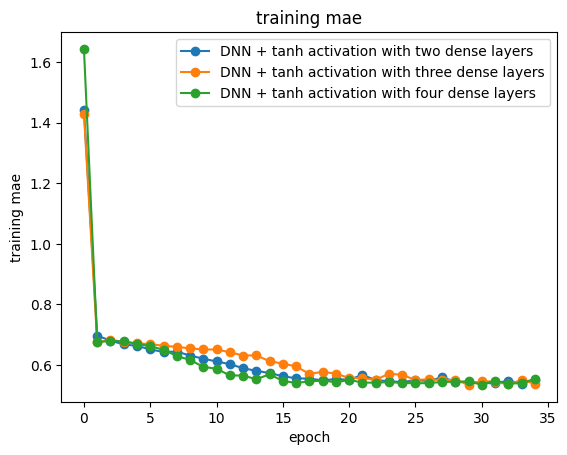

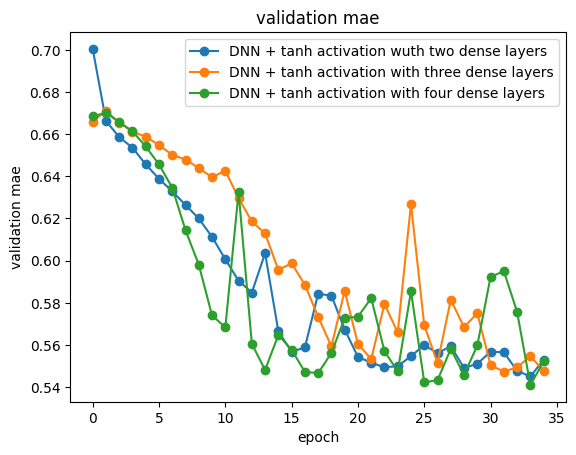

In [60]:
model_DNN_tanh_four = DNN_tanh_nlayers(4)

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay=3e-6)
model_DNN_tanh_four.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])


#training model
history_DNN_tanh_four = model_DNN_tanh_four.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy
plt.plot(history_tanh.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['mae'], 'o-', label='DNN + {} activation with three dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_four.history['mae'], 'o-', label='DNN + {} activation with four dense layers'.format('tanh'))

plt.title('training mae')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_tanh.history['val_mae'], 'o-', label='DNN + {} activation wuth two dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['val_mae'], 'o-', label='DNN + {} activation with three dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_four.history['val_mae'], 'o-', label='DNN + {} activation with four dense layers'.format('tanh'))
plt.title('validation mae')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

$R^2$ value

In [61]:
from sklearn.metrics import r2_score

y_pred = model_DNN_tanh_four.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R² of the model with 4 layers:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
R² of the model with 4 layers: 0.23538517951965332


#### Model with 5 layers

layer number 2 has been added
layer number 3 has been added
layer number 4 has been added
Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 9.9097 - mae: 2.5061 - val_loss: 0.7764 - val_mae: 0.6665
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6689 - mae: 0.6623 - val_loss: 0.6260 - val_mae: 0.6703
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6309 - mae: 0.6763 - val_loss: 0.6253 - val_mae: 0.6662
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5839 - mae: 0.6483 - val_loss: 0.6268 - val_mae: 0.6609
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6478 - mae: 0.6751 - val_loss: 0.6384 - val_mae: 0.6542
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6221 - mae: 0.6588 - val_loss: 0.5957 - val_mae: 0.6443
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6157 - mae: 0.6492 - val_loss: 0.5840 - val_mae: 0.6295
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6683 - mae: 0.6679 - val_loss: 0.5663

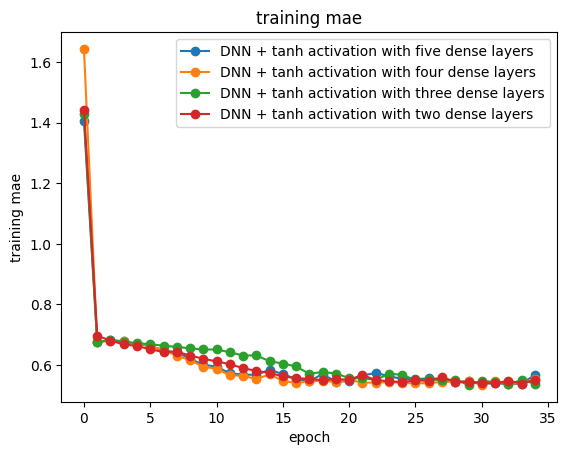

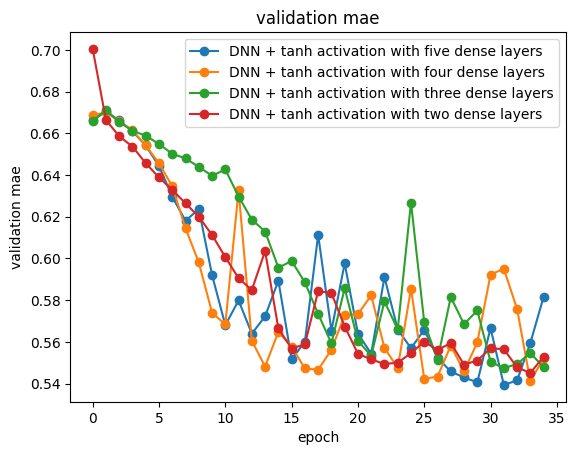

In [62]:
model_DNN_tanh_five = DNN_tanh_nlayers(5)

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay=3e-6)
model_DNN_tanh_five.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])


#training model
history_DNN_tanh_five = model_DNN_tanh_five.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy
plt.plot(history_DNN_tanh_five.history['mae'], 'o-', label='DNN + {} activation with five dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_four.history['mae'], 'o-', label='DNN + {} activation with four dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['mae'], 'o-', label='DNN + {} activation with three dense layers'.format('tanh'))
plt.plot(history_tanh.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('tanh'))
plt.title('training mae')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_DNN_tanh_five.history['val_mae'], 'o-', label='DNN + {} activation with five dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_four.history['val_mae'], 'o-', label='DNN + {} activation with four dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['val_mae'], 'o-', label='DNN + {} activation with three dense layers'.format('tanh'))
plt.plot(history_tanh.history['val_mae'], 'o-', label='DNN + {} activation with two dense layers'.format('tanh'))
plt.title('validation mae')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

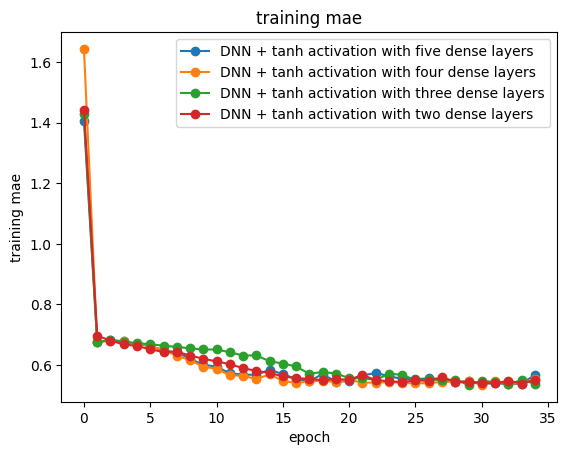

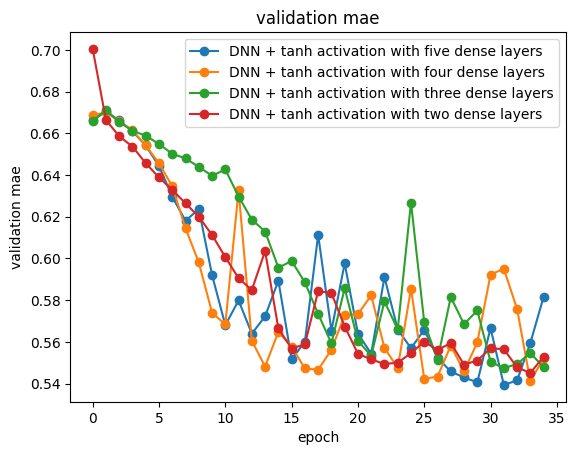

In [63]:
# Plot training accuracy
plt.plot(history_DNN_tanh_five.history['mae'], 'o-', label='DNN + {} activation with five dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_four.history['mae'], 'o-', label='DNN + {} activation with four dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['mae'], 'o-', label='DNN + {} activation with three dense layers'.format('tanh'))
plt.plot(history_tanh.history['mae'], 'o-', label='DNN + {} activation with two dense layers'.format('tanh'))
plt.title('training mae')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_DNN_tanh_five.history['val_mae'], 'o-', label='DNN + {} activation with five dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_four.history['val_mae'], 'o-', label='DNN + {} activation with four dense layers'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['val_mae'], 'o-', label='DNN + {} activation with three dense layers'.format('tanh'))
plt.plot(history_tanh.history['val_mae'], 'o-', label='DNN + {} activation with two dense layers'.format('tanh'))
plt.title('validation mae')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [64]:
y_pred = model_DNN_tanh_five.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R² of the model with 5 layers:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
R² of the model with 5 layers: 0.1855158805847168


It seems like the closest we can get is $~.55$ mean avg error.

In [65]:
print(f"model with 5 layers has a best MAE of {min(history_DNN_tanh_five.history['val_mae'])}")
print(f"model with 4 layers has a best MAE of {min(history_DNN_tanh_four.history['val_mae'])}")
print(f"model with 3 layers has a best MAE of {min(history_DNN_tanh_three.history['val_mae'])}")

model with 5 layers has a best MAE of 0.5393243432044983
model with 4 layers has a best MAE of 0.5410270094871521
model with 3 layers has a best MAE of 0.54736328125


## Model with new training dataset, sticking with two layers, and adam optimizer, by removing excess features.

Lets finally try to remove some variables, and see if it streamlines the model. We will keep the model with three layers, however, since the difference adding beyond three layers seems negligible.

### Checking feature importance and cov matrix

In [66]:
def assess_features(X, y):

  #feature importance random forest
  model = RandomForestRegressor(n_estimators=100, random_state=1)

  # Fit the model
  model.fit(X, y)

  # Get feature importances
  importances = model.feature_importances_
  feature_names = X.columns
  feature_importance_df = pd.DataFrame({
      'feature': feature_names,
      'importance': importances
  }).sort_values('importance', ascending=False)

  print(feature_importance_df)
  plt.figure(figsize=(10, 6))
  sns.barplot(x='importance', y='feature', data=feature_importance_df)
  plt.title('Random Forest Feature Importance')
  plt.show()

  #corr matrix
  plt.figure(figsize=(12, 10))
  sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='viridis')
  plt.title('Wine Quality Correlation Matrix')
  plt.show()

                 feature  importance
10               alcohol    0.279491
9              sulphates    0.142195
1       volatile acidity    0.118382
6   total sulfur dioxide    0.081100
4              chlorides    0.064307
8                     pH    0.059135
3         residual sugar    0.056924
7                density    0.053345
5    free sulfur dioxide    0.049042
0          fixed acidity    0.048168
2            citric acid    0.047911


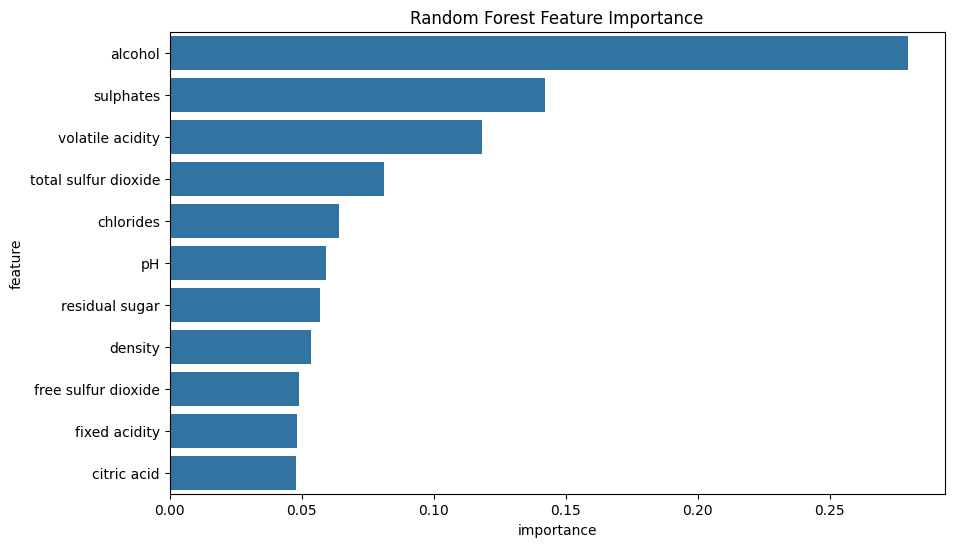

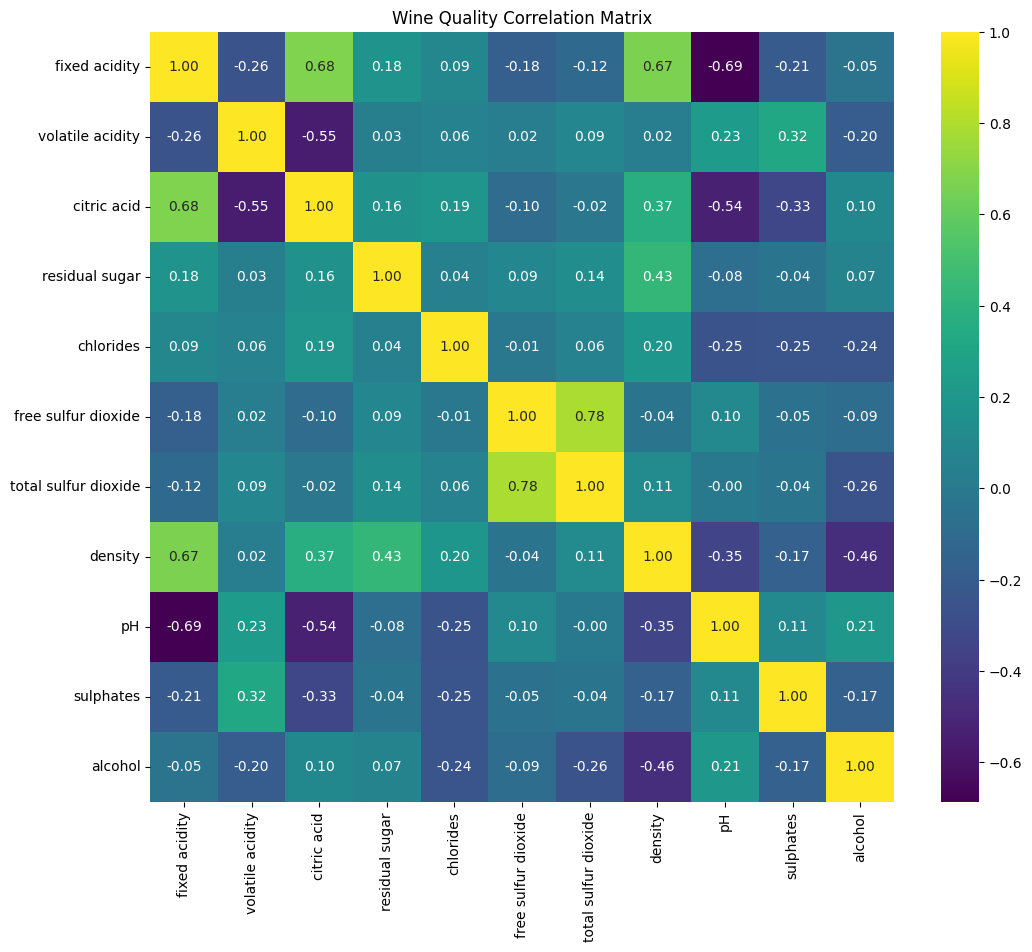

In [67]:
assess_features(X, y)

### removing `citric acid` from feature list
`Citric acid` falls to the bottom of our feature importance, and is somewhat correlated with `fixed acidity`, `volitile acidity`, and `pH`. We will remove it from the training data because of this.

In [68]:
X = data.drop('quality', axis=1).drop('free sulfur dioxide', axis = 1).drop('citric acid', axis = 1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

We will reassess the correlation matrix and feature importances

                feature  importance
8               alcohol    0.285389
7             sulphates    0.151560
1      volatile acidity    0.129624
4  total sulfur dioxide    0.100251
3             chlorides    0.074177
6                    pH    0.071265
2        residual sugar    0.065930
5               density    0.062581
0         fixed acidity    0.059223


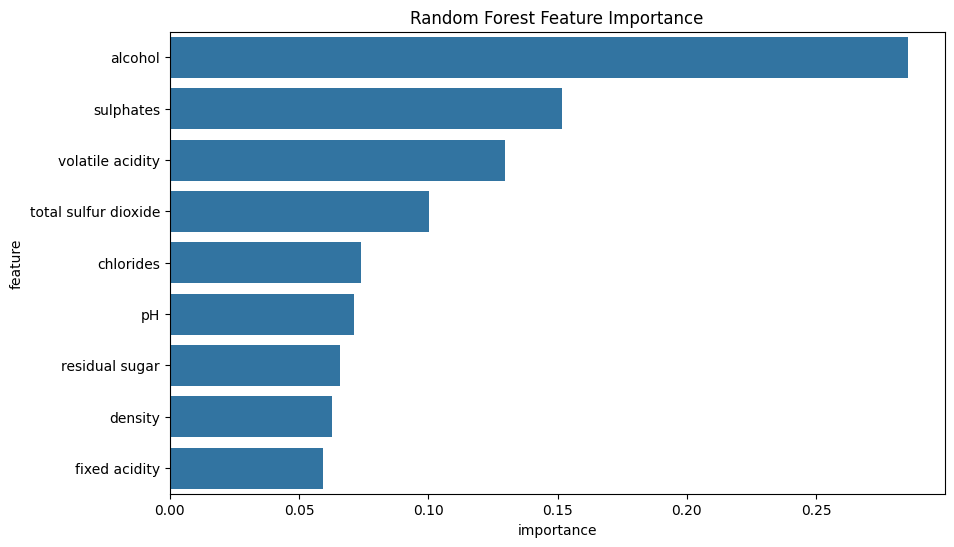

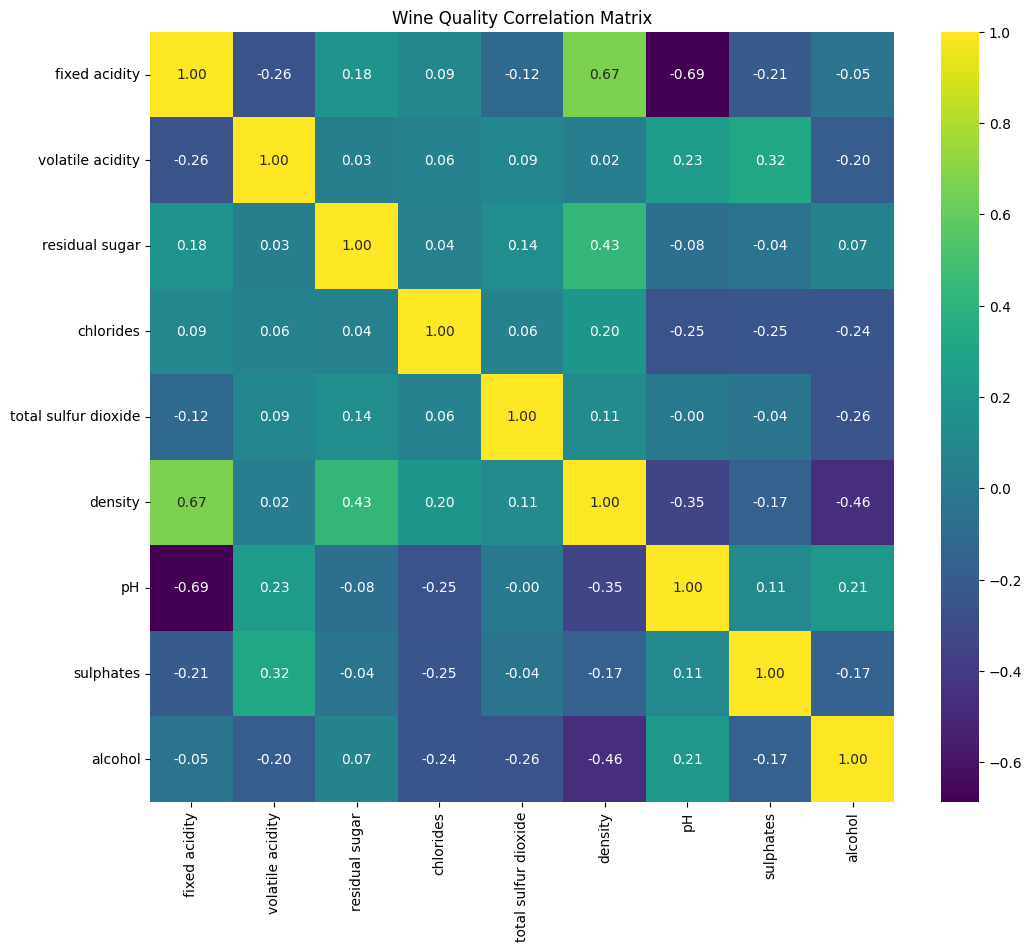

In [69]:
assess_features(X, y)

### removing `fixed acidity` from the feature list

lastly, we will also remove `fixed acidity`. It seems to be the least important feature, and is somewhat strongly correlated wth `pH` and `Density`. Hopefully, removing these extra acidity features will help streamline the model.

                feature  importance
7               alcohol    0.290236
6             sulphates    0.156486
0      volatile acidity    0.136799
3  total sulfur dioxide    0.105046
5                    pH    0.083557
2             chlorides    0.081155
4               density    0.074532
1        residual sugar    0.072189


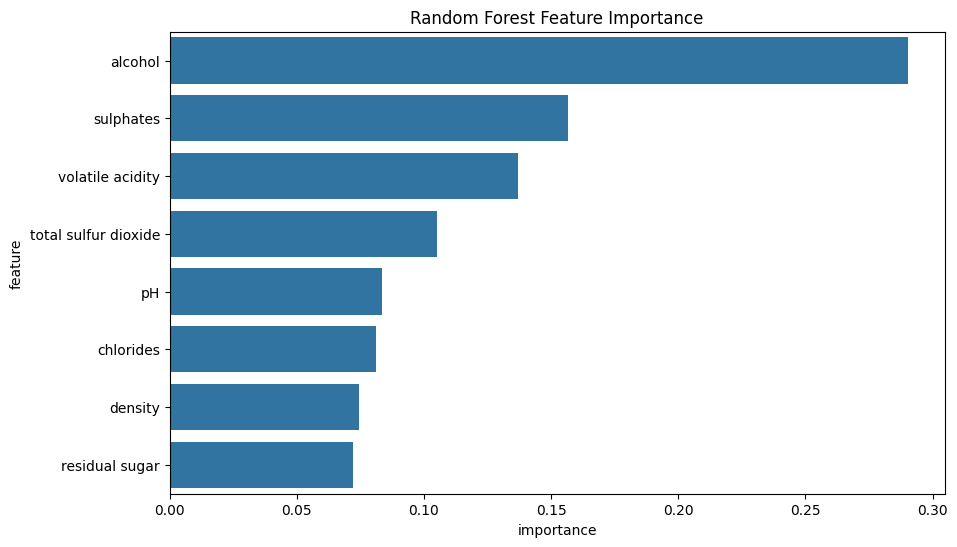

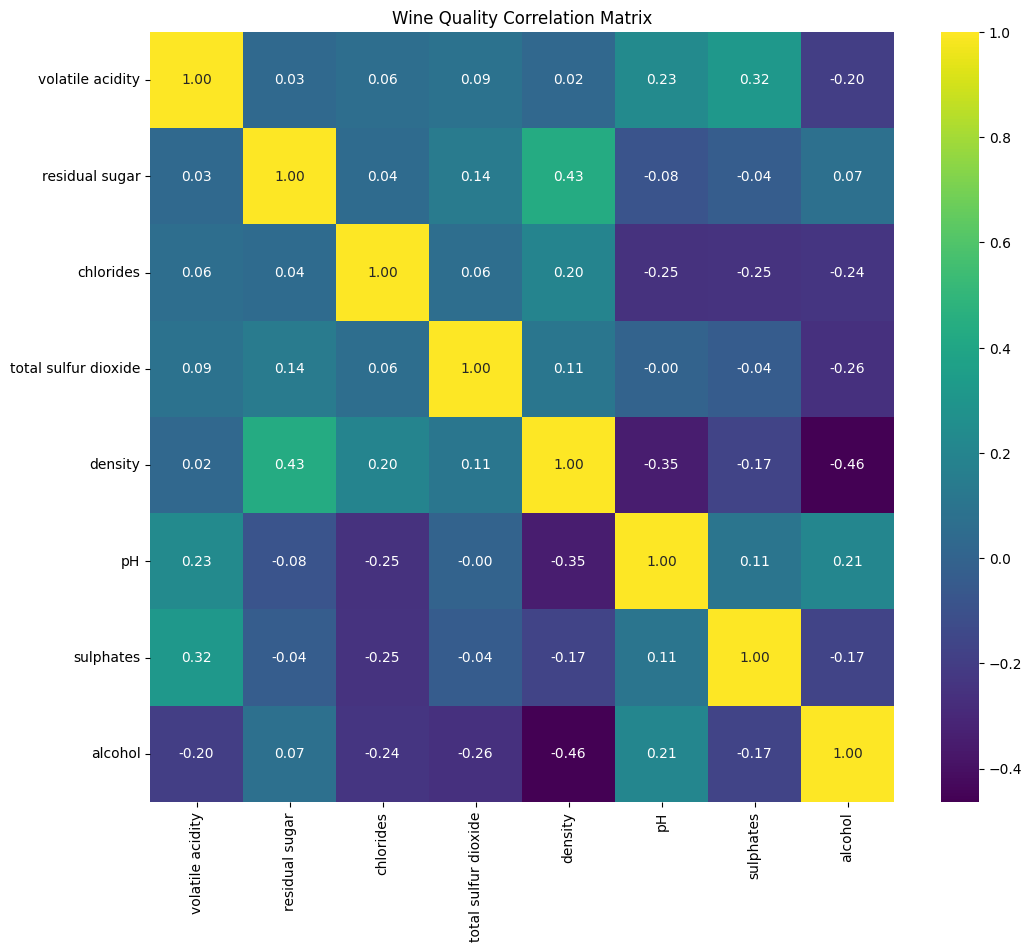

In [70]:
X = data.drop('quality', axis=1).drop('free sulfur dioxide', axis = 1).drop('citric acid', axis = 1).drop('fixed acidity', axis = 1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

assess_features(X, y)

The last feature we could consider removing would be `density`, but lets see how our model with three layers compares now to the previous version, now that we have less features added.

### Re-scaling new features with StandardScaler and partitioning between training and validation

In [71]:
#standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()


# partition training set into training and validation set
X_validate = X_train[1000:]
X_train = X_train[:1000]
y_validate = y_train[1000:]
y_train = y_train[:1000]

print(f"X_train has shape {X_train.shape}")
print(f"y_train has shape {y_train.shape}")
print(f"X_validate has shape {X_validate.shape}")
print(f"y_validate has shape {y_validate.shape}")

X_train has shape (1000, 8)
y_train has shape (1000,)
X_validate has shape (276, 8)
y_validate has shape (276,)


### updated model

Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 12.1209 - mae: 2.8938 - val_loss: 0.6872 - val_mae: 0.6761
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7185 - mae: 0.6797 - val_loss: 0.6556 - val_mae: 0.6757
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6517 - mae: 0.6831 - val_loss: 0.6441 - val_mae: 0.6749
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7229 - mae: 0.7135 - val_loss: 0.6357 - val_mae: 0.6730
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6072 - mae: 0.6619 - val_loss: 0.6345 - val_mae: 0.6699
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6784 - mae: 0.6940 - val_loss: 0.6264 - val_mae: 0.6660
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6462 - mae: 0.6767 - val_loss: 0.6183 - val_mae: 0.6604
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6419 - mae: 0.6759 - val_loss: 0.6062 - val_mae: 0.6520
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6706 - mae

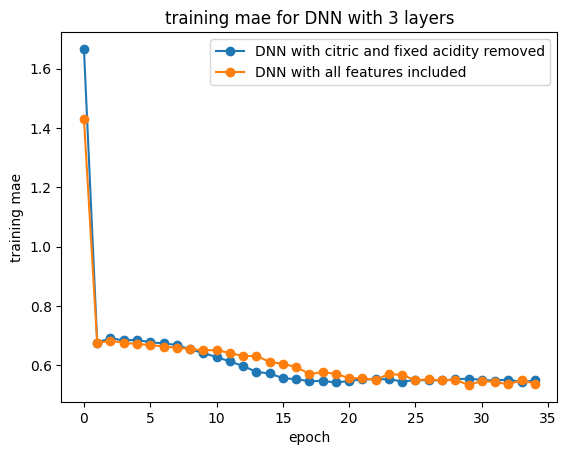

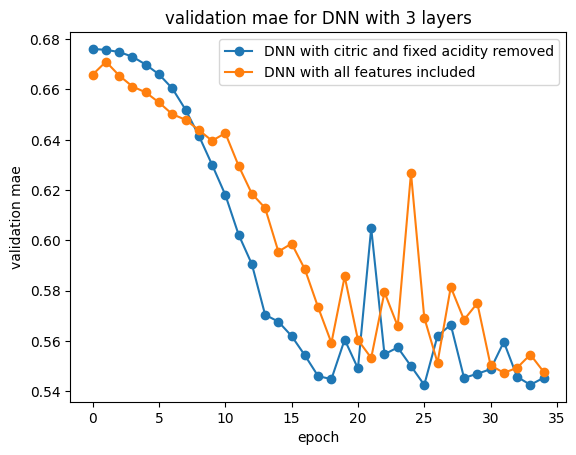

In [72]:
#we have decided on a dense model with a relu activation, removing the extra naming conventions because of this
n_features = X_train.shape[1]
model_minus_acids = keras.Sequential([
    layers.Input(shape=(n_features,)),

    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='tanh'),

    layers.Dense(1)  # Output layer for regression (linear by default)
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay=3e-6)
model_minus_acids.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])


#training model
history_minus_acids = model_minus_acids.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy
plt.plot(history_minus_acids.history['mae'], 'o-', label='DNN with citric and fixed acidity removed'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['mae'], 'o-', label='DNN with all features included'.format('tanh'))
plt.title('training mae for DNN with 3 layers')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_minus_acids.history['val_mae'], 'o-', label='DNN with citric and fixed acidity removed'.format('tanh'))
plt.plot(history_DNN_tanh_three.history['val_mae'], 'o-', label='DNN with all features included'.format('tanh'))
plt.title('validation mae for DNN with 3 layers')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [73]:
y_pred = model_minus_acids.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
print("R² of the model without citric acid or fixed acitity:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R² of the model without citric acid or fixed acitity: 0.2402050495147705


We have an $R^2$

### removing `density` from the feature list
This has improved our model slightly, the last change we will try is removing `density` from our list of features. The changes look as follows, with feature importance, correlation plot, and the comparison of the final model.

                feature  importance
6               alcohol    0.301387
5             sulphates    0.166593
0      volatile acidity    0.146001
3  total sulfur dioxide    0.116842
4                    pH    0.095060
2             chlorides    0.091508
1        residual sugar    0.082609


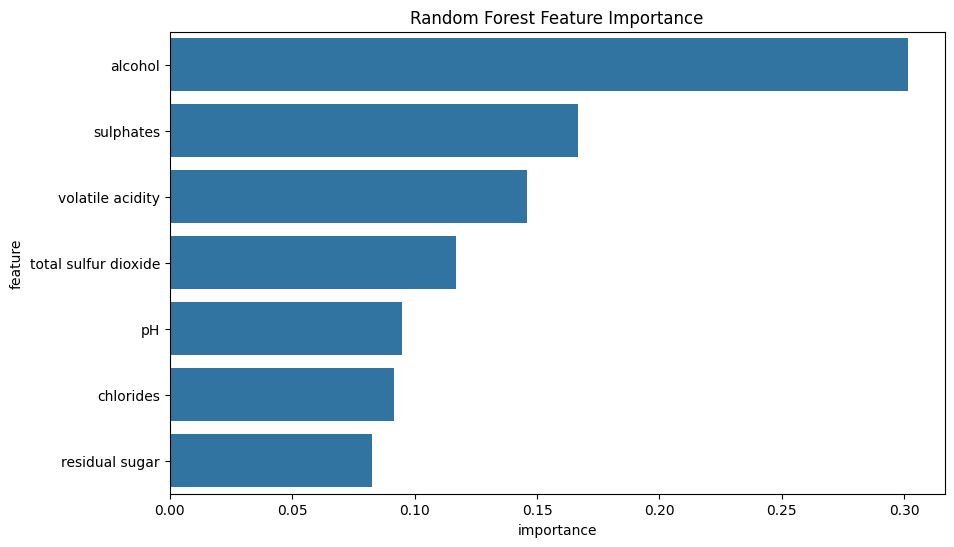

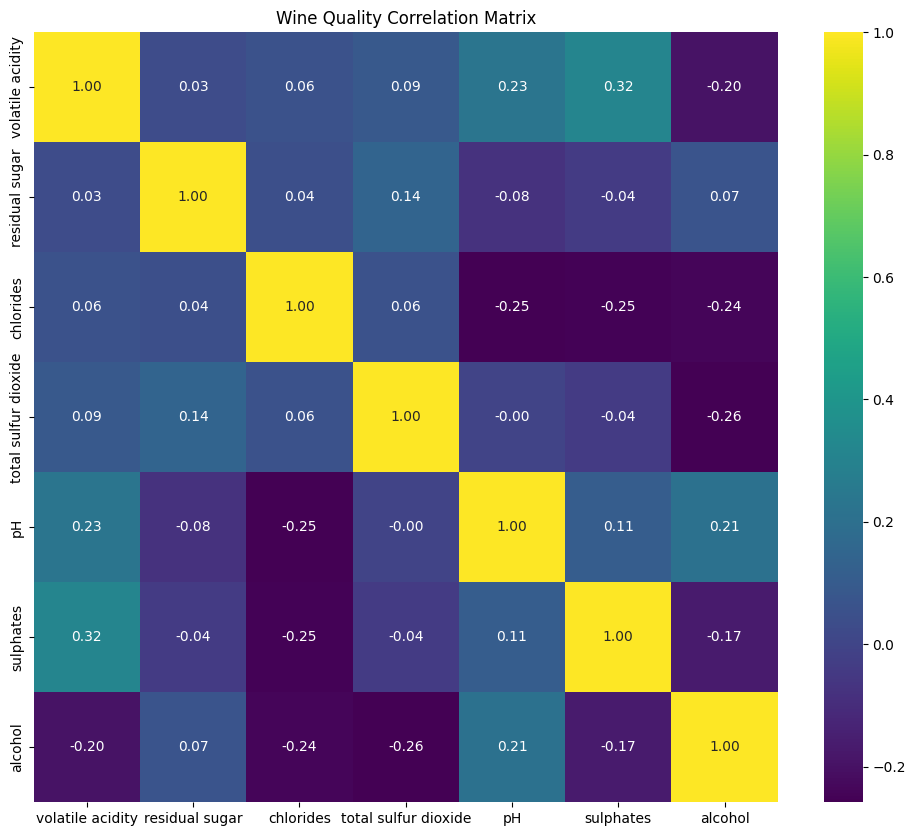

In [74]:
X = data.drop('quality', axis=1).drop('free sulfur dioxide', axis = 1).drop('citric acid', axis = 1).drop('fixed acidity', axis = 1).drop('density', axis = 1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

assess_features(X, y)

In [75]:
#standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()


# partition training set into training and validation set
X_validate = X_train[1000:]
X_train = X_train[:1000]
y_validate = y_train[1000:]
y_train = y_train[:1000]

print(f"X_train has shape {X_train.shape}")
print(f"y_train has shape {y_train.shape}")
print(f"X_validate has shape {X_validate.shape}")
print(f"y_validate has shape {y_validate.shape}")



X_train has shape (1000, 7)
y_train has shape (1000,)
X_validate has shape (276, 7)
y_validate has shape (276,)


Epoch 1/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 14.6286 - mae: 3.1810 - val_loss: 0.7590 - val_mae: 0.6736
Epoch 2/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6777 - mae: 0.6580 - val_loss: 0.6319 - val_mae: 0.6734
Epoch 3/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6626 - mae: 0.6956 - val_loss: 0.6331 - val_mae: 0.6684
Epoch 4/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5995 - mae: 0.6589 - val_loss: 0.6346 - val_mae: 0.6629
Epoch 5/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6801 - mae: 0.6870 - val_loss: 0.6113 - val_mae: 0.6573
Epoch 6/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6163 - mae: 0.6632 - val_loss: 0.5982 - val_mae: 0.6511
Epoch 7/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5938 - mae: 0.6422 - val_loss: 0.5934 - val_mae: 0.6433
Epoch 8/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6105 - mae: 0.6523 - val_loss: 0.5774 - val_mae: 0.6320
Epoch 9/35
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5867 - mae

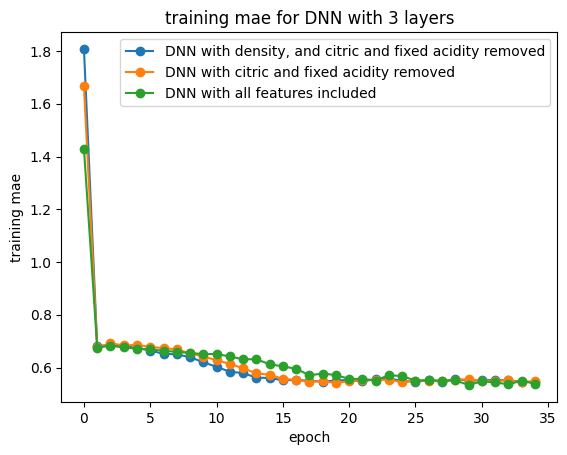

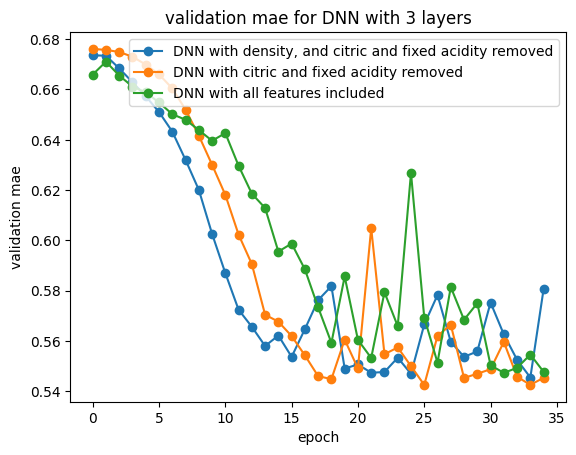

In [76]:
#we have decided on a dense model with a relu activation, removing the extra naming conventions because of this
n_features = X_train.shape[1]
model_minus_density = keras.Sequential([
    layers.Input(shape=(n_features,)),

    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='tanh'),

    layers.Dense(1)  # Output layer for regression (linear by default)
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay=3e-6)
model_minus_density.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])


#training model
history_minus_density = model_minus_density.fit(
    X_train, y_train,
    epochs=35,
    validation_data=(X_validate, y_validate),
    batch_size=32,
    verbose=1
)

# Plot training accuracy
plt.plot(history_minus_density.history['mae'], 'o-', label='DNN with density, and citric and fixed acidity removed'.format('relu'))
plt.plot(history_minus_acids.history['mae'], 'o-', label='DNN with citric and fixed acidity removed'.format('relu'))
plt.plot(history_DNN_tanh_three.history['mae'], 'o-', label='DNN with all features included'.format('relu'))
plt.title('training mae for DNN with 3 layers')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_minus_density.history['val_mae'], 'o-', label='DNN with density, and citric and fixed acidity removed'.format('relu'))
plt.plot(history_minus_acids.history['val_mae'], 'o-', label='DNN with citric and fixed acidity removed'.format('relu'))
plt.plot(history_DNN_tanh_three.history['val_mae'], 'o-', label='DNN with all features included'.format('relu'))
plt.title('validation mae for DNN with 3 layers')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

## Model with different groupings of features, using Two layers, hyperbolic tangent activation

### Case 1:	Top 5 Features by Importance [Alcohol, Sulphates, Volatile Acidity, Total Sulfur Dioxide, Chlorides]


                feature  importance
0               alcohol    0.326811
1             sulphates    0.193889
2      volatile acidity    0.184773
3  total sulfur dioxide    0.157497
4             chlorides    0.137029


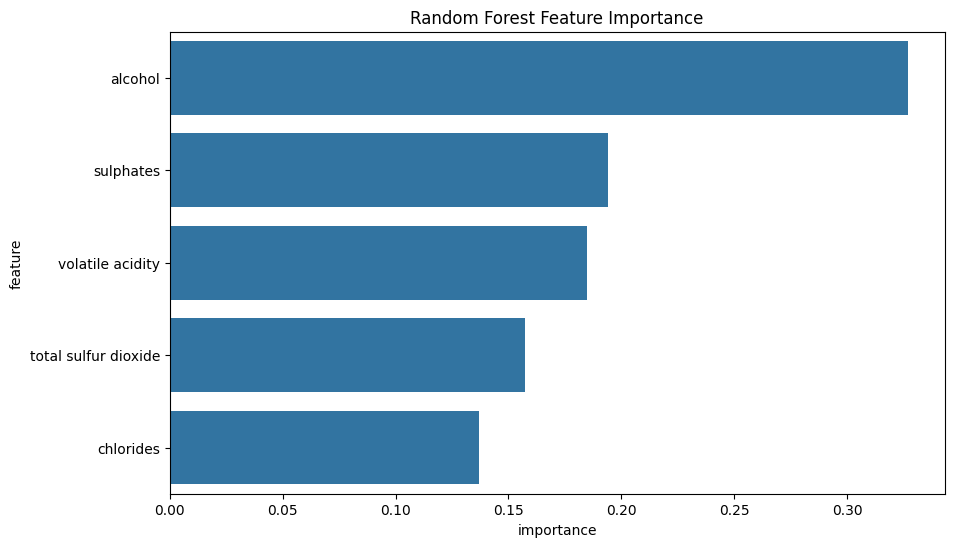

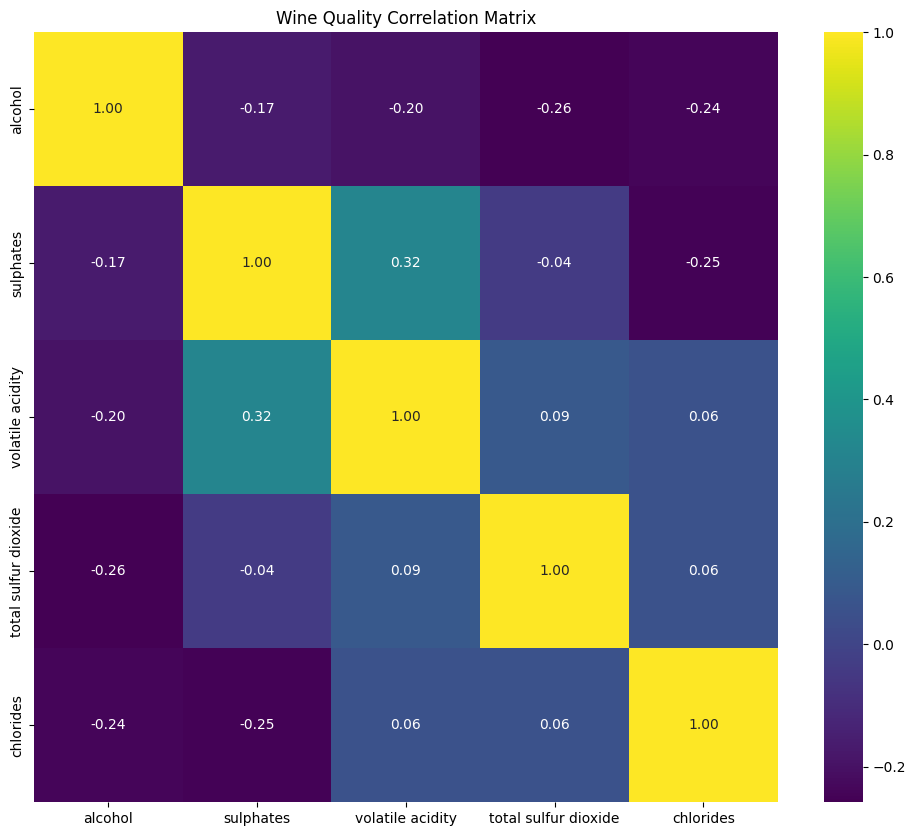

X_train_case1 has shape (1000, 5)
y_train_case1 has shape (1000,)
X_validate_case1 has shape (276, 5)
y_validate_case1 has shape (276,)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 17.7777 - mae: 3.6348 - val_loss: 1.3416 - val_mae: 0.9698
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1494 - mae: 0.8772 - val_loss: 0.8114 - val_mae: 0.7423
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8091 - mae: 0.7484 - val_loss: 0.8002 - val_mae: 0.7357
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8097 - mae: 0.7357 - val_loss: 0.7734 - val_mae: 0.7305
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8258 - mae: 0.7633 - val_loss: 0.7633 - val_mae: 0.7238
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8402 - mae: 0.7649 - val_loss: 0.7374 - val_mae: 0.7184
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7837 - mae: 0.7437 - val_loss: 0.7332 - val_mae: 0.7116
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [77]:
X_case1 = data[['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'chlorides']]
y_case1 = data['quality']
X_train_case1, X_test_case1, y_train_case1, y_test_case1 = train_test_split(X_case1, y_case1, test_size=0.2, random_state=1)

assess_features(X_case1, y_case1)

# Scale training and test data
scaler = StandardScaler()
X_train_case1_scaled = scaler.fit_transform(X_train_case1)
X_test_case1_scaled = scaler.transform(X_test_case1)

# Transform test data into DataFrame with column names
X_test_case1_scaled = pd.DataFrame(X_test_case1_scaled, columns=X_test_case1.columns)
X_test_case1_scaled.head()

# Partition training set into training and validation set
X_validate_case1 = X_train_case1[1000:]
X_train_case1 = X_train_case1[:1000]
y_validate_case1 = y_train_case1[1000:]
y_train_case1 = y_train_case1[:1000]

# Print the shapes of the new datasets
print(f"X_train_case1 has shape {X_train_case1.shape}")
print(f"y_train_case1 has shape {y_train_case1.shape}")
print(f"X_validate_case1 has shape {X_validate_case1.shape}")
print(f"y_validate_case1 has shape {y_validate_case1.shape}")

#model selection
n_features = X_train_case1.shape[1]

#initializing the model design
model_case1 = keras.Sequential([
    layers.Input(shape=(n_features,)),
    # Hidden Layer
    layers.Dense(128, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1)  # Output layer for regression (linear by default), n_classes, activation = 'softmax' for classification
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = 'adam'
model_case1.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])

#training model
history_case1 = model_case1.fit(
    X_train_case1, y_train_case1,
    epochs=50,
    validation_data=(X_validate_case1, y_validate_case1),
    batch_size=32,
    verbose=1
)

y_pred_case1 = model_case1.predict(X_validate_case1)
r2 = r2_score(y_validate_case1, y_pred_case1)
print("R² of the model with top 5 features:", r2)

### Case 2:	Top 5 Features with low correlation	[Alcohol, Volatile Acidity, Chlorides, pH, Residual Sugar]


            feature  importance
0           alcohol    0.346837
1  volatile acidity    0.230687
3                pH    0.149542
2         chlorides    0.145512
4    residual sugar    0.127422


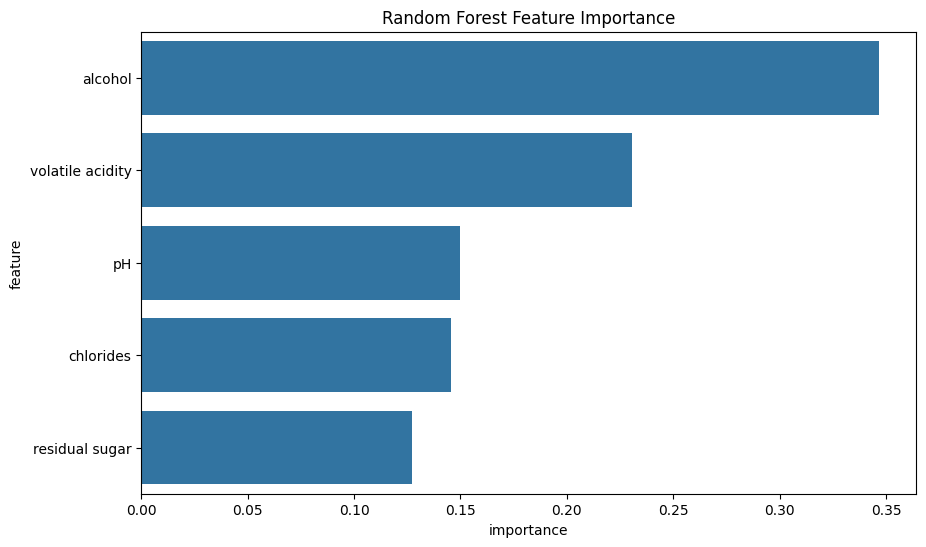

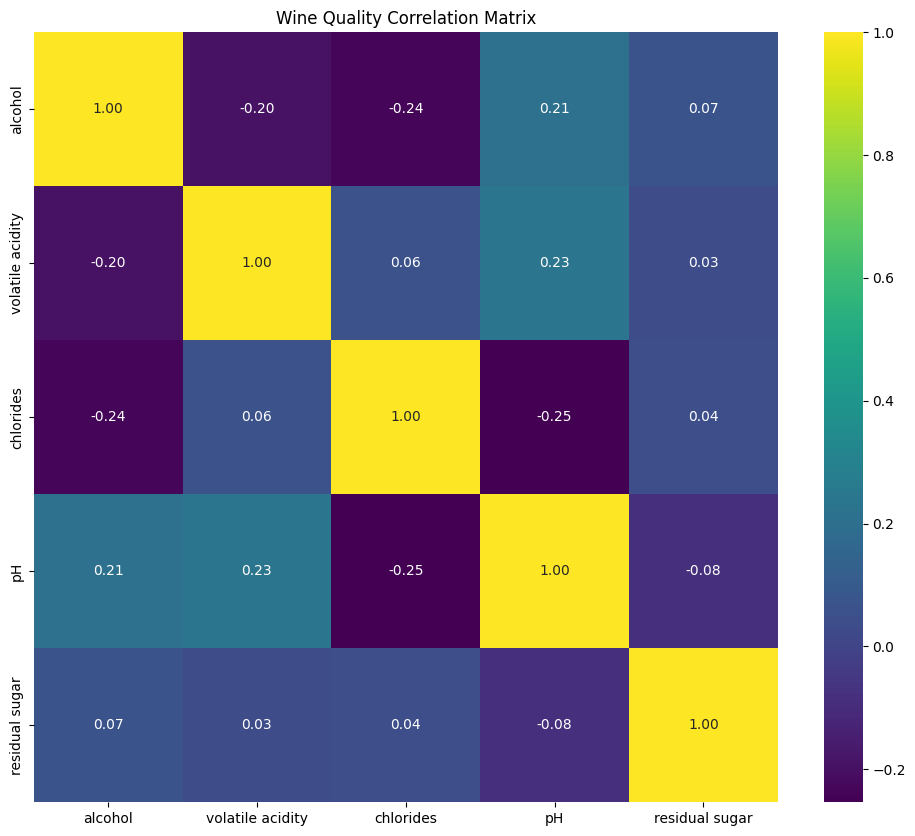

X_train_case2 has shape (1000, 5)
y_train_case2 has shape (1000,)
X_validate_case2 has shape (276, 5)
y_validate_case2 has shape (276,)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 11.9987 - mae: 3.0240 - val_loss: 0.8011 - val_mae: 0.6859
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8167 - mae: 0.7038 - val_loss: 0.6844 - val_mae: 0.6804
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7053 - mae: 0.6985 - val_loss: 0.6598 - val_mae: 0.6814
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6948 - mae: 0.6960 - val_loss: 0.6613 - val_mae: 0.6788
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6821 - mae: 0.6894 - val_loss: 0.6606 - val_mae: 0.6765
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6783 - mae: 0.6845 - val_loss: 0.6536 - val_mae: 0.6745
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6869 - mae: 0.6883 - val_loss: 0.6511 - val_mae: 0.6718
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [78]:
X_case2 = data[['alcohol', 'volatile acidity', 'chlorides', 'pH', 'residual sugar']]
y_case2 = data['quality']
X_train_case2, X_test_case2, y_train_case2, y_test_case2 = train_test_split(X_case2, y_case2, test_size=0.2, random_state=1)

assess_features(X_case2, y_case2)

# Scale training and test data
scaler = StandardScaler()
X_train_case2_scaled = scaler.fit_transform(X_train_case2)
X_test_case2_scaled = scaler.transform(X_test_case2)



# Transform test data into DataFrame with column names
X_test_case2_scaled = pd.DataFrame(X_test_case2_scaled, columns=X_test_case2.columns)
X_test_case2_scaled.head()

# Partition training set into training and validation set
X_validate_case2 = X_train_case2[1000:]
X_train_case2 = X_train_case2[:1000]
y_validate_case2 = y_train_case2[1000:]
y_train_case2 = y_train_case2[:1000]

# Print the shapes of the new datasets
print(f"X_train_case2 has shape {X_train_case2.shape}")
print(f"y_train_case2 has shape {y_train_case2.shape}")
print(f"X_validate_case2 has shape {X_validate_case2.shape}")
print(f"y_validate_case2 has shape {y_validate_case2.shape}")

#model selection
n_features = X_train_case2.shape[1]

#initializing the model design
model_case2 = keras.Sequential([
    layers.Input(shape=(n_features,)),
    # Hidden Layer
    layers.Dense(128, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1, activation='linear')  # Output layer for regression (linear by default), n_classes, activation = 'softmax' for classification
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = 'adam'
model_case2.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])

#training model
history_case2 = model_case2.fit(
    X_train_case2, y_train_case2,
    epochs=50,
    validation_data=(X_validate_case2, y_validate_case2),
    batch_size=32,
    verbose=1
)

y_pred_case2 = model_case2.predict(X_validate_case2)
r2 = r2_score(y_validate_case2, y_pred_case2)
print("R² of the model with the top 5 features with low correlation:", r2)


### Case 3:	Top 5 Features without sulfur dioxide	[Alcohol, Sulphates, Volatile Acidity, pH, Chlorides]

            feature  importance
0           alcohol    0.336806
4         sulphates    0.197041
1  volatile acidity    0.184702
2         chlorides    0.143123
3                pH    0.138328


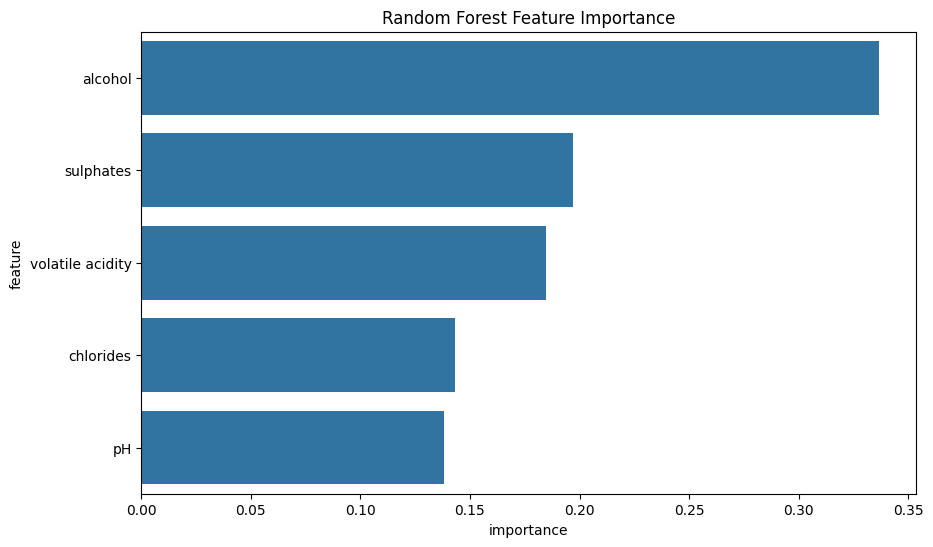

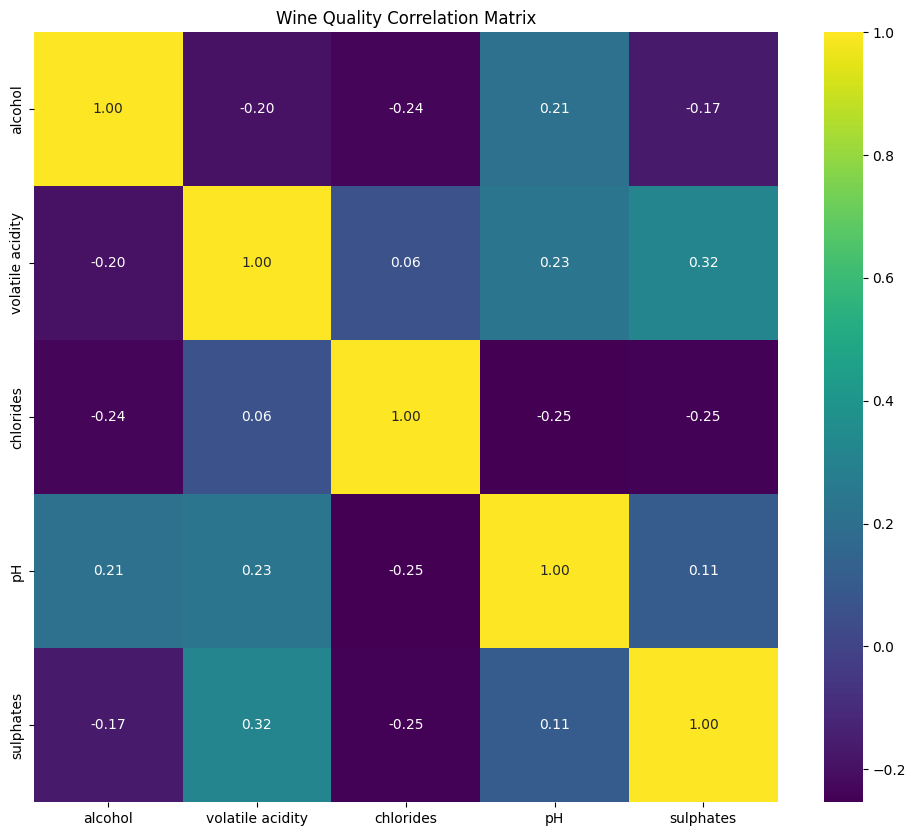

X_train_case3 has shape (1000, 5)
y_train_case3 has shape (1000,)
X_validate_case3 has shape (276, 5)
y_validate_case3 has shape (276,)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 10.6838 - mae: 2.8028 - val_loss: 1.0296 - val_mae: 0.8113
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8230 - mae: 0.7184 - val_loss: 0.6648 - val_mae: 0.6852
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6859 - mae: 0.6990 - val_loss: 0.6596 - val_mae: 0.6777
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6523 - mae: 0.6779 - val_loss: 0.6448 - val_mae: 0.6711
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6699 - mae: 0.6796 - val_loss: 0.6383 - val_mae: 0.6635
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6395 - mae: 0.6661 - val_loss: 0.6326 - val_mae: 0.6558
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6073 - mae: 0.6523 - val_loss: 0.6216 - val_mae: 0.6473
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [79]:
X_case3 = data[['alcohol', 'volatile acidity', 'chlorides', 'pH', 'sulphates']]
y_case3 = data['quality']
X_train_case3, X_test_case3, y_train_case3, y_test_case3 = train_test_split(X_case3, y_case3, test_size=0.2, random_state=1)

assess_features(X_case3, y_case3)

# Scale training and test data
scaler = StandardScaler()
X_train_case3_scaled = scaler.fit_transform(X_train_case3)
X_test_case3_scaled = scaler.transform(X_test_case3)

# Transform test data into DataFrame with column names
X_test_case3_scaled = pd.DataFrame(X_test_case3_scaled, columns=X_test_case3.columns)
X_test_case3_scaled.head()

# Partition training set into training and validation set
X_validate_case3 = X_train_case3[1000:]
X_train_case3 = X_train_case3[:1000]
y_validate_case3 = y_train_case3[1000:]
y_train_case3 = y_train_case3[:1000]

# Print the shapes of the new datasets
print(f"X_train_case3 has shape {X_train_case3.shape}")
print(f"y_train_case3 has shape {y_train_case3.shape}")
print(f"X_validate_case3 has shape {X_validate_case3.shape}")
print(f"y_validate_case3 has shape {y_validate_case3.shape}")

#model selection
n_features = X_train_case3.shape[1]

#initializing the model design
model_case3 = keras.Sequential([
    layers.Input(shape=(n_features,)),
    # Hidden Layer
    layers.Dense(128, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1)  # Output layer for regression (linear by default), n_classes, activation = 'softmax' for classification
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = 'adam'
model_case3.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])

#training model
history_case3 = model_case3.fit(
    X_train_case3, y_train_case3,
    epochs=50,
    validation_data=(X_validate_case3, y_validate_case3),
    batch_size=32,
    verbose=1
)

y_pred_case3 = model_case3.predict(X_validate_case3)
r2 = r2_score(y_validate_case3, y_pred_case3)
print("R² of the model with top 5 features not including sulfur dioxide:", r2)


### Case 4: Combined features that are relatively important and uncorrelated [Alcohol, Sulphates, Volatile Acidity, pH, Residual Sugar]

            feature  importance
0           alcohol    0.333949
2         sulphates    0.196403
1  volatile acidity    0.188050
3                pH    0.141261
4           density    0.140337


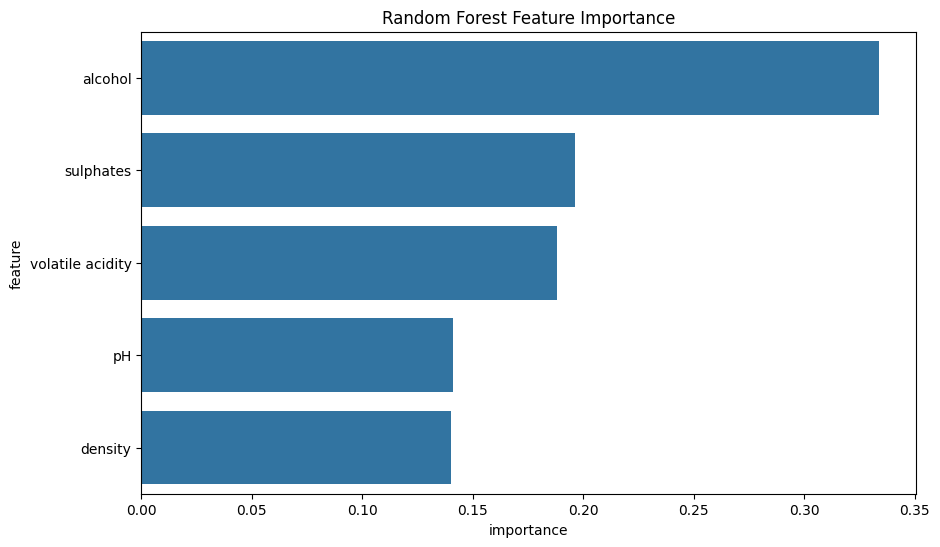

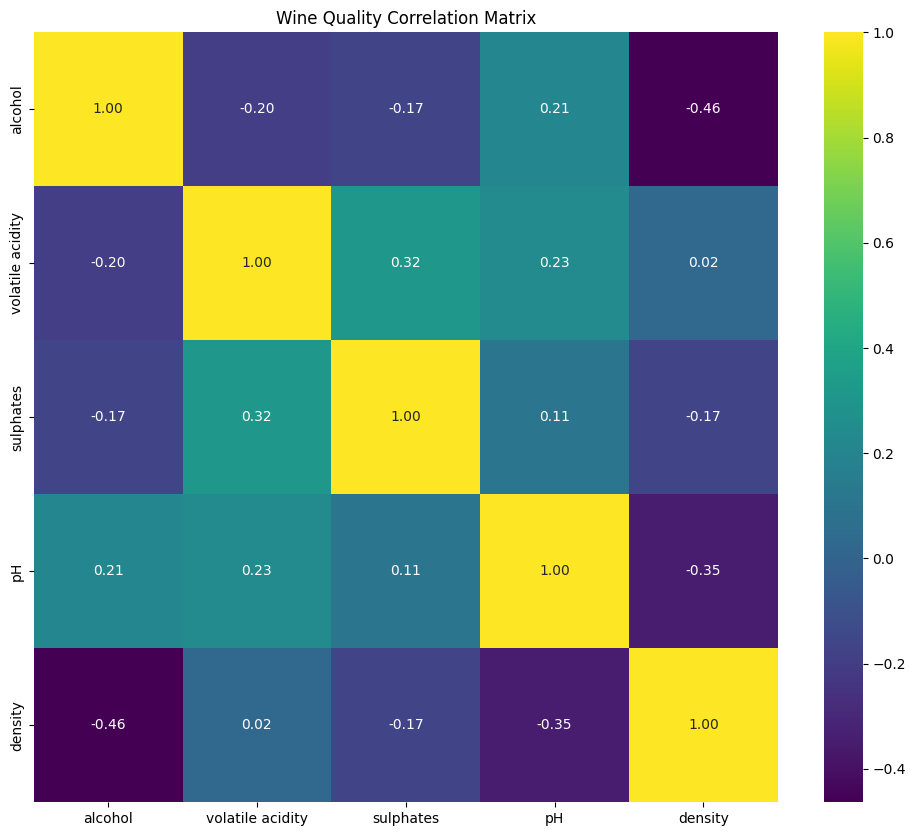

X_train_case4 has shape (1000, 5)
y_train_case4 has shape (1000,)
X_validate_case4 has shape (276, 5)
y_validate_case4 has shape (276,)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 14.7027 - mae: 3.3648 - val_loss: 0.9277 - val_mae: 0.7476
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8218 - mae: 0.7079 - val_loss: 0.6868 - val_mae: 0.6885
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6910 - mae: 0.6990 - val_loss: 0.6653 - val_mae: 0.6831
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7102 - mae: 0.7085 - val_loss: 0.6583 - val_mae: 0.6756
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6297 - mae: 0.6736 - val_loss: 0.6397 - val_mae: 0.6673
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6143 - mae: 0.6542 - val_loss: 0.6182 - val_mae: 0.6582
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6847 - mae: 0.6833 - val_loss: 0.6125 - val_mae: 0.6484
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [80]:
X_case4 = data[['alcohol', 'volatile acidity', 'sulphates', 'pH', 'density']]
y_case4 = data['quality']
X_train_case4, X_test_case4, y_train_case4, y_test_case4 = train_test_split(X_case4, y_case4, test_size=0.2, random_state=1)

assess_features(X_case4, y_case4)

# Scale training and test data
scaler = StandardScaler()
X_train_case4_scaled = scaler.fit_transform(X_train_case4)
X_test_case4_scaled = scaler.transform(X_test_case4)

# Transform test data into DataFrame with column names
X_test_case4_scaled = pd.DataFrame(X_test_case4_scaled, columns=X_test_case4.columns)
X_test_case4_scaled.head()

# Partition training set into training and validation set
X_validate_case4 = X_train_case4[1000:]
X_train_case4 = X_train_case4[:1000]
y_validate_case4 = y_train_case4[1000:]
y_train_case4 = y_train_case4[:1000]

# Print the shapes of the new datasets
print(f"X_train_case4 has shape {X_train_case4.shape}")
print(f"y_train_case4 has shape {y_train_case4.shape}")
print(f"X_validate_case4 has shape {X_validate_case4.shape}")
print(f"y_validate_case4 has shape {y_validate_case4.shape}")

# Model selection
n_features = X_train_case4.shape[1]

# Initializing the model design
model_case4 = keras.Sequential([
    layers.Input(shape=(n_features,)),
    # Hidden Layer
    layers.Dense(128, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1)  # Output layer for regression (linear by default), n_classes, activation = 'softmax' for classification
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = 'adam'
model_case4.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])

# Training model
history_case4 = model_case4.fit(
    X_train_case4, y_train_case4,
    epochs=50,
    validation_data=(X_validate_case4, y_validate_case4),
    batch_size=32,
    verbose=1
)

y_pred_case4 = model_case4.predict(X_validate_case4)
r2 = r2_score(y_validate_case4, y_pred_case4)
print("R² of the model with relatively important features:", r2)


###Base Case, all features included

                feature  importance
0               alcohol    0.298561
2             sulphates    0.162026
1      volatile acidity    0.143004
7  total sulfur dioxide    0.114118
5             chlorides    0.092710
3                    pH    0.092295
4               density    0.048974
6               density    0.048312


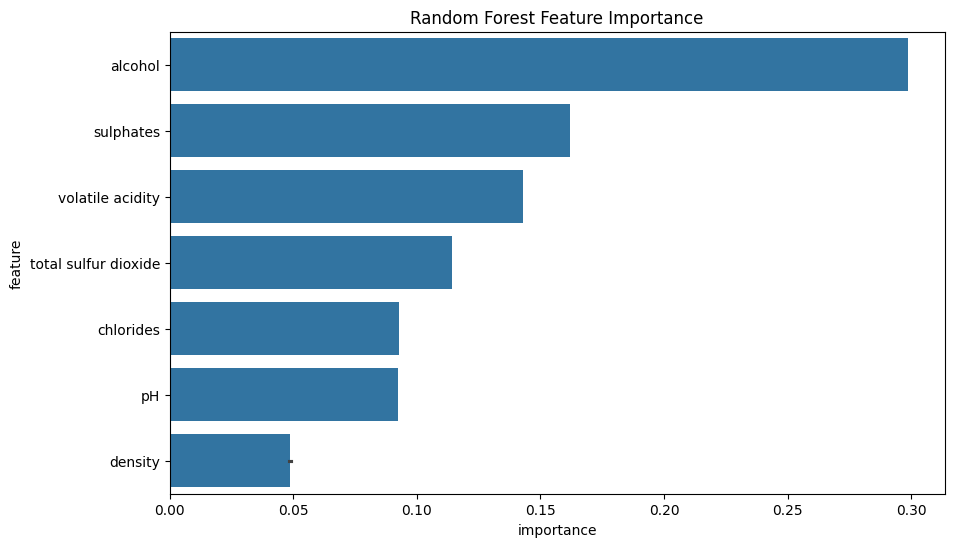

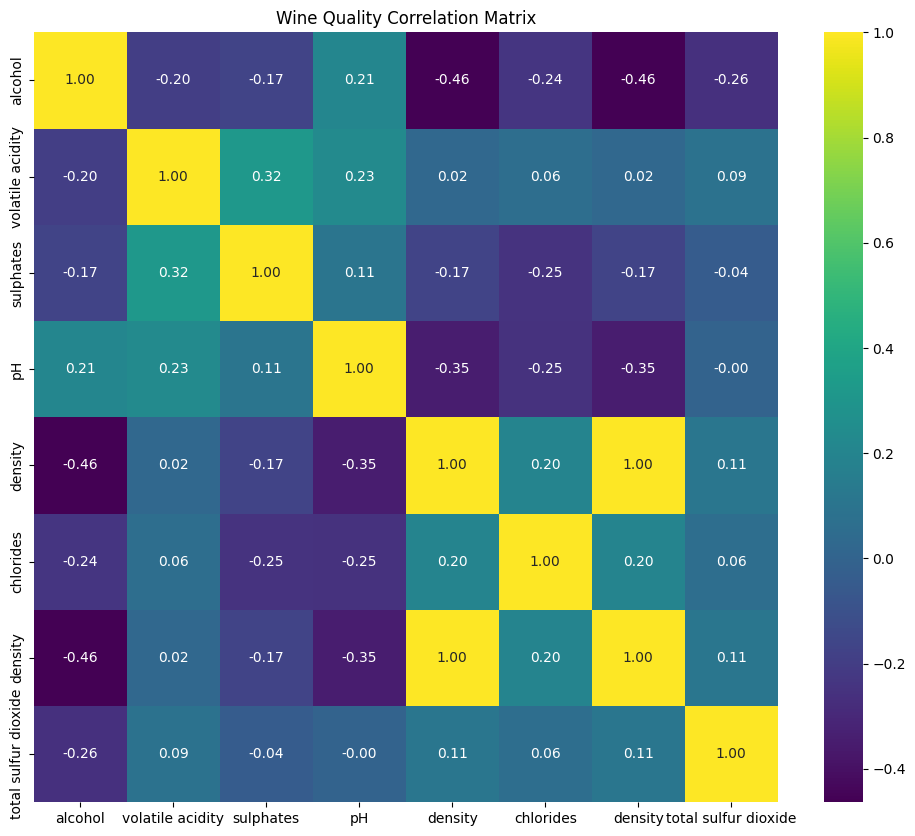

X_train_base has shape (1000, 8)
y_train_base has shape (1000,)
X_validate_base has shape (276, 8)
y_validate_base has shape (276,)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 21.2487 - mae: 4.0244 - val_loss: 0.9432 - val_mae: 0.7595
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8872 - mae: 0.7445 - val_loss: 0.7268 - val_mae: 0.6897
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6904 - mae: 0.6918 - val_loss: 0.6711 - val_mae: 0.6911
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6447 - mae: 0.6853 - val_loss: 0.6733 - val_mae: 0.6862
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6856 - mae: 0.6958 - val_loss: 0.6641 - val_mae: 0.6829
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6939 - mae: 0.6989 - val_loss: 0.6595 - val_mae: 0.6786
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7027 - mae: 0.7037 - val_loss: 0.6479 - val_mae: 0.6743
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [81]:
X_base = data[['alcohol', 'volatile acidity', 'sulphates', 'pH', 'density', 'chlorides', 'density', 'total sulfur dioxide']]
y_base = data['quality']
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=1)

assess_features(X_base, y_base)

# Scale training and test data
scaler = StandardScaler()
X_train_base_scaled = scaler.fit_transform(X_train_base)
X_test_base_scaled = scaler.transform(X_test_base)

# Transform test data into DataFrame with column names
X_test_base_scaled = pd.DataFrame(X_test_base_scaled, columns=X_test_base.columns)
X_test_base_scaled.head()

# Partition training set into training and validation set
X_validate_base = X_train_base[1000:]
X_train_base = X_train_base[:1000]
y_validate_base = y_train_base[1000:]
y_train_base = y_train_base[:1000]

# Print the shapes of the new datasets
print(f"X_train_base has shape {X_train_base.shape}")
print(f"y_train_base has shape {y_train_base.shape}")
print(f"X_validate_base has shape {X_validate_base.shape}")
print(f"y_validate_base has shape {y_validate_base.shape}")

# Model selection
n_features = X_train_base.shape[1]

# Initializing the model design
model_base = keras.Sequential([
    layers.Input(shape=(n_features,)),
    # Hidden Layer
    layers.Dense(128, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1)  # Output layer for regression (linear by default), n_classes, activation = 'softmax' for classification
])

'''
Compile the model for training. Since this is a regression
problem, we use the 'mse' loss function and 'mae' as
the desired performance metric.
'''
opt = 'adam'
model_base.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])

# Training model
history_base = model_base.fit(
    X_train_base, y_train_base,
    epochs=50,
    validation_data=(X_validate_base, y_validate_base),
    batch_size=32,
    verbose=1
)

y_pred_base = model_base.predict(X_validate_base)
r2 = r2_score(y_validate_base, y_pred_base)
print("R² of the base case model:", r2)


### Plotting results

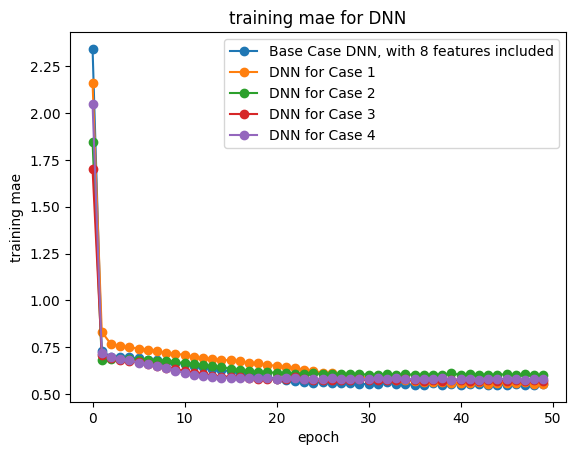

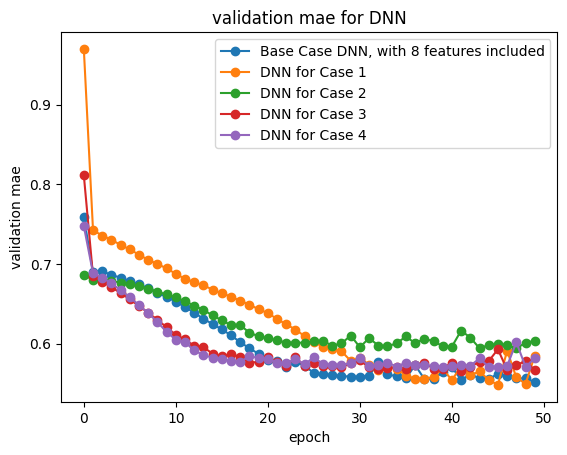

In [82]:
# Plot training accuracy
plt.plot(history_base.history['mae'], 'o-', label='Base Case DNN, with 8 features included')
plt.plot(history_case1.history['mae'], 'o-', label='DNN for Case 1')
plt.plot(history_case2.history['mae'], 'o-', label='DNN for Case 2')
plt.plot(history_case3.history['mae'], 'o-', label='DNN for Case 3')
plt.plot(history_case4.history['mae'], 'o-', label='DNN for Case 4')

plt.title('training mae for DNN')
plt.ylabel('training mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#plot validation accuracy
plt.plot(history_base.history['val_mae'], 'o-', label='Base Case DNN, with 8 features included')
plt.plot(history_case1.history['val_mae'], 'o-', label='DNN for Case 1')
plt.plot(history_case2.history['val_mae'], 'o-', label='DNN for Case 2')
plt.plot(history_case3.history['val_mae'], 'o-', label='DNN for Case 3')
plt.plot(history_case4.history['val_mae'], 'o-', label='DNN for Case 4')

plt.title('validation mae for DNN')
plt.ylabel('validation mae')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

                feature  importance
0               alcohol    0.298561
2             sulphates    0.162026
1      volatile acidity    0.143004
7  total sulfur dioxide    0.114118
5             chlorides    0.092710
3                    pH    0.092295
4               density    0.048974
6               density    0.048312


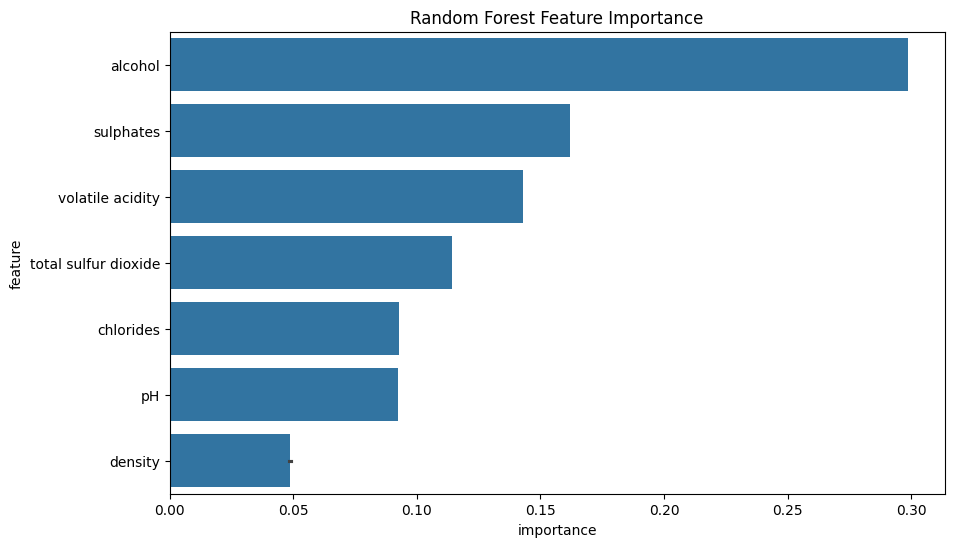

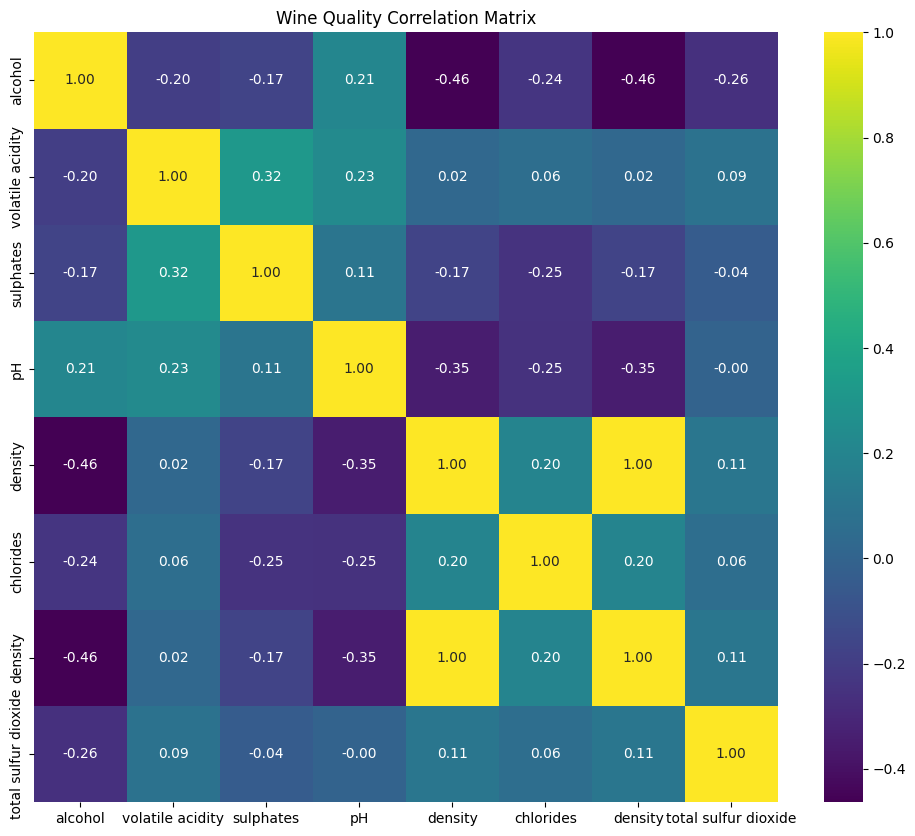

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 18.6710 - mae: 3.7809 - val_loss: 0.8649 - val_mae: 0.7220
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8404 - mae: 0.7283 - val_loss: 0.6986 - val_mae: 0.6939
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6903 - mae: 0.7014 - val_loss: 0.6682 - val_mae: 0.6893
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7034 - mae: 0.7072 - val_loss: 0.6609 - val_mae: 0.6822
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6718 - mae: 0.6850 - val_loss: 0.6497 - val_mae: 0.6748
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7020 - mae: 0.6978 - val_loss: 0.6396 - val_mae: 0.6660
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6748 - mae: 0.6946 - val_loss: 0.6155 - val_mae: 0.6561
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6064 - mae: 0.6598 - val_loss: 0.6062 - val_mae: 0.6458
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6130 - mae

In [214]:
X_base = data[['alcohol', 'volatile acidity', 'sulphates', 'pH',
               'density', 'chlorides', 'density', 'total sulfur dioxide']]
y_base = data['quality']
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=1)

assess_features(X_base, y_base)

# Scale training and test data
scaler = StandardScaler()
X_train_base_scaled = scaler.fit_transform(X_train_base)
X_test_base_scaled = scaler.transform(X_test_base)

# Transform test data into DataFrame with column names
X_test_base_scaled = pd.DataFrame(X_test_base_scaled, columns=X_test_base.columns)
X_test_base_scaled.head()

# Partition training set into training and validation set
X_validate_base_scaled = X_train_base[1000:]
X_train_base_scaled = X_train_base[:1000]
y_validate_base = y_train_base[1000:]
y_train_base = y_train_base[:1000]

# Model selection
n_features = X_train_base.shape[1]
model_base = keras.Sequential([
    layers.Input(shape=(n_features,)),
    # Hidden Layer
    layers.Dense(128, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1)  # Output layer for regression (linear by default)
])

#model complilation
model_base.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

# Training model
history_base = model_base.fit(
    X_train_base_scaled, y_train_base,
    epochs=50,
    validation_data=(X_validate_base_scaled, y_validate_base),
    batch_size=32,
    verbose=1
)

y_pred_base = model_base.predict(X_validate_base_scaled)
r2 = r2_score(y_validate_base, y_pred_base)
print("R² of the base case model:", r2)


# Model Validation, on DNN with two hidden layers using the hyperbolic tangent activation function and adam optimizer

In [224]:
y_pred_test_base = model_base.predict(X_validate_base_scaled)
r2 = r2_score(y_validate_base, y_pred_base)
print("R² of the base case model:", r2)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R² of the base case model: 0.2172449231147766


## Evaluating the model on `y_test`

In [226]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Compute R²
r2_test = r2_score(y_validate_base, y_pred_test_base)

# Compute MAE
mae_test = mean_absolute_error(y_validate_base, y_pred_test_base)

# Compute RMSE
rmse_test = np.sqrt(mean_squared_error(y_validate_base, y_pred_test_base))

# Print results
print(f"R² on test data: {r2_test}")
print(f"MAE on test data: {mae_test}")
print(f"RMSE on test data: {rmse_test}")

R² on test data: 0.2172449231147766
MAE on test data: 0.5546038150787354
RMSE on test data: 0.7049899278124147


## Plot of residuals

In [120]:
print(len(y_testing))
print(len(y_pred))

319
319


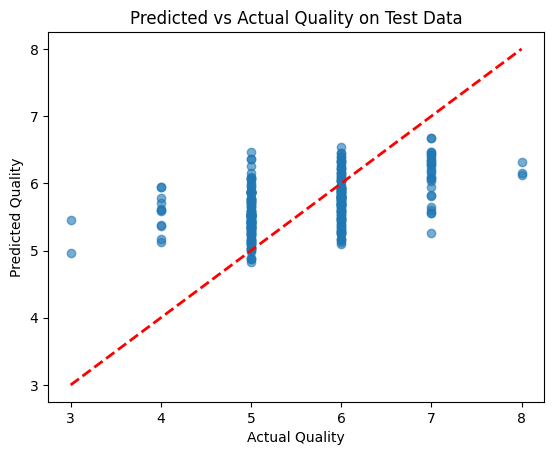

In [227]:
plt.scatter(y_validate_base, y_pred_test_base, alpha=0.6)
plt.plot([y_validate_base.min(), y_validate_base.max()], [y_validate_base.min(), y_validate_base.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Quality on Test Data")
plt.show()